# Pareto

In [500]:
from scipy.stats import pareto
pareto.rvs(0.5,
                        loc=0,
                        scale=1,
                        size=50,
                        random_state=None,
                    )*100

array([1.15482166e+03, 1.03125027e+03, 5.72672916e+02, 1.59002225e+04,
       7.89941035e+02, 1.24837141e+02, 1.45696760e+02, 4.21449295e+02,
       1.76235546e+02, 3.11144303e+03, 2.56037952e+02, 7.30715197e+03,
       1.11533487e+02, 3.19552084e+04, 1.86117553e+02, 1.44499443e+03,
       6.49106873e+02, 3.76242780e+02, 1.21943096e+02, 1.01488957e+02,
       1.96237697e+02, 2.86885571e+02, 1.18150550e+02, 1.53613575e+02,
       6.48895531e+02, 2.12820891e+02, 6.52467621e+02, 1.56593181e+04,
       1.05354884e+03, 1.41767082e+03, 2.70519519e+06, 1.07820682e+02,
       8.17172247e+02, 7.83123030e+02, 1.08213415e+03, 9.35904770e+02,
       3.66153512e+02, 2.24750426e+02, 1.02163235e+03, 2.21532295e+02,
       2.90722072e+04, 2.89319449e+02, 9.57401151e+02, 3.99420814e+03,
       2.18651077e+02, 1.11778589e+02, 1.18223316e+02, 3.72449483e+02,
       3.14613231e+02, 4.30049772e+02])

# building of the shocks with normal law for the relative changes / returns
it means the returns are stationary but not deposits process which is a pure random walk log normal

In [501]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

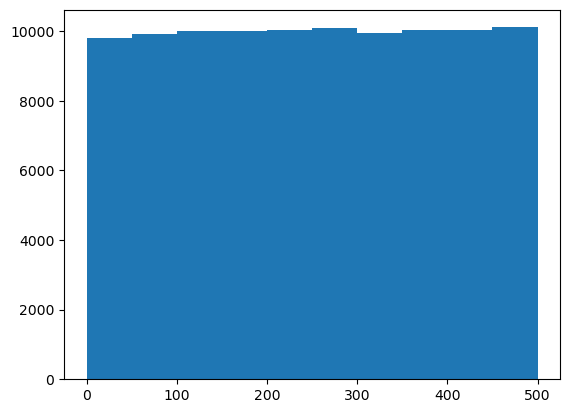

In [502]:
# define middle of the list of banks
deposits = np.random.rand(int(1e5))*500
plt.hist(deposits)
N_max = len(deposits) - len(deposits) % 2  # can not apply a shock on
# one bank if odd nb
N_half = int(len(deposits) / 2)

In [503]:
rho_1 = stats.truncnorm(
            (norm_lower - mu) / vol, (norm_upper - mu) / vol, loc=mu, scale=vol
        ).rvs(N_half)

NameError: name 'norm_lower' is not defined

In [ ]:
vol = 0.3
mu=0
norm_lower=-1
norm_upper=0

rho_1 = stats.truncnorm(
        (norm_lower - mu) / vol,
        (norm_upper - mu) / vol,
        loc=mu,
        scale=vol).rvs(N_half)
plt.figure(figsize=(15,5))
bin = plt.hist(rho_1, bins =200)
print(np.mean(rho_1),np.var(rho_1), np.max(rho_1), np.min(rho_1))

In [ ]:
# apply a positive relative shock on the second half of the banks
rho_2 = -rho_1 * deposits[0:N_half] / deposits[N_half:N_max]
plt.figure(figsize=(15,5))
bin = plt.hist(rho_2, bins =200)
print(np.mean(rho_2),np.var(rho_2), np.max(rho_2), np.min(rho_2))

In [ ]:
# concatenate the relative shocks
if len(deposits) > N_max:
    rho = np.concatenate([rho_1, rho_2, [0]])
elif len(deposits) == N_max:
    rho = np.concatenate([rho_1, rho_2])
else:
    assert False, ""

print(np.mean(rho),np.var(rho), np.max(rho), np.min(rho))
plt.figure(figsize=(15,5))
bin = plt.hist(rho, bins =200)


In [ ]:
# compute the absolute shock from the deposit amount
shocks = deposits * rho
plt.figure(figsize=(15,5))
bin = plt.hist(shocks, bins =200)

we do obtain something close to a log normal for the distribution of the deposits 

In [ ]:
# compute the new deposits
new_deposits = deposits + shocks
plt.figure(figsize=(15,5))
bin = plt.hist(new_deposits, bins =200)

# Comparison of diffusions shocks types
the processus for the deposits is non stationary in any case but lux proposes to add a mean reverting component to make it more realistic
not implemented yet

9.916938292829562 0.002624439085201063 10.017107247369722 9.82719444770942
2.294230904884009 2.6643906756058824e-05 2.3042943561081737 2.2851534862720846
2.3025850929983007 1.2497265581573788e-15 2.302585302245282 2.3025848965022875
2.302585095494249 1.3336663146872727e-10 2.3026382206178497 2.3025306595739274


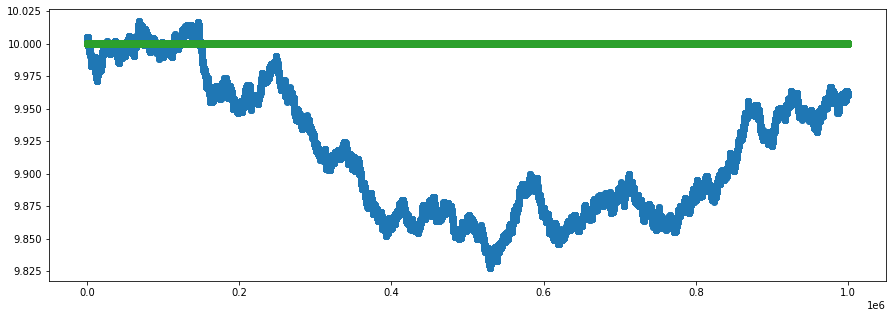

In [ ]:
walk = np.zeros(int(1e6))
walk[0] = 10
walk_p = np.zeros(int(1e6))
walk_p[0] = 10
walk_mr = np.zeros(int(1e6))
walk_mr[0] = 10

for t in range(1,int(1e6)):
    # not mean reverting
    walk[t] = walk[t-1] + walk[t-1]*np.random.normal(scale=0.00001)

    # equivalent to log normal approach
    walk_p[t] = walk_p[0]*np.exp(-0.5*(0.00001**2)*np.random.normal(scale=np.sqrt(t)))

    # mean reverting
    walk_mr[t] = walk_mr[t-1] + 0.5*(10-walk_mr[t-1]) + walk_mr[t-1]*np.random.normal(scale=0.00001)

plt.figure(figsize=(15,5))
plt.plot(walk,'o-')
plt.plot(walk_p,'o-')
plt.plot(walk_mr,'o-')

print(np.mean(walk),np.var(walk), np.max(walk), np.min(walk))
print(np.mean(np.log(walk)),np.var(np.log(walk)), np.max(np.log(walk)), np.min(np.log(walk)))
print(np.mean(np.log(walk_p)),np.var(np.log(walk_p)), np.max(np.log(walk_p)), np.min(np.log(walk_p)))
print(np.mean(np.log(walk_mr)),np.var(np.log(walk_mr)), np.max(np.log(walk_mr)), np.min(np.log(walk_mr)))


In [ ]:
bin  = plt.hist(walk, bins=50)


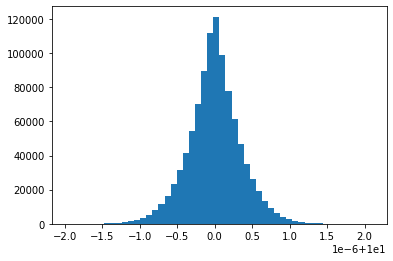

In [ ]:
bin  = plt.hist(walk_p, bins=50)


In [ ]:
walk_p

array([1.00000000e+01, 1.18901736e+01, 8.32428711e+00, ...,
       7.11174097e+05, 2.94536566e-16, 7.11797006e+75])

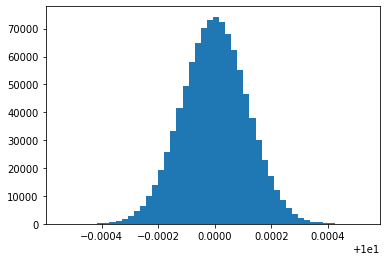

In [ ]:
bin  = plt.hist(walk_mr, bins=50)

# Analysis beta init issue

In [ ]:
import shocks as sh
from network import ClassNetwork
import numpy as np

In [ ]:
network = ClassNetwork(
    n_banks=3,
    alpha=0.01,
    beta_init=100,
    beta_reg=0.1,
    beta_star=0.1,
    gamma=0.03,
    collateral_value=1.0,
    initialization_method="constant",
    alpha_pareto=1.3,
    shocks_method="bilateral",
    shocks_law="normal",
    shocks_vol=0.01,
    result_location="./results/test/",
    min_repo_trans_size=1e-10,
    )

network.banks

c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:569: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(weighted_repo_maturity) / total_repo_amount
c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:727: RuntimeWarning: invalid value encountered in double_scalars
  self.single_trajectory["Repos av. maturity"][-1] = np.sum(


In [ ]:
gamma = 0.5
1/(1-gamma) - 0.01

1.99

# cpu count

In [ ]:
import os
os.cpu_count()

36

# non conservative shocks

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )
        shocks = new_deposits - deposits
    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)
        shocks = new_deposits - deposits

    elif law == "normal-mean-reverting":
        mean_reversion = 1
        epsilon = np.random.normal(loc=0,scale=vol,size=len(deposits))
        shocks = mean_reversion * (initial_deposits-deposits) + epsilon*total_assets
    else:
        assert False, ""
    
    shocks = shocks -np.mean(shocks)
    return shocks

In [ ]:
deposits = np.random.rand(int(50))*100
initial_deposits = np.random.rand(int(50))*100
total_assets = deposits
law = "normal-mean-reverting"
vol = 0.05
shocks = generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol)


(array([4., 5., 4., 2., 7., 6., 7., 8., 2., 5.]),
 array([-74.75353562, -60.36456496, -45.9755943 , -31.58662364,
        -17.19765299,  -2.80868233,  11.58028833,  25.96925899,
         40.35822965,  54.74720031,  69.13617097]),
 <BarContainer object of 10 artists>)

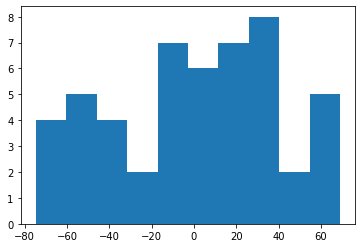

In [ ]:
plt.hist(shocks)

26.983093114378335

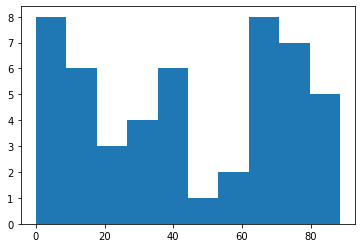

In [ ]:
new_deposits = (deposits + shocks).clip(min=0)
bin = plt.hist(new_deposits)
np.sum(new_deposits)-np.sum(deposits)

## time serie dynamics generated by non conservative shocks
target: get total deposits / assets below 1e3 after 10 000 steps

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pareto
from matplotlib import pyplot as plt

In [ ]:
def generate_non_conservative_shocks(
    deposits, initial_deposits, total_assets, law, vol
):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )

    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)

    elif law == "normal-mean-reverting":
        mean_reversion = vol
        epsilon = np.random.normal(loc=0, scale=vol, size=len(deposits))
        shocks = mean_reversion * (initial_deposits - deposits) + epsilon * total_assets

        # center the shocks
        shocks = shocks - np.mean(shocks)

        # clip the negative shocks to the deposits size
        new_deposits = (deposits + shocks).clip(min=0)

    else:
        assert False, ""

    shocks = new_deposits - deposits
    return shocks

In [ ]:
# define parameters
# deposits = np.random.rand(int(50))*100
# initial_deposits = np.random.rand(int(50))*100
deposits = pareto.rvs(
    1.3,
    loc=0,
    scale=1,
    size=50,
    random_state=None,
    )* 40.0

initial_deposits = pareto.rvs(
    1.3,
    loc=0,
    scale=1,
    size=50,
    random_state=None,
    )* 40.0
total_assets = deposits
law ="normal-mean-reverting"
vol = 0.3

In [ ]:
# run analysis

deposits_time_serie = pd.DataFrame(columns=range(50),index=range(30000))

for step in range(30000):
    shocks = generate_non_conservative_shocks(deposits, initial_deposits, deposits, law, vol)
    deposits = deposits + shocks
    deposits_time_serie.loc[step] = deposits
    


<AxesSubplot:>

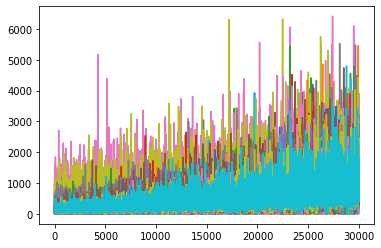

In [ ]:
deposits_time_serie.plot(legend=False)

# gethostname

In [ ]:
from socket import gethostname
gethostname()

'srv006542.fr.cfm.fr'

# data frame test

In [ ]:
import pandas as pd
ind = pd.MultiIndex.from_tuples([], names=(u'one', u'two', u'three'))
df = pd.DataFrame(columns=['alpha', 'beta'], index=ind)
df.loc["bank a","transaction 1",0.12587] = [0.2,True]
df.loc["bank a","transaction 1",0.55782] = [0.4,True]
df.loc["bank a","transaction 1",0.6354] = [0.5,False]
df.loc["bank a","transaction 1",354] = [0.6,False]
df.loc["bank e","transaction 4",3543] = [0.7,False]
df

alpha   beta
one    two           three                   
bank a transaction 1 0.12587       0.2   True
                     0.55782       0.4   True
                     0.63540       0.5  False
                     354.00000     0.6  False
bank e transaction 4 3543.00000    0.7  False

In [ ]:
df.loc[:,"transaction 1",:]

alpha   beta
one    three                  
bank a 0.12587      0.2   True
       0.55782      0.4   True
       0.63540      0.5  False
       354.00000    0.6  False

In [ ]:
df = pd.DataFrame(data = {"a":[True]*5,"b":range(5)})
~df["a"]

0    False
1    False
2    False
3    False
4    False
Name: a, dtype: bool

In [ ]:
string_test = "dingo hello"
string_test.split(" ")[0]

'dingo'

In [ ]:
list_1 =[1,2] 
list_2 =["q","b"]
for t, (j,k) in enumerate(zip(list_1,list_2)):
    print(t,j,k)

0 1 q
1 2 b


In [ ]:
import graphics as gx

def convert_data(df, str_convertion):

    if str_convertion == "e-K$":
        df = np.exp(df) / 1e3
    elif str_convertion == "e":
        df = np.exp(df)
    elif str_convertion == "K$":
        df = df / 1e3
    elif str_convertion == "%":
        df = df * 100

    return df


def convert_n_format_index(df, str_format, str_convertion):

    index = df.index

    if str_convertion == "e-K$":
        index = np.exp(index) / 1e3
    elif str_convertion == "e":
        index = np.exp(index)
    elif str_convertion == "K$":
        index = index / 1e3
    elif str_convertion == "%":
        index = index * 100

    index = index.map(("{:" + str_format + "}").format)

    df.index = pd.Index(index)

    return df

convert_n_format_index(df.loc["bank a", "transaction 1"],".1f","%")

alpha   beta
three                
12.6       0.2   True
55.8       0.4   True
63.5       0.5  False
35400.0    0.6  False

In [ ]:
df

alpha   beta
one    two           three                   
bank a transaction 1 0.12587       0.2   True
                     0.55782       0.4   True
                     0.63540       0.5  False
                     354.00000     0.6  False
bank e transaction 4 3543.00000    0.7  False

In [ ]:
convert_data(df.loc["bank a", "transaction 1"],"%")

alpha  beta
three                 
0.12587     20.0   100
0.55782     40.0   100
0.63540     50.0     0
354.00000   60.0     0

In [ ]:
df.loc[["bank a", "bank b"],"beta"]

one     two            three  
bank a  transaction 1  time 56    True
bank b  transaction 2  time 57    True
Name: beta, dtype: bool

# dictionaries of arrays or dataframes

In [ ]:
import parameters as par
import numpy as np
dic_matrices = dict.fromkeys(par.matrices)
for key in dic_matrices.keys():
    dic_matrices[key] = np.zeros((3, 3)).copy()

# bug analysis

In [ ]:
import pickle

bank_id_on_balance_repos = pickle.load(open("./support/bank_id_on_balance_repos.pickle","rb"))

# df_reverse analysis

In [ ]:
import pandas as pd

df_rev_repo_trans = pd.read_csv("./results/single_run_saved/df_reverse_repos.csv",index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: './results/single_run_saved/df_reverse_repos.csv'

In [ ]:
df_rev_repo_trans

bank_id  trans_id        amount  start_step  tenor  status
owner_bank_id                                                            
0                  414         0  2.251317e-01          71    2.0   False
0                  193         0  2.177591e+00          72   24.0   False
0                  414         1  0.000000e+00          71    2.0   False
0                  278         0  2.047012e+00          73    3.0   False
0                  474         0  1.914228e+00          73    5.0   False
...                ...       ...           ...         ...    ...     ...
499                431       164  3.558560e-01        2491    3.0   False
499                431       165  1.110223e-16        2494    NaN    True
499                431       166  1.131620e+00        2491    4.0   False
499                431       167  9.388488e-01        2496    NaN    True
499                431       168  1.444025e+00        2493    6.0   False

[1152011 rows x 6 columns]

# float precision 


In [ ]:
import numpy as np

info = np.finfo(np.float16)
print("Plus grand nombre positif : ", info.max)
print("Plus petit nombre positif : ", info.tiny)
print("Plus petit nombre négatif : ", -info.max)


Plus grand nombre positif :  65500.0
Plus petit nombre positif :  6.104e-05
Plus petit nombre négatif :  -65500.0


# itertools

In [ ]:
import itertools

def my_function(param1, param2, param3, path):
    with open(f"{path}test_param.txt", "w") as f:
            f.write(
                f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n"
            )
    return param1 + param2 +param3
    # Your function implementation here

# Define the standard middle values for each parameter
standard_values = {
    'param1': 0,
    'param2': 0,
    'param3': 0,
    'path' : "./support/",
}

# Define the possible values for each parameter
param1_values = [0.1, 0.5, 1.0]
param2_values = [0.5, 1.0, 1.5]
param3_values = [1.0, 2.0, 3.0]

# Iterate over the combinations of parameter values
for p1, p2, p3 in itertools.product(param1_values, param2_values, param3_values):
    # Set the parameter values for this iteration
    dic_args = {
        'param1': p1,
        'param2': p2,
        'param3': p3
    }

    # Keep all other parameters fixed at their standard middle value
    for param_name in dic_args:
        if dic_args[param_name] == standard_values[param_name]:
            continue  # Skip the standard value
        params_copy = dic_args.copy()
        params_copy[param_name] = standard_values[param_name]

        # Call the function with the current parameter values
        result = my_function(**params_copy)

        # Do something with the result
        print(f"{param_name} = {dic_args[param_name]}: {result}")


# inspect get args build args

In [ ]:
import inspect
def my_function(param1, param2, param3, path):
    with open(f"{path}param.txt", "w") as f:
                f.write(f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n")

inspect.getfullargspec(my_function).args

['param1', 'param2', 'param3', 'path']

# study the arguments of a function

In [ ]:
def my_function(param1, param2, param3, path):
    os.makedirs(path,exist_ok=True)
    with open(f"{path}param.txt", "w") as f:
                f.write(f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n")

def study_function_parameter_range(function, dic_default_value, dic_ranges):
    
    for arg, range in dic_ranges.items():        
        for value in range:
            
            # create a dic_args from the default values
            dic_args = dic_default_value.copy()
            
            # set the given arg to value and the path to arg/value/
            dic_args[arg] = value
            dic_args["path"] = f"{dic_args['path']}{arg}/{value}/"
            
            # call the function with the current parameter value
            function(**dic_args)

dic_default_value = {"param1":1,"param2":2,"param3":3, "path":"./support/"}
dic_range = {"param1":[1,2,3],"param2":[4,5,6],"param3":[7,8,9]}

study_function_parameter_range(my_function, dic_default_value, dic_range)


# solution build args

In [ ]:
def my_function(param1, param2, param3, path):
    os.makedirs(path,exist_ok=True)
    with open(f"{path}param.txt", "w") as f:
                f.write(f"param1={param1} \n"
                f"param2={param2} \n"
                f"param3={param3} \n")

def build_args(dic_default_value, dic_ranges):
    
    list_dic_args = []
    for arg, range in dic_ranges.items():        
        for value in range:
            
            # create a dic_args from the default values
            dic_args = dic_default_value.copy()
            
            # set the given arg to value and the path to arg/value/
            dic_args[arg] = value
            dic_args["path"] = f"{dic_args['path']}{arg}/{value}/"
            
            # call the function with the current parameter value
            list_dic_args.append(dic_args)
    
    return list_dic_args

dic_default_value = {"param1":1,"param2":2,"param3":3, "path":"./support/"}
dic_range = {"param1":[1,2,3],"param2":[4,5,6],"param3":[7,8,9]}

build_args(my_function, dic_default_value, dic_range)

[{'param1': 1, 'param2': 2, 'param3': 3, 'path': './support/param1/1/'},
 {'param1': 2, 'param2': 2, 'param3': 3, 'path': './support/param1/2/'},
 {'param1': 3, 'param2': 2, 'param3': 3, 'path': './support/param1/3/'},
 {'param1': 1, 'param2': 4, 'param3': 3, 'path': './support/param2/4/'},
 {'param1': 1, 'param2': 5, 'param3': 3, 'path': './support/param2/5/'},
 {'param1': 1, 'param2': 6, 'param3': 3, 'path': './support/param2/6/'},
 {'param1': 1, 'param2': 2, 'param3': 7, 'path': './support/param3/7/'},
 {'param1': 1, 'param2': 2, 'param3': 8, 'path': './support/param3/8/'},
 {'param1': 1, 'param2': 2, 'param3': 9, 'path': './support/param3/9/'}]

# df_plt

In [ ]:
import parameters as par

par.df_plt.tail(50)

label    legend   scale style convertion
item                                                                  
bank_100  deposits (monetary units)  bank_100  linear            False
bank_101  deposits (monetary units)  bank_101  linear            False
bank_102  deposits (monetary units)  bank_102  linear            False
bank_103  deposits (monetary units)  bank_103  linear            False
bank_104  deposits (monetary units)  bank_104  linear            False
bank_105  deposits (monetary units)  bank_105  linear            False
bank_106  deposits (monetary units)  bank_106  linear            False
bank_107  deposits (monetary units)  bank_107  linear            False
bank_108  deposits (monetary units)  bank_108  linear            False
bank_109  deposits (monetary units)  bank_109  linear            False
bank_110  deposits (monetary units)  bank_110  linear            False
bank_111  deposits (monetary units)  bank_111  linear            False
bank_112  deposits (monetary units)  bank_112  linear            False
bank_113  deposits (monetary units)  bank_113  linear            False
bank_114  deposits (monetary units)  bank_114  linear            False
bank_115  deposits (monetary units)  bank_115  linear            False
bank_116  deposits (monetary units)  bank_116  linear            False
bank_117  deposits (monetary units)  bank_117  linear            False
bank_118  deposits (monetary units)  bank_118  linear            False
bank_119  deposits (monetary units)  bank_119  linear            False
bank_120  deposits (monetary units)  bank_120  linear            False
bank_121  deposits (monetary units)  bank_121  linear            False
bank_122  deposits (monetary units)  bank_122  linear            False
bank_123  deposits (monetary units)  bank_123  linear            False
bank_124  deposits (monetary units)  bank_124  linear            False
bank_125  deposits (monetary units)  bank_125  linear            False
bank_126  deposits (monetary units)  bank_126  linear            False
bank_127  deposits (monetary units)  bank_127  linear            False
bank_128  deposits (monetary units)  bank_128  linear            False
bank_129  deposits (monetary units)  bank_129  linear            False
bank_130  deposits (monetary units)  bank_130  linear            False
bank_131  deposits (monetary units)  bank_131  linear            False
bank_132  deposits (monetary units)  bank_132  linear            False
bank_133  deposits (monetary units)  bank_133  linear            False
bank_134  deposits (monetary units)  bank_134  linear            False
bank_135  deposits (monetary units)  bank_135  linear            False
bank_136  deposits (monetary units)  bank_136  linear            False
bank_137  deposits (monetary units)  bank_137  linear            False
bank_138  deposits (monetary units)  bank_138  linear            False
bank_139  deposits (monetary units)  bank_139  linear            False
bank_140  deposits (monetary units)  bank_140  linear            False
bank_141  deposits (monetary units)  bank_141  linear            False
bank_142  deposits (monetary units)  bank_142  linear            False
bank_143  deposits (monetary units)  bank_143  linear            False
bank_144  deposits (monetary units)  bank_144  linear            False
bank_145  deposits (monetary units)  bank_145  linear            False
bank_146  deposits (monetary units)  bank_146  linear            False
bank_147  deposits (monetary units)  bank_147  linear            False
bank_148  deposits (monetary units)  bank_148  linear            False
bank_149  deposits (monetary units)  bank_149  linear            False

In [ ]:
df = par.df_plt[par.df_plt["label"].isin(["deposits (monetary units)","SELL"])]

In [ ]:
par.df_plt

label  \
item                                                        
cash av. network                notional (monetary units)   
cash tot. network               notional (monetary units)   
cash                            notional (monetary units)   
securities usable av. network   notional (monetary units)   
securities usable tot. network  notional (monetary units)   
...                                                   ...   
bank_145                        deposits (monetary units)   
bank_146                        deposits (monetary units)   
bank_147                        deposits (monetary units)   
bank_148                        deposits (monetary units)   
bank_149                        deposits (monetary units)   

                                                        legend   scale style  \
item                                                                           
cash av. network                              cash av. network  linear         
cash tot. network                            cash tot. network  linear         
cash                                                      cash  linear         
securities usable av. network    securities usable av. network  linear         
securities usable tot. network  securities usable tot. network  linear         
...                                                        ...     ...   ...   
bank_145                                              bank_145  linear         
bank_146                                              bank_146  linear         
bank_147                                              bank_147  linear         
bank_148                                              bank_148  linear         
bank_149                                              bank_149  linear         

                               convertion  
item                                       
cash av. network                    False  
cash tot. network                   False  
cash                                False  
securities usable av. network       False  
securities usable tot. network      False  
...                                   ...  
bank_145                            False  
bank_146                            False  
bank_147                            False  
bank_148                            False  
bank_149                            False  

[314 rows x 5 columns]

In [ ]:
df

label    legend   scale style convertion
item                                                                  
bank_0    deposits (monetary units)    bank_0  linear            False
bank_1    deposits (monetary units)    bank_1  linear            False
bank_2    deposits (monetary units)    bank_2  linear            False
bank_3    deposits (monetary units)    bank_3  linear            False
bank_4    deposits (monetary units)    bank_4  linear            False
...                             ...       ...     ...   ...        ...
bank_145  deposits (monetary units)  bank_145  linear            False
bank_146  deposits (monetary units)  bank_146  linear            False
bank_147  deposits (monetary units)  bank_147  linear            False
bank_148  deposits (monetary units)  bank_148  linear            False
bank_149  deposits (monetary units)  bank_149  linear            False

[150 rows x 5 columns]

# final step distributions

In [ ]:
import powerlaw
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pandas as pd
import parameters as par

df_banks = pd.read_csv("./results/single_run/df_banks.csv", index_col=0)

bank_item = "total assets"
sr_data = df_banks[bank_item]
figsize=par.small_figsize

# function 

def power_law_test(data,file_name, figsize=par.small_figsize):

    # fit the data with the powerlaw librairy
    fit = powerlaw.Fit(data)

    # define the figure and colors 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    colors = sns.color_palette("flare", n_colors=3)

    # ax1 : pdf
    fit.plot_pdf(color = colors[0], ax=ax1)
    fit.power_law.plot_pdf(color = colors[1], linestyle = "--", ax = ax1)
    fit.exponential.plot_pdf(color = colors[2], linestyle = "--", ax=ax1)
    ax1.set_xlabel(par.df_plt.loc[bank_item, "legend"])
    ax1.set_ylabel("pdf")
    ax1.grid()

    # ax2 : ccdf
    fit.plot_ccdf(color = colors[0], ax=ax2)
    fit.power_law.plot_ccdf(color = colors[1], linestyle = "--", ax = ax2)
    fit.exponential.plot_ccdf(color = colors[2], linestyle = "--", ax=ax2)
    ax2.set_xlabel(par.df_plt.loc[bank_item, "legend"])
    ax2.set_ylabel("ccdf")
    ax2.grid()

    # legend
    alpha_power_law  = fit.power_law.alpha
    alpha_power_law_fm  = "{:.1f}".format(alpha_power_law)
    R, p_value = fit.distribution_compare('power_law', 'exponential')
    p_value_fm  = "{:.1f}".format(p_value)
    ax2.legend(["data",r"power law fit, $\alpha =$" + f"{alpha_power_law_fm}, p-value = {p_value_fm}","exponential"], loc="upper left",bbox_to_anchor=(1.0, 1.0))

    # adjust the space between the 2 charts
    plt.subplots_adjust(wspace=0.4)

    plt.savefig(f"{file_name}.pdf", bbox_inches="tight")
    plt.close()

    return alpha_power_law, p_value


def plot_step_all_power_law(df_banks, path, figsize=par.small_figsize):

    df_power_law = pd.DataFrame(index=df_banks.columns, columns=["alpha_power_law","p_value"])

    for col in df_banks.columns:

        # define data
        data = df_banks[col]

        # check that some data exists
        if max(data)>0: 

            # build path
            os.makedirs(f"{path}col",exist_ok=True)

            # run and plot the power law test
            df_power_law.loc[col] = power_law_test(data,f"{path}{col}", figsize=figsize)

    
    # dump to csv
    df_power_law.to_csv(f"{path}df_power_law.csv")
    
    # plot
    fig, ax1 = plt.subplots(figsize=figsize)
    colors = sns.color_palette("flare", n_colors=2)
    
    # ax1: alpha
    ax1.plot(df_power_law.index,df_power_law["alpha_power_law"], ".", color=colors[0])
    ax1.tick_params(axis="x", labelrotation=90, labelsize="small")
    ax1.set_xlabel("accounting item")
    ax1.set_ylabel(r"$\alpha$")
    ax1.legend(r"$\alpha$", loc='upper left')
    
    # ax2: p value
    ax2 =ax1.twinx()
    ax1.plot(df_power_law.index,df_power_law["p_value"],".", color=colors[1])
    ax2.set_ylabel("p-value")
    ax2.legend("p-value",loc='upper right')

    plt.grid()
    plt.savefig(f"{path}power_law_tests.pdf", bbox_inches="tight")
    plt.close()

plot_step_all_power_law(df_banks,"./support/test/")


Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:1141: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:1160: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide

In [ ]:
import functions as fct
fct.list_exclusion(list(df_banks.columns),par.bank_items)

['total liabilities']

In [ ]:
df_banks["total assets"].name

'total assets'

In [ ]:
import pandas as pd
sr_data = pd.read_csv("./support/sr_data.csv", index_col=0)

In [ ]:
sr_data.abs().sum()

securities reused    8.881784e-16
dtype: float64

In [ ]:
len(sr_data.dropna())

1

In [ ]:
x = np.nan
if not(np.isnan(x)):
    print("dingo")

In [ ]:
import pandas as pd

# Création d'un DataFrame avec une colonne existante
df = pd.DataFrame({'id': [1, 2, 3],
                   'informations': [{'nom': 'Alice', 'age': 25},
                                   {'nom': 'Bob', 'age': 30},
                                   {'nom': 'Charlie', 'age': 35}]})

# Affichage du DataFrame
print(df)


   id                   informations
0   1    {'nom': 'Alice', 'age': 25}
1   2      {'nom': 'Bob', 'age': 30}
2   3  {'nom': 'Charlie', 'age': 35}


In [ ]:
df.iloc[1,1]

{'nom': 'Bob', 'age': 30}

# df_cpnet

In [ ]:
df_cpnet = pd.DataFrame(
        {
            "sig_c": pd.Series([], dtype=object),
            "sig_x": pd.Series([], dtype=object),
            "significant": pd.Series([], dtype=object),
            "p_value": pd.Series([], dtype=float),
        },
        index=pd.MultiIndex.from_tuples(
            [(a,b,c) for a in range(5) for b in ["dingo", "pipi"] for c in ["a", "b"]],
            names=["agg_period", "algo", "step"],
        ),
    )

In [ ]:
df_cpnet_2 = pd.DataFrame(
        columns=[f"{col}-{agg_period}-{algo}" for col in ["sig_c","sig_x","significant","p_value"] for agg_period in par.agg_periods for algo in par.cp_algos],
    )

In [ ]:
df_cpnet_2

Empty DataFrame
Columns: [sig_c-1-Rombach, sig_c-1-Rossa, sig_c-1-LapSgnCore, sig_c-1-MINRES, sig_c-1-Lip, sig_c-1-BE, sig_c-50-Rombach, sig_c-50-Rossa, sig_c-50-LapSgnCore, sig_c-50-MINRES, sig_c-50-Lip, sig_c-50-BE, sig_c-100-Rombach, sig_c-100-Rossa, sig_c-100-LapSgnCore, sig_c-100-MINRES, sig_c-100-Lip, sig_c-100-BE, sig_c-250-Rombach, sig_c-250-Rossa, sig_c-250-LapSgnCore, sig_c-250-MINRES, sig_c-250-Lip, sig_c-250-BE, sig_x-1-Rombach, sig_x-1-Rossa, sig_x-1-LapSgnCore, sig_x-1-MINRES, sig_x-1-Lip, sig_x-1-BE, sig_x-50-Rombach, sig_x-50-Rossa, sig_x-50-LapSgnCore, sig_x-50-MINRES, sig_x-50-Lip, sig_x-50-BE, sig_x-100-Rombach, sig_x-100-Rossa, sig_x-100-LapSgnCore, sig_x-100-MINRES, sig_x-100-Lip, sig_x-100-BE, sig_x-250-Rombach, sig_x-250-Rossa, sig_x-250-LapSgnCore, sig_x-250-MINRES, sig_x-250-Lip, sig_x-250-BE, significant-1-Rombach, significant-1-Rossa, significant-1-LapSgnCore, significant-1-MINRES, significant-1-Lip, significant-1-BE, significant-50-Rombach, significant-50-Rossa, significant-50-LapSgnCore, significant-50-MINRES, significant-50-Lip, significant-50-BE, significant-100-Rombach, significant-100-Rossa, significant-100-LapSgnCore, significant-100-MINRES, significant-100-Lip, significant-100-BE, significant-250-Rombach, significant-250-Rossa, significant-250-LapSgnCore, significant-250-MINRES, significant-250-Lip, significant-250-BE, p_value-1-Rombach, p_value-1-Rossa, p_value-1-LapSgnCore, p_value-1-MINRES, p_value-1-Lip, p_value-1-BE, p_value-50-Rombach, p_value-50-Rossa, p_value-50-LapSgnCore, p_value-50-MINRES, p_value-50-Lip, p_value-50-BE, p_value-100-Rombach, p_value-100-Rossa, p_value-100-LapSgnCore, p_value-100-MINRES, p_value-100-Lip, p_value-100-BE, p_value-250-Rombach, p_value-250-Rossa, p_value-250-LapSgnCore, p_value-250-MINRES, p_value-250-Lip, p_value-250-BE]
Index: []

[0 rows x 96 columns]

In [ ]:
df_cpnet[df_cpnet_2.columns] =None
df_cpnet

sig_c sig_x significant  p_value sig_c-1-Rombach  \
agg_period algo  step                                                    
0          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
1          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
2          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
3          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
4          dingo a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   
           pipi  a      NaN   NaN         NaN      NaN            None   
                 b      NaN   NaN         NaN      NaN            None   

                      sig_c-1-Rossa sig_c-1-LapSgnCore sig_c-1-MINRES  \
agg_period algo  step                                                   
0          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
1          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
2          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
3          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   
4          dingo a             None               None           None   
                 b             None               None           None   
           pipi  a             None               None           None   
                 b             None               None           None   

                      sig_c-1-Lip sig_c-1-BE  ... p_value-100-LapSgnCore  \
agg_period algo  step                         ...                          
0          dingo a           None       None  ...                   None   
                 b           None       None  ...                   None   
           pipi  a           None       None  ...                   None   
                 b           None       None  ...                   None   
1          dingo a           None       None  ...                   None   
                 b           None       None  ...                   None   
           pipi  a           None       None  ...                   None   
                 b           None       None  ...                   None   
2          dingo a        

In [ ]:
import parameters as par
par.df_figures

items  \
file_name                                                                                               
accounting_view/macro_economic_aggregates           [loans, central bank funding, total assets, de...   
accounting_view/collateral_aggregates               [securities usable, securities encumbered, sec...   
accounting_view/collateral_reuse                                                   [collateral reuse]   
accounting_view/gini                                                                           [gini]   
transaction_view/repo_transactions_maturity_av_...           [repo transactions maturity av. network]   
transaction_view/repo_transactions_notional_av_...           [repo transactions notional av. network]   
transaction_view/number_repo_transactions_av_ne...             [number repo transactions av. network]   
exposure_view/repo_exposure_stats                   [repo exposures min network, repo exposures ma...   
exposure_view/jaccard_index                         [jaccard index-1, jaccard index-50, jaccard in...   
exposure_view/network_density                       [network density-1, network density-50, networ...   
exposure_view/degree_stats                          [degree min network-1, degree min network-50, ...   
exposure_view/cpnet_pvalue                          [cpnet p-value KM_ER-1, cpnet p-value KM_ER-50...   

                                                        extension  
file_name                                                          
accounting_view/macro_economic_aggregates            tot. network  
accounting_view/collateral_aggregates                tot. network  
accounting_view/collateral_reuse                                   
accounting_view/gini                                               
transaction_view/repo_transactions_maturity_av_...                 
transaction_view/repo_transactions_notional_av_...                 
transaction_view/number_repo_transactions_av_ne...                 
exposure_view/repo_exposure_stats                                  
exposure_view/jaccard_index                                        
exposure_view/network_density                                      
exposure_view/degree_stats                                         
exposure_view/cpnet_pvalue

In [ ]:
par.df_plt["format"].to_csv("test.csv")

In [ ]:
import pandas as pd
df_reverse_repos = pd.read_csv("./results/sensitivity/lux_test/runs/nb_banks/175/df_network_trajectory.csv", index_col=0)

In [ ]:
import functions as fct
fct.sizeof_fmt(fct.get_size(df_reverse_repos))

'89.3 MiB'

In [ ]:
import numpy as np
len(np.arange(155, 260, 5))

21

In [ ]:
import data_mapping as dm
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday


def get_closest_bday(input_timestamp):
    bbday = pd.offsets.CustomBusinessDay(holidays=dm.holidays)
    return bbday.rollforward(input_timestamp)


2023-06-05 14:30:00


# psutil

In [ ]:
import psutil
psutil.virtual_memory(
)

In [ ]:
import parameters as par

par.df_plt.loc["reverse repo balance"]

label         notional (monetary units)
legend             reverse repo balance
scale                            linear
style                                  
convertion                        False
Name: reverse repo balance, dtype: object

In [ ]:
df_mapping.dtypes

col1     int64
col2    object
dtype: object

In [ ]:
df.dtypes

col1    object
dtype: object

In [ ]:
import pandas as pd
import time

# Create a sample DataFrame with a large number of unique values
df = pd.DataFrame({'col1': range(10000)})

# Create a dictionary to map values
mapping = {value: f"Value_{value}" for value in range(10000)}

# Option 1: Using pandas replace
start_time = time.time()
df['col1'] = df['col1'].replace(mapping)
elapsed_time_replace = time.time() - start_time

print(f"Elapsed time using replace: {elapsed_time_replace}")


Elapsed time using replace: 1.1971464157104492


In [ ]:
# Create a sample DataFrame with a large number of unique values
df = pd.DataFrame({'col1': range(10000)})

# Option 2: Using merge with a DataFrame
df_mapping = pd.DataFrame({'col1': range(10000),
                           'col2': [f"Value_{value}" for value in range(10000)]})

start_time = time.time()
df = df.merge(df_mapping, on='col1', how='left')
df.drop(columns='col1', inplace=True)
df.rename(columns={'col2': 'col1'}, inplace=True)
elapsed_time_merge = time.time() - start_time


print(f"Elapsed time using merge: {elapsed_time_merge}")

Elapsed time using merge: 0.003985166549682617


# test the Cp net algo quality

In [ ]:
cp_adj_test

0  1  2  3  4  5  6  7  8  9  ...  35  36  37  38  39  40  41  42  43  \
index                                ...                                       
0      1  1  1  1  1  1  1  1  1  1  ...   1   1   1   1   1   1   1   1   1   
1      1  1  1  1  1  1  1  1  1  1  ...   1   1   1   1   1   1   1   1   1   
2      1  1  1  1  1  1  1  1  1  1  ...   1   1   1   1   1   1   1   1   1   
3      1  1  1  1  1  1  1  1  1  1  ...   1   1   1   1   1   1   1   1   1   
4      1  1  1  1  1  1  1  1  1  1  ...   0   0   0   0   0   0   0   0   0   
5      1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
6      1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
7      1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
8      1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
9      1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
10     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
11     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
12     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
13     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
14     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
15     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
16     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
17     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
18     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
19     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
20     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
21     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
22     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
23     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
24     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
25     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
26     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
27     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
28     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
29     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
30     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
31     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
32     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
33     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
34     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
35     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
36     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
37     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
38     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
39     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
40     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
41     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
42     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
43     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   
44     1  1  1  1  1  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   0   

       44  
index      
0       1  
1       1  
2       1  
3       1  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  
10      0  
11      0  
12      0  
13      0  
14      0  
15      0  
16      0  
17      0  
18    

In [ ]:
import networkx as nx
import numpy as np
import emp_metrics as em
import parameters as par
import pandas as pd

arr_adj_matrix = np.array([
                    [1,1,1,1,0,0,0,0],
                  [1,1,1,0,1,0,0,0],
                  [1,1,1,0,0,1,1,1],
                  [1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],])

cp_adj_test = pd.read_csv("./cp_adj_test2.csv", index_col=0)
arr_adj_matrix = np.array(cp_adj_test)

# build nx object

df_cpnet_testing = pd.DataFrame(index=par.cp_algos, columns=["sig_c", "sig_x", "significant", "pvalues"])

for algo in par.cp_algos:
    bank_network = nx.from_numpy_array(
        arr_adj_matrix,
        parallel_edges=False,
        create_using=nx.DiGraph,
    )

    # run cpnet test
    sig_c, sig_x, significant, pvalues = em.step_cpnet(
        bank_network, algo=algo
    )

    df_cpnet_testing.loc[algo] = [sig_c, sig_x, significant, pvalues[0]]

100%|██████████| 100/100 [00:00<00:00, 202.78it/s]


In [ ]:
arr_adj_matrix

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
df_cpnet_testing

sig_c  \
KM_ER        {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...   
KM_config    {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...   
Rombach      {0: None, 1: None, 2: None, 3: None, 4: None, ...   
Rossa        {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...   
LapCore      {0: None, 1: None, 2: None, 3: None, 4: None, ...   
LapSgnCore   {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...   
LowRankCore  {0: None, 1: None, 2: None, 3: None, 4: None, ...   
MINRES       {0: None, 1: None, 2: None, 3: None, 4: None, ...   
Lip          {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...   
BE           {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...   

                                                         sig_x significant  \
KM_ER        {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...      [True]   
KM_config    {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: ...      [True]   
Rombach      {0: None, 1: None, 2: None, 3: None, 4: None, ...     [False]   
Rossa        {0: 0.3623853211009174, 1: 0.6083650190114068,...      [True]   
LapCore      {0: None, 1: None, 2: None, 3: None, 4: None, ...     [False]   
LapSgnCore   {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...      [True]   
LowRankCore  {0: None, 1: None, 2: None, 3: None, 4: None, ...     [False]   
MINRES       {0: None, 1: None, 2: None, 3: None, 4: None, ...     [False]   
Lip          {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 0....      [True]   
BE           {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: ...      [True]   

              pvalues  
KM_ER             0.0  
KM_config         0.0  
Rombach           1.0  
Rossa             0.0  
LapCore      0.157033  
LapSgnCore   0.018566  
LowRankCore       1.0  
MINRES            1.0  
Lip               0.0  
BE                0.0

In [ ]:
df_cpnet_testing.loc["BE", "pvalues"]

0.0

In [ ]:
sig_c, sig_x = df_cpnet_testing.loc[algo][["sig_c", "sig_x"]]

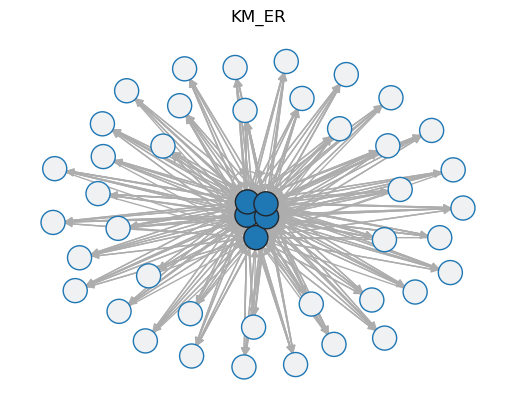

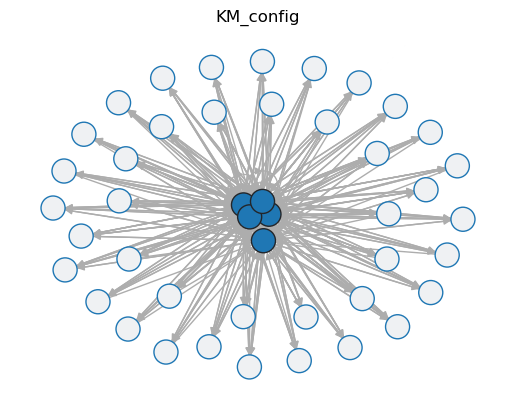

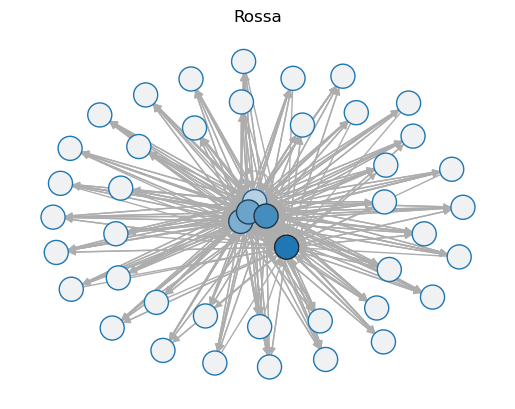

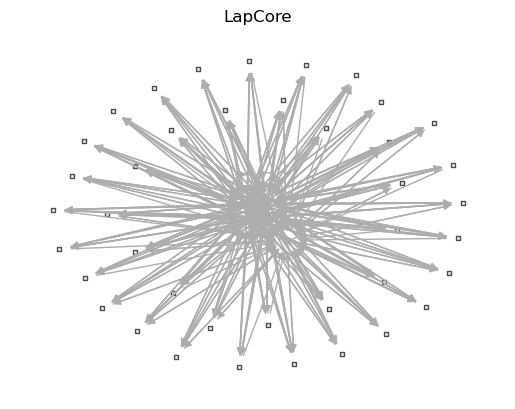

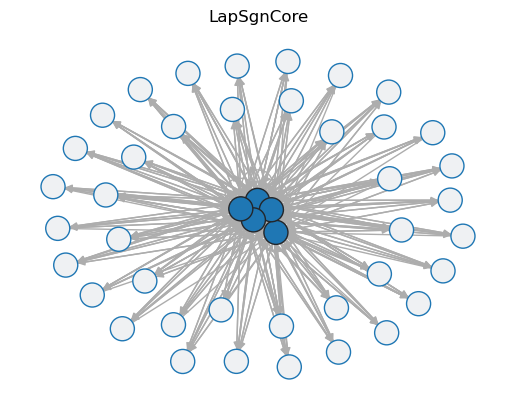

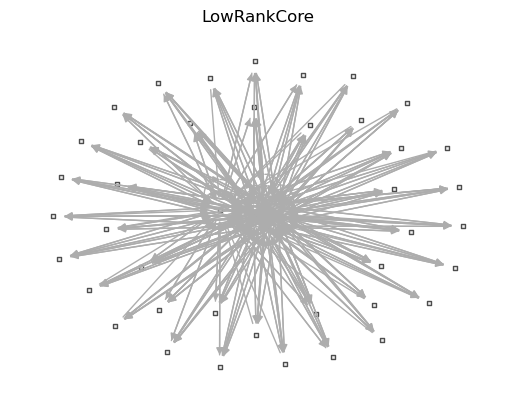

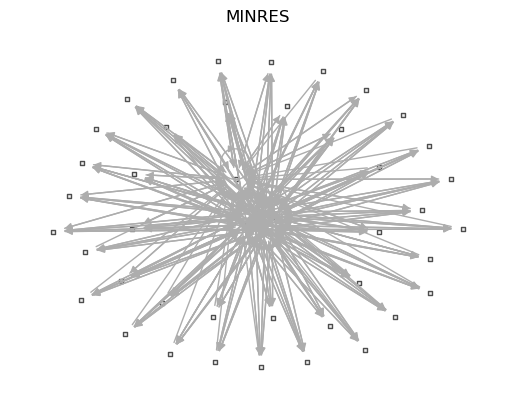

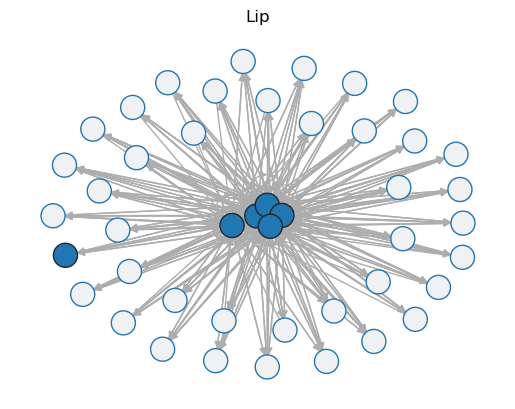

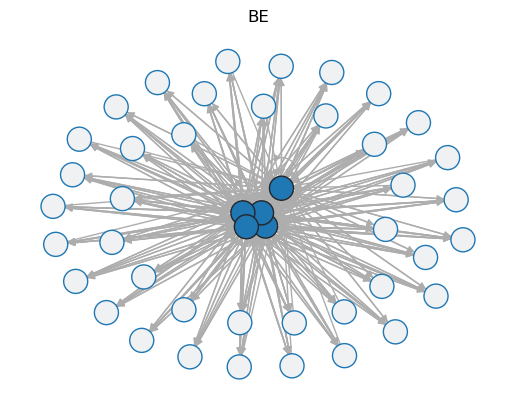

In [ ]:
import cpnet
from matplotlib import pyplot as plt
bank_network = nx.from_numpy_array(
            arr_adj_matrix,
            parallel_edges=False,
            create_using=nx.DiGraph,
        )

for algo in par.cp_algos:
    
    sig_c, sig_x = df_cpnet_testing.loc[algo][["sig_c", "sig_x"]]

    # plot cp structure
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax, pos = cpnet.draw(bank_network, sig_c, sig_x, ax)
    plt.title(algo)
    plt.plot()

# examples of density / histogram in log - log

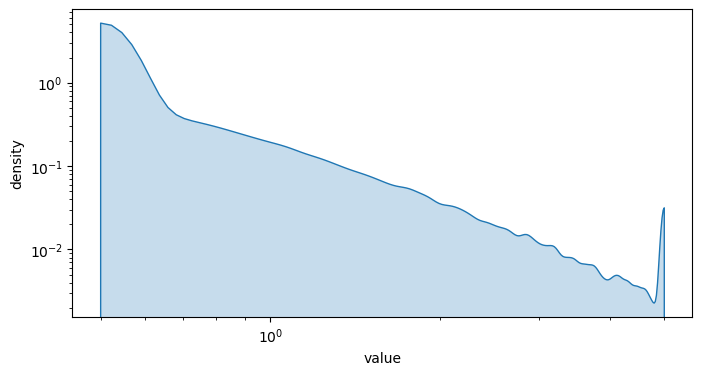

In [ ]:
# Pareto law

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.pareto(3,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(0.5,5), ax=ax, cut=0, fill=True)
ax.set_xscale('log')

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('value')
ax.set_ylabel('density')

# Show the plot
plt.show()

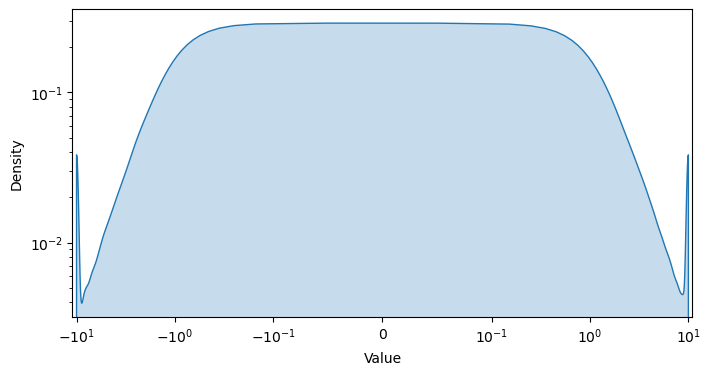

In [ ]:
# student law

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.standard_t(1,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(-10,10), ax=ax, fill=True, cut=0)
ax.set_xscale('symlog', linthresh=0.1)

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Show the plot
plt.show()

# multiple histogram on the same plot

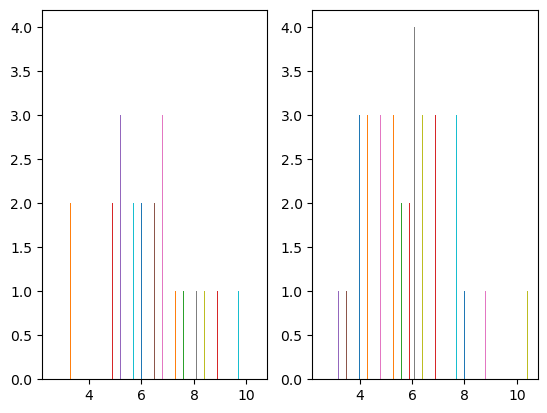

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
pos = 0
width = 0.2
for  t in range(10):
    binary_adj = np.random.randint(0,2,(10,10))
    bank_network = nx.from_numpy_array(
                binary_adj,
                parallel_edges=False,
                create_using=nx.DiGraph,
            )  # first define a networkx object.
    ar_in_degree = np.array(bank_network.in_degree())[:,1]
    hist = np.unique(ar_in_degree, return_counts=True)
    ax1.bar(hist[0] + pos, hist[1], width=0.01)
    ax2.bar(hist[0] + pos, hist[1], width=0.01)
    pos = pos +width +0.1



# power low fitting

Calculating best minimal value for power law fit
c:\Users\VictorLeCoz\Anaconda3\envs\interbank_network\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


3.5369177709484454
2.2279074096209066


<Axes: >

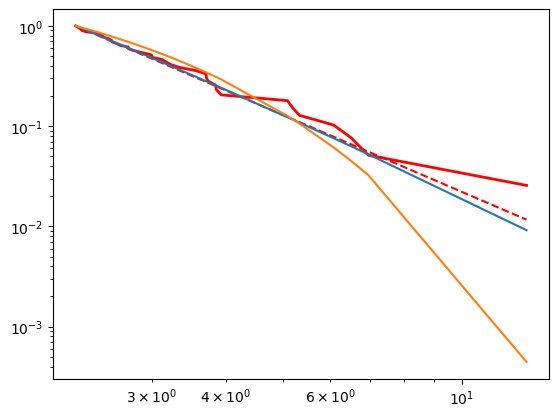

In [ ]:
# fitting
import powerlaw
import numpy as np
sr_data = np.random.pareto(3,size=1000) # data can be list or numpy array
powerlaw_fit = powerlaw.Fit(sr_data)
print(powerlaw_fit.power_law.alpha)
print(powerlaw_fit.power_law.xmin)
R, p = powerlaw_fit.distribution_compare('power_law', 'exponential')
fig2 = powerlaw_fit.plot_ccdf(color = "r", linewidth = 2)
powerlaw_fit.power_law.plot_ccdf(color = "r", linestyle = "--", ax = fig2)
powerlaw_fit.lognormal.plot_ccdf(ax=fig2)
powerlaw_fit.exponential.plot_ccdf(ax=fig2)

# build the calendar

In [ ]:
from workalendar.europe import EuropeanCentralBank

# build the list of holidays
holidays = []
for year in range(2000,2025):
    holidays = holidays + EuropeanCentralBank().holidays(year)

# reformating into a list
holidays = [tuple_day[0] for tuple_day in holidays]
holidays

[datetime.date(2000, 1, 1),
 datetime.date(2000, 4, 21),
 datetime.date(2000, 4, 24),
 datetime.date(2000, 5, 1),
 datetime.date(2000, 12, 25),
 datetime.date(2000, 12, 26),
 datetime.date(2001, 1, 1),
 datetime.date(2001, 4, 13),
 datetime.date(2001, 4, 16),
 datetime.date(2001, 5, 1),
 datetime.date(2001, 12, 25),
 datetime.date(2001, 12, 26),
 datetime.date(2002, 1, 1),
 datetime.date(2002, 3, 29),
 datetime.date(2002, 4, 1),
 datetime.date(2002, 5, 1),
 datetime.date(2002, 12, 25),
 datetime.date(2002, 12, 26),
 datetime.date(2003, 1, 1),
 datetime.date(2003, 4, 18),
 datetime.date(2003, 4, 21),
 datetime.date(2003, 5, 1),
 datetime.date(2003, 12, 25),
 datetime.date(2003, 12, 26),
 datetime.date(2004, 1, 1),
 datetime.date(2004, 4, 9),
 datetime.date(2004, 4, 12),
 datetime.date(2004, 5, 1),
 datetime.date(2004, 12, 25),
 datetime.date(2004, 12, 26),
 datetime.date(2005, 1, 1),
 datetime.date(2005, 3, 25),
 datetime.date(2005, 3, 28),
 datetime.date(2005, 5, 1),
 datetime.date(200

# analysis of ISING reporting in MMSR / underflag of evergreens

In [ ]:
df = df_mmsr_secured.groupby(["report_agent_lei","cntp_lei","trns_nominal_amt","maturity_band"]).agg({"trade_date":lambda x: list(x),"maturity_date":lambda x: list(x)})

In [ ]:
df_mmsr_secured[(df_mmsr_secured["report_agent_lei"]==14701)
                &(df_mmsr_secured["cntp_lei"]==13504)&(df_mmsr_secured["trns_nominal_amt"]==530871213.8)
                ]

coll_isin  trns_nominal_amt  trns_type maturity_band  \
381195  XS0427291751       530871213.8       True           O/N   
391066  XS0427291751       530871213.8       True           O/N   
393207  XS0427291751       530871213.8       True           O/N   
395877  XS0427291751       530871213.8       True      Up to 1W   

       unique_trns_id trade_date maturity_date  cntp_lei  report_agent_lei  \
381195            NaN 2016-05-24    2016-05-25     13504             14701   
391066            NaN 2016-06-01    2016-06-02     13504             14701   
393207            NaN 2016-06-02    2016-06-03     13504             14701   
395877            NaN 2016-06-03    2016-06-04     13504             14701   

        first_date  start_step  tenor  evergreen  
381195  2016-01-08          95      1       True  
391066  2016-01-08         101      1       True  
393207  2016-01-08         102      1       True  
395877  2016-01-08         103      1       True

In [ ]:
df_mmsr_secured = pd.read_csv(
        f"{path}pickle/df_mmsr_secured.csv", index_col=0
    )
for col in ["trade_date", "maturity_date"]:
        df_mmsr_secured[col] = pd.to_datetime(df_mmsr_secured[col])

C:\Users\VictorLeCoz\AppData\Local\Temp\ipykernel_24776\3848273711.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mmsr_secured = pd.read_csv(


In [ ]:
df = df_mmsr_secured[(df_mmsr_secured["report_agent_lei"]==14701)
                &(df_mmsr_secured["cntp_lei"]==13504)
                ]

# dump 

In [ ]:
import pickle
pickle.dump(
            df_finrep_clean,
            open(f"{path}pickle/df_finrep_clean.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )
pickle.dump(
            df_mmsr_unsecured,
            open(f"{path}pickle/df_mmsr_unsecured.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )
pickle.dump(
            df_expanded,
            open(f"{path}pickle/df_mmsr_secured_expanded.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )
pickle.dump(
            df_mmsr_secured,
            open(f"{path}pickle/df_mmsr_secured.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )

# test preprocessing bis for unsecured (not to run)

In [ ]:
# test for unsecured

mmsr_leis = df_mmsr_unsecured["report_agent_lei"].unique()
df_test = df_mmsr_unsecured[df_mmsr_unsecured["cntp_lei"].isin(mmsr_leis)]

path = "./results/empirical_results/test_3/unsecured/"

def get_df_expanded(
    df_clean,
    holidays=False,
    path=False,
    lending=True,
    var_name=False,
):
    """
    This function creates a dataframw where each contract is repeated on each line for each day it is active.
    """

    print("get df_mmsr_secured_expanded")

    # filter only on the reverse repo i.e. lending cash (except user choose the oposite)
    if lending:
        df = df_clean[
            df_clean["trns_type"]
        ]
    else:
        df = df_clean[
            ~df_clean["trns_type"]
        ]
    df.drop("trns_type", axis=1, inplace=True)


    # get the max day from the max of the trade dates
    max_day = max(pd.to_datetime(df["trade_date"]))
    clipped_maturity_date = df["maturity_date"].clip(upper=max_day)

    # Create a list of dates for each contract
    if holidays:
        date_ranges = [
            pd.bdate_range(start, end, freq="C", holidays=holidays)
            for start, end in zip(df["trade_date"], clipped_maturity_date)
        ]
    else:
        date_ranges = [
            pd.date_range(start, end)
            for start, end in zip(df["trade_date"], clipped_maturity_date)
        ]

    # Duplicate rows based on date ranges
    df_expanded = df.loc[
        df.index.repeat([len(dates) for dates in date_ranges])
    ].copy()
    df_expanded["current_date"] = [
        date for dates in date_ranges for date in dates
    ]

    # Reset the index
    df_expanded.reset_index(drop=True, inplace=True)

    # save df_mmsr_secured_clean
    if path:
        df_expanded.to_csv(
            f"{path}pickle/{var_name}.csv"
        )
        pickle.dump(
            df_expanded,
            open(f"{path}pickle/{var_name}.pickle", "wb"),
            protocol=pickle.HIGHEST_PROTOCOL,
        )


    return df_expanded




df_mmsr_unsecured_expanded = get_df_expanded(
    df_clean=df_test,
    holidays=False,
    path=False,
    lending=False,
    var_name="df_mmsr_unsecured_expanded",)
dic_rev_repo_exp_adj = ep.get_dic_rev_repo_exp_adj_from_df_mmsr_secured_expanded(df_mmsr_unsecured_expanded,path=path, plot_period=False)

# get aggregated adjency matrices
dic_arr_binary_adj = ep.get_dic_arr_binary_adj(dic_rev_repo_exp_adj=dic_rev_repo_exp_adj,path=path, plot_period=plot_period)

# get df_rev_repo_trans
df_rev_repo_trans = ep.get_df_rev_repo_trans(df_mmsr_secured_clean, path=path)


get df_mmsr_secured_expanded
get dic_rev_repo_exp_adj from df_mmsr_secured_expanded


100%|██████████| 2468/2468 [00:09<00:00, 265.70it/s]


get dic_arr_binary_adj
get df_rev_repo_trans


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.arange(10)
y = np.sin(x)
errors = np.random.uniform(0.1, 0.3, size=len(x))  # Example error values

# Plotting the shaded area
plt.plot(x, y, color='b', label='Data')
plt.fill_between(x, y - errors, y + errors, color='b', alpha=0.3, label='Error')

# Other plot configurations
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data with Error')
plt.legend()

# Display the plot
plt.show()


#  test the power law librairie

In [ ]:
import pandas as pd
import numpy as np
import powerlaw
sr_fake = np.random.exponential(1,int(1e5))
powerlaw_fit = powerlaw.Fit(sr_fake, xmin=1)

In [ ]:
powerlaw_fit.distribution_compare(
     "exponential", "power_law", normalized_ratio=True
)

(44.29930706890895, 0.0)

In [ ]:
powerlaw_fit.distribution_compare(
     "power_law","exponential", normalized_ratio=True
)

(-44.29930706890895, 0.0)

In [ ]:
powerlaw_fit.distribution_compare(
     "power_law", "truncated_power_law", normalized_ratio=True
)

Assuming nested distributions


(-63.470224626718185, 0.0)

In [ ]:
powerlaw_fit.distribution_compare(
     "truncated_power_law", "exponential", normalized_ratio=True
)

(-9.590864299607903, 8.735018341337445e-22)

In [ ]:
powerlaw_fit.truncated_power_law.alpha

1.000000024897637

In [ ]:
powerlaw_fit.power_law.alpha

2.6878179424498874

In [ ]:
powerlaw_fit.exponential.Lambda

1.0060108275159771

In [ ]:
import sys

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sr_fake)

(array([7.0642e+04, 2.0803e+04, 6.0200e+03, 1.7570e+03, 5.4700e+02,
        1.5500e+02, 4.7000e+01, 1.6000e+01, 1.1000e+01, 2.0000e+00]),
 array([1.12358211e-05, 1.22513904e+00, 2.45026684e+00, 3.67539465e+00,
        4.90052245e+00, 6.12565025e+00, 7.35077805e+00, 8.57590586e+00,
        9.80103366e+00, 1.10261615e+01, 1.22512893e+01]),
 <BarContainer object of 10 artists>)

In [ ]:
import parameters as par

In [ ]:
par.df_figures["items"][10]

['degree min network-1',
 'degree min network-50',
 'degree min network-100',
 'degree min network-250',
 'degree max network-1',
 'degree max network-50',
 'degree max network-100',
 'degree max network-250',
 'degree av. network-1',
 'degree av. network-50',
 'degree av. network-100',
 'degree av. network-250']

In [ ]:
par.df_plt.iloc[-150:]

label  \
item                                                                                   
powerlaw p-value lognormal reverse repo balance          power law p-value lognormal   
powerlaw p-value lognormal reverse repo balance...       power law p-value lognormal   
powerlaw p-value lognormal own funds                     power law p-value lognormal   
powerlaw p-value lognormal own funds over total...       power law p-value lognormal   
powerlaw p-value lognormal deposits                      power law p-value lognormal   
...                                                                              ...   
beta_init                                                              $\beta_0$ (%)   
beta_reg                                                                 $\beta$ (%)   
alpha_pareto                                                alpha patero (log scale)   
shocks_vol                                                   $\sigma$ (%, log scale)   
min_repo_trans_size                                 min repo trans. size (log scale)   

                                                                                    legend  \
item                                                                                         
powerlaw p-value lognormal reverse repo balance                       reverse repo balance   
powerlaw p-value lognormal reverse repo balance...  reverse repo balance over total assets   
powerlaw p-value lognormal own funds                                             own funds   
powerlaw p-value lognormal own funds over total...             own funds over total assets   
powerlaw p-value lognormal deposits                                               deposits   
...                                                                                    ...   
beta_init                                                                    $\beta_0$ (%)   
beta_reg                                                                       $\beta$ (%)   
alpha_pareto                                                      alpha patero (log scale)   
shocks_vol                                                         $\sigma$ (%, log scale)   
min_repo_trans_size                                       min repo trans. size (log scale)   

                                                     scale style convertion  
item                                                                         
powerlaw p-value lognormal reverse repo balance        log    .-             
powerlaw p-value lognormal reverse repo balance...     log    .-             
powerlaw p-value lognormal own funds                   log    .-             
powerlaw p-value lognormal own funds over total...     log    .-             
powerlaw p-value lognormal deposits                    log    .-             
...                                                    ...   ...        ...  
beta_init                                           linear                %  
beta_reg                                            linear                %  
alpha_pareto                                           log                   
shocks_vol                                             log                %  
min_repo_trans_size                                    log            False  

[150 rows x 5 columns]

# algoritme de gestion des chaines de reverse repo

In [ ]:
def are_not_already_in_a_chain(lender,borrower):
    output  = True
    for chain in chains_rev_repo:
        if lender in chain and borrower in chain:
            output = False
    return output


#### warning: need to check if the balance between the banks is empty first #####
def remove_rev_repo_from_chains(chains_rev_repo, lender,borrower):
    new_chains_rev_repo = chains_rev_repo.copy()
    chains_with_lender = []
    chains_with_borrower = []
    downstream_chains = []
    upstream_chains = []

    # loop over all chains 
    for chain in chains_rev_repo:

        # look for the chains with the pair sequence
        if lender in chain and borrower in chain:

            # if the two are in a chain they must be subsequent (otherwise a loop exists!)
            i = chain.index(lender)

            # build the two sub-chains
            downstream_chain = chain[:i+1]
            upstream_chain = chain[i+1:]

            # add them to the list of sub-chains 
            if len(downstream_chain)>1 and downstream_chain not in downstream_chains:
                downstream_chains.append(downstream_chain)
            if len(upstream_chain)>1 and upstream_chain not in upstream_chains:
                upstream_chains.append(upstream_chain)
            
            # remove this chain from the chains list 
            new_chains_rev_repo.remove(chain)
        
        # record all the chain in which the lender apears
        elif lender in chain and borrower not in chain:
            chains_with_lender.append(chain)
        
        # record all the chain in which the borrower apears
        if borrower in chain and lender not in chain:
            chains_with_borrower.append(chain)

    if not(chains_with_lender):
        new_chains_rev_repo += downstream_chains

    if not(chains_with_borrower):
        new_chains_rev_repo += upstream_chains
        
    return new_chains_rev_repo


def add_rev_repo_to_chains(lender,borrower):
    new_chains = []
    lender_and_borrower_in_no_chain = True

    
    for chain in chains_rev_repo:

        # do nothing if the borrower and the lender are in a chain
        if lender in chain and borrower in chain:
            return None

        # complet the chain if the lender is at the end or the borrower at the begining 
        elif lender==chain[-1]:
            lender_and_borrower_in_no_chain = False
            chain.append(borrower)
        elif borrower==chain[0]:
            lender_and_borrower_in_no_chain = False
            chain.insert(0,lender)

        # otherwise record the case where the lender or the borrwer (but not the two) are in a chain while avoid duplicates 
        else: 
            if lender in chain:
                lender_and_borrower_in_no_chain = False
                pos = chain.index(lender)
                new_chain = chain[:pos+1]
                new_chain.append(borrower)
                if new_chain not in new_chains:
                    new_chains.append(new_chain)

            if borrower in chain:
                lender_and_borrower_in_no_chain = False
                pos = chain.index(borrower)
                new_chain = chain[pos:]
                new_chain.insert(0,lender)
                if new_chain not in new_chains:
                    new_chains.append(new_chain)


    # need to create new chains previously recorded without duplicate 
    for new_chain in new_chains:
        chains_rev_repo.append(new_chain)

    # need to create a new chain if neither the borrower nor the lender are in any chain 
    if lender_and_borrower_in_no_chain:
        chains_rev_repo.append([lender,borrower])



    

[[3, 4],
 [3, 8, 2],
 [3, 8, 11, 27, 60],
 [7, 8, 2],
 [7, 8, 11, 27, 60],
 [14, 26],
 [3, 26],
 [25, 8, 2],
 [25, 8, 11, 27, 60]]

In [ ]:
chains_rev_repo = [[3,4],[3,8,2]]
chains_rev_repo

In [ ]:
# testing new repos
test_pairs = [[8,11],[7,8],[14,26],[3,26],[25,8],[3,11],[11,27],[27,60]]
for test_pair in test_pairs:
    lender = test_pair[0]
    borrower = test_pair[1]
    add_rev_repo_to_chains(lender,borrower)
chains_rev_repo

In [ ]:
# testing end repos
test_pairs = [[3,8],[8,11],[27,60]]
for test_pair in test_pairs:
    lender = test_pair[0]
    borrower = test_pair[1]
    chains_rev_repo = remove_rev_repo_from_chains(chains_rev_repo, lender,borrower)
chains_rev_repo

[[3, 4], [7, 8, 2], [14, 26], [3, 26], [25, 8, 2], [11, 27]]

In [ ]:
{0: [3, 4],
 1: [3, 8, 2],
 2: [3, 8, 11],
 3: [7, 8, 2],
 4: [7, 8, 11],
 5: [14, 26],
 6: [3, 26],
 7: [25, 8, 2],
 8: [25, 8, 11]}

[3, 8, 2]

In [ ]:
tests = [3,4,5]

tests.append(6,7)

tests

TypeError: append() takes exactly one argument (2 given)

In [ ]:
impact = 1
for t in range(250):
    impact = impact*(1+1e-5)
impact

1.0025031150746055

In [ ]:
1-(1+1e-5)**250/(1-(1+1e-5))

100251.31150680383

# gestion des erreurs

In [ ]:
if "ding":
    raise NameError(r"leverage ratio not above its regulatory level for one or several banks, check the df_banks under ./errors")

NameError: leverage ratio not above its regulatory level for one or several banks, check the df_banks under ./errors

In [ ]:
import numpy as np
import os
ar_range = np.sort(np.array(os.listdir("./results/parameter_space/test/runs/initial_deposits_size")))

In [ ]:
from dynamics import ClassDynamics
from network import ClassNetwork


# parameter setting
nb_banks=50
path_results="./results/single_run/test/"
initial_deposits_size = 40

# reg ratios
alpha_init=0.01  # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.5 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.5
beta_star=0.5
gamma=0.03
gamma_init = 3*gamma
collateral_value=1.0

# initialisation of deposits size
initialization_method="pareto"
alpha_pareto=1.3

# shocks on deposits
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.01 # 0.05

# min trans size
min_repo_trans_size=1e-8  # 1e-8

# dynamics & ploting
nb_steps=int(20e3)
dump_period=int(5e2)
plot_period=int(5e2)
cp_option=True
heavy_plot=False

# LCR mgt
LCR_mgt_opt=True

# leverage mgt
end_repo_period=False # if int, periodic end repo / if false, leverage mgt
gamma_star = 1.5*gamma

# money creation
loan_tenor=False # if int, money creation / if false. no new loans
loan_period=1
new_loans_vol = 0 # standard deviation around the mean creation of loans
new_loans_mean = 2e-2/250 # daily mean increase in loans expressed as a percentage of the intital loans (the other option would be a relative increase but it is unstable np.exp(np.log(1.01)/250)-1 = 4e-5)
beta_new = beta_reg # if number, new colat / if false, no new colat 
gamma_new = gamma_star

# substitution of collateral
substitution = False


# initialize ClassNetwork
Network = ClassNetwork(
    nb_banks=nb_banks,
    initial_deposits_size=initial_deposits_size,
    alpha_init=alpha_init,
    alpha=alpha,
    beta_init=beta_init,
    beta_reg=beta_reg,
    beta_star=beta_star,
    beta_new=beta_new,
    gamma_init=gamma_init,
    gamma=gamma,
    gamma_star=gamma_star,
    gamma_new=gamma_new,
    collateral_value=collateral_value,
    initialization_method=initialization_method,
    alpha_pareto=alpha_pareto,
    shocks_method=shocks_method,
    shocks_law=shocks_law,
    shocks_vol=shocks_vol,
    LCR_mgt_opt=LCR_mgt_opt,
    min_repo_trans_size=min_repo_trans_size,
    loan_tenor=loan_tenor,
    loan_period=loan_period,
    new_loans_vol=new_loans_vol,
    new_loans_mean=new_loans_mean,
    end_repo_period=end_repo_period,
    substitution=substitution,
)

# initialize ClassDynamics
Dynamics = ClassDynamics(
    Network,
    nb_steps=nb_steps,
    path_results=path_results,
    dump_period=dump_period,
    plot_period=plot_period,
    cp_option=cp_option,
    heavy_plot=heavy_plot,
)

# simulate
Dynamics.simulate()

simulate the repo market


  2%|▏         | 498/19999 [00:39<25:28, 12.76it/s]

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 812849.61it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 940426.91it/s]


get arr_rev_repo_exp_adj


9130it [00:06, 1474.75it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 500/500 [00:01<00:00, 380.35it/s]]


get jaccard


100%|██████████| 499/499 [00:00<00:00, 5906.50it/s]


get density


100%|██████████| 499/499 [00:00<00:00, 4343.64it/s]


get degree stats


100%|██████████| 499/499 [00:00<00:00, 1655.13it/s]


get exposure stats


100%|██████████| 501/501 [00:00<00:00, 5166.41it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2831.75it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.34it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2837.80it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.99it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2830.95it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.54it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2883.81it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 305.76it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1717.67it/s]


test on day 500




100%|██████████| 5/5 [00:01<00:00,  3.64it/s]


get transaction stats av. network


100%|██████████| 500/500 [00:00<00:00, 640.27it/s]


get transaction stats av. bank


  5%|▍         | 998/19999 [01:54<32:42,  9.68it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 791378.11it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 923855.51it/s]


get arr_rev_repo_exp_adj


19376it [00:18, 1027.28it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 1000/1000 [00:03<00:00, 280.59it/s]


get jaccard


100%|██████████| 999/999 [00:00<00:00, 5121.95it/s]


get density


100%|██████████| 999/999 [00:00<00:00, 4826.96it/s]


get degree stats


100%|██████████| 999/999 [00:00<00:00, 1678.73it/s]


get exposure stats


100%|██████████| 1001/1001 [00:00<00:00, 4996.99it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2856.96it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.60it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 521.19it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2880.07it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 549.45it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 503.74it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2910.37it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 547.55it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 489.30it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2966.58it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.99it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 467.42it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1721.45it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 548.26it/s]


test on day 1000




100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


get transaction stats av. network


100%|██████████| 1000/1000 [00:02<00:00, 390.08it/s]


get transaction stats av. bank


  7%|▋         | 1499/19999 [03:44<43:19,  7.12it/s]   

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 696728.24it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 855980.41it/s]


get arr_rev_repo_exp_adj


32194it [00:32, 975.73it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 1500/1500 [00:05<00:00, 266.65it/s]


get jaccard


100%|██████████| 1499/1499 [00:00<00:00, 4959.04it/s]


get density


100%|██████████| 1499/1499 [00:00<00:00, 4877.02it/s]


get degree stats


100%|██████████| 1499/1499 [00:00<00:00, 1672.16it/s]


get exposure stats


100%|██████████| 1501/1501 [00:00<00:00, 5021.22it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2880.03it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 531.48it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 514.42it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 471.11it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2901.11it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.57it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 498.42it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 448.93it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2890.49it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.96it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 487.62it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 434.57it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2864.39it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.16it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 462.82it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 410.74it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1719.07it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 546.94it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.02it/s]


test on day 1500





100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


get transaction stats av. network


100%|██████████| 1500/1500 [00:05<00:00, 276.29it/s]


get transaction stats av. bank


 10%|▉         | 1999/19999 [06:02<29:03, 10.33it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 725658.13it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 884874.26it/s]


get arr_rev_repo_exp_adj


43553it [00:47, 916.49it/s] [06:15<29:03, 10.33it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 2000/2000 [00:08<00:00, 245.57it/s]


get jaccard


100%|██████████| 1999/1999 [00:00<00:00, 4789.63it/s]


get density


100%|██████████| 1999/1999 [00:00<00:00, 4985.02it/s]


get degree stats


100%|██████████| 1999/1999 [00:01<00:00, 1674.78it/s]


get exposure stats


100%|██████████| 2001/2001 [00:00<00:00, 4971.62it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2807.55it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 518.38it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.65it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 468.46it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 431.90it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2748.49it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 528.34it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.54it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 441.77it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 459.08it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2900.36it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.37it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 481.26it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 429.70it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.20it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2911.78it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 535.94it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 460.12it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 403.94it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 418.27it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1703.17it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.37it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 512.37it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 463.40it/s]


test on day 2000





100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


get transaction stats av. network


100%|██████████| 2000/2000 [00:09<00:00, 211.00it/s]


get transaction stats av. bank


 12%|█▏        | 2498/19999 [08:49<28:29, 10.24it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 751667.38it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 884874.26it/s]


get arr_rev_repo_exp_adj


53199it [01:02, 844.97it/s] [09:00<28:29, 10.24it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 2500/2500 [00:11<00:00, 220.44it/s]


get jaccard


100%|██████████| 2499/2499 [00:00<00:00, 4849.51it/s]


get density


100%|██████████| 2499/2499 [00:00<00:00, 4937.18it/s]


get degree stats


100%|██████████| 2499/2499 [00:01<00:00, 1678.64it/s]


get exposure stats


100%|██████████| 2501/2501 [00:00<00:00, 4951.13it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2884.19it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 534.10it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 515.19it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 468.03it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 465.71it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 469.15it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2860.96it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.81it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 500.43it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 447.96it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 459.56it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 460.56it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2899.18it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.48it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 487.12it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 433.49it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 440.60it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 438.63it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2812.61it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 526.80it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 458.31it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 409.05it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 419.28it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.43it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1698.00it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.26it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 517.82it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 464.09it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 463.42it/s]


test on day 2500





100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


get transaction stats av. network


100%|██████████| 2500/2500 [00:13<00:00, 181.25it/s]


get transaction stats av. bank


 15%|█▍        | 2998/19999 [12:11<26:58, 10.51it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 773856.83it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 788403.01it/s]


get arr_rev_repo_exp_adj


63297it [01:18, 804.07it/s] [12:25<26:58, 10.51it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 3000/3000 [00:13<00:00, 219.33it/s]


get jaccard


100%|██████████| 2999/2999 [00:00<00:00, 4809.02it/s]


get density


100%|██████████| 2999/2999 [00:00<00:00, 4867.35it/s]


get degree stats


100%|██████████| 2999/2999 [00:01<00:00, 1680.86it/s]


get exposure stats


100%|██████████| 3001/3001 [00:00<00:00, 4987.64it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2938.98it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 525.12it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 517.93it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 471.69it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.38it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 471.93it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.52it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2864.59it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.92it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 502.02it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 441.22it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 441.06it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 451.03it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 451.22it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2843.87it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.83it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 484.06it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 434.29it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 446.52it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 451.27it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.04it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2887.21it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.22it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 460.51it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 407.22it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 416.63it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 436.76it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.70it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1726.38it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 546.95it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 513.55it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 463.24it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 460.55it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.98it/s]


test on day 3000





100%|██████████| 5/5 [00:06<00:00,  1.38s/it]


get transaction stats av. network


100%|██████████| 3000/3000 [00:19<00:00, 157.33it/s]


get transaction stats av. bank


 17%|█▋        | 3499/19999 [16:08<29:26,  9.34it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 687590.82it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 825650.39it/s]


get arr_rev_repo_exp_adj


73018it [01:33, 781.98it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 3500/3500 [00:16<00:00, 215.33it/s]


get jaccard


100%|██████████| 3499/3499 [00:00<00:00, 4802.34it/s]


get density


100%|██████████| 3499/3499 [00:00<00:00, 4896.32it/s]


get degree stats


100%|██████████| 3499/3499 [00:02<00:00, 1672.74it/s]


get exposure stats


100%|██████████| 3501/3501 [00:00<00:00, 4987.76it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2899.38it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 533.37it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 520.66it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 469.46it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.94it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.16it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 459.57it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 478.58it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2834.64it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.79it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 500.09it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 448.10it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.75it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 457.86it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 449.85it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 465.36it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2840.01it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.91it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 482.26it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.27it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.87it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.67it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.22it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.38it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2846.78it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.82it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 459.01it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 407.39it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 416.94it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 393.16it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.15it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 434.72it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1703.85it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.87it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 513.72it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 463.93it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.03it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.38it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 456.04it/s]


test on day 3500





100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


get transaction stats av. network


100%|██████████| 3500/3500 [00:25<00:00, 139.52it/s]


get transaction stats av. bank


 20%|█▉        | 3999/19999 [20:40<24:30, 10.88it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 816012.45it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 948937.56it/s]


get arr_rev_repo_exp_adj


82830it [01:47, 767.66it/s] [20:59<24:30, 10.88it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 4000/4000 [00:18<00:00, 210.68it/s]


get jaccard


100%|██████████| 3999/3999 [00:00<00:00, 4731.97it/s]


get density


100%|██████████| 3999/3999 [00:00<00:00, 4873.25it/s]


get degree stats


100%|██████████| 3999/3999 [00:02<00:00, 1666.63it/s]


get exposure stats


100%|██████████| 4001/4001 [00:00<00:00, 4959.37it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2818.17it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 523.97it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 505.44it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 459.77it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.31it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.70it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 455.88it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.55it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 471.20it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2889.57it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.82it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 488.93it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 445.66it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 451.76it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 455.81it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.18it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 461.03it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 453.56it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2886.04it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.37it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.78it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.30it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 441.85it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 445.31it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 437.00it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 453.02it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 435.74it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2837.29it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 524.04it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 456.89it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 406.89it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 410.73it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 426.49it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 418.13it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 424.98it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 427.67it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1707.28it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.77it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 509.65it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 461.96it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.41it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 466.11it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 453.29it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 476.59it/s]


test on day 4000





100%|██████████| 5/5 [00:09<00:00,  1.85s/it]


get transaction stats av. network


100%|██████████| 4000/4000 [00:32<00:00, 124.34it/s]


get transaction stats av. bank


 22%|██▏       | 4499/19999 [25:54<29:20,  8.81it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 715751.54it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 797396.20it/s]


get arr_rev_repo_exp_adj


94667it [02:04, 761.76it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 4500/4500 [00:19<00:00, 233.01it/s]


get jaccard


100%|██████████| 4499/4499 [00:00<00:00, 4714.98it/s]


get density


100%|██████████| 4499/4499 [00:00<00:00, 4899.27it/s]


get degree stats


100%|██████████| 4499/4499 [00:02<00:00, 1670.34it/s]


get exposure stats


100%|██████████| 4501/4501 [00:00<00:00, 4969.21it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2829.74it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 385.87it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 517.30it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.93it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.55it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 469.83it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.38it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 477.15it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 473.72it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.81it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2901.33it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 546.51it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 500.51it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 450.35it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 457.21it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 459.66it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 446.13it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 461.38it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 454.39it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 423.29it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2861.76it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.57it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.96it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.01it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 446.07it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.67it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.97it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.09it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 439.99it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.14it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2870.27it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.70it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 461.35it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 408.92it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 418.74it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.32it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.74it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 434.50it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 429.59it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 408.32it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1705.33it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 548.18it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.74it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.17it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.38it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.25it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.42it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 476.10it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 469.35it/s]


test on day 4500





100%|██████████| 5/5 [00:10<00:00,  2.11s/it]


get transaction stats av. network


100%|██████████| 4500/4500 [00:40<00:00, 109.78it/s]


get transaction stats av. bank


 25%|██▍       | 4999/19999 [31:41<26:22,  9.48it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 816012.45it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 866591.74it/s]


get arr_rev_repo_exp_adj


104778it [02:19, 748.45it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 5000/5000 [00:25<00:00, 197.93it/s]


get jaccard


100%|██████████| 4999/4999 [00:01<00:00, 4479.24it/s]


get density


100%|██████████| 4999/4999 [00:01<00:00, 4898.37it/s]


get degree stats


100%|██████████| 4999/4999 [00:02<00:00, 1674.25it/s]


get exposure stats


100%|██████████| 5001/5001 [00:01<00:00, 4950.62it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2767.59it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 523.45it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.05it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 468.87it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 462.66it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.48it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 454.94it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 476.49it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 474.77it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.70it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 450.44it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2828.26it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.42it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 498.84it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 446.82it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 456.82it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 456.85it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 446.45it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 466.71it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 455.28it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 426.25it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 448.55it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2841.82it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.65it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 483.41it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.58it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.42it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 450.53it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.08it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 456.63it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 441.60it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.43it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 441.59it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2853.44it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.77it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 462.25it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 405.41it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 419.25it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.88it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 429.57it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 435.98it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 432.81it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 409.13it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 430.05it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1722.74it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 549.83it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 519.34it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.35it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 462.38it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 468.13it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 455.58it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 479.72it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 469.74it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.61it/s]


test on day 5000





100%|██████████| 5/5 [00:11<00:00,  2.31s/it]


get transaction stats av. network


100%|██████████| 5000/5000 [00:50<00:00, 99.79it/s] 


get transaction stats av. bank


 27%|██▋       | 5499/19999 [38:15<24:38,  9.81it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 773856.83it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 812849.61it/s]


get arr_rev_repo_exp_adj


115545it [02:35, 744.99it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 5500/5500 [00:24<00:00, 227.80it/s]


get jaccard


100%|██████████| 5499/5499 [00:01<00:00, 4744.92it/s]


get density


100%|██████████| 5499/5499 [00:01<00:00, 4857.24it/s]


get degree stats


100%|██████████| 5499/5499 [00:03<00:00, 1668.84it/s]


get exposure stats


100%|██████████| 5501/5501 [00:01<00:00, 4923.38it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2750.53it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 533.94it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 516.26it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 470.71it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.97it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.58it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 458.58it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 478.21it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 476.17it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.31it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.06it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 463.89it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2875.02it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.71it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 492.63it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 447.60it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 457.82it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.27it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 449.50it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 465.22it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 458.78it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 427.27it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 450.34it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 451.17it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2865.12it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.13it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 482.93it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 434.46it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.53it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.07it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.10it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.97it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 442.49it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.80it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 442.11it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 439.80it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2836.02it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.62it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 458.48it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 407.43it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 416.91it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 438.41it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 425.73it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 433.91it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 428.09it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 406.09it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 425.14it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 413.77it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1693.53it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.83it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 517.09it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 463.62it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.99it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.98it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 451.68it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.10it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 467.75it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.48it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 457.23it/s]


test on day 5500





100%|██████████| 5/5 [00:12<00:00,  2.53s/it]


get transaction stats av. network


100%|██████████| 5500/5500 [01:00<00:00, 90.66it/s]


get transaction stats av. bank


 30%|██▉       | 5999/19999 [45:19<28:21,  8.23it/s]    

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 835518.73it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 866591.74it/s]


get arr_rev_repo_exp_adj


124912it [02:49, 735.64it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 6000/6000 [00:26<00:00, 228.35it/s]


get jaccard


100%|██████████| 5999/5999 [00:01<00:00, 4749.92it/s]


get density


100%|██████████| 5999/5999 [00:01<00:00, 4902.71it/s]


get degree stats


100%|██████████| 5999/5999 [00:03<00:00, 1673.57it/s]


get exposure stats


100%|██████████| 6001/6001 [00:01<00:00, 4945.66it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2847.22it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 531.43it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 519.98it/s]

test on day 1500






100%|██████████| 100/100 [00:00<00:00, 470.34it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 467.15it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 471.85it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 458.97it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 477.06it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 477.59it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 445.67it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.62it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 466.28it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 439.41it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2867.00it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.84it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 498.32it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 449.38it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.20it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.47it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 450.02it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 466.87it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 457.62it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 427.40it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 449.09it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 454.40it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.44it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2867.08it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.30it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 486.40it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 433.73it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 447.64it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 453.82it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 444.45it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.24it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 443.92it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 421.01it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 443.83it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 441.72it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 430.56it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2918.14it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.76it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 463.26it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 409.00it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 419.91it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.78it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.39it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 437.11it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 430.89it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 406.57it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 426.90it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 413.00it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 425.74it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1699.63it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 548.64it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 516.72it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 465.55it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.47it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 464.38it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 452.73it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 477.03it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 469.79it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.38it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.13it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.70it/s]


test on day 6000





100%|██████████| 5/5 [00:13<00:00,  2.76s/it]


get transaction stats av. network


100%|██████████| 6000/6000 [01:11<00:00, 83.94it/s]


get transaction stats av. bank


 32%|███▏      | 6499/19999 [53:08<24:42,  9.11it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 602629.89it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 539113.62it/s]


get arr_rev_repo_exp_adj


134476it [03:05, 725.32it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 6500/6500 [00:28<00:00, 228.46it/s]


get jaccard


100%|██████████| 6499/6499 [00:01<00:00, 4697.57it/s]


get density


100%|██████████| 6499/6499 [00:01<00:00, 4930.42it/s]


get degree stats


100%|██████████| 6499/6499 [00:03<00:00, 1668.47it/s]


get exposure stats


100%|██████████| 6501/6501 [00:01<00:00, 4963.38it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2833.63it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 529.71it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 513.52it/s]

test on day 1500






100%|██████████| 100/100 [00:00<00:00, 468.45it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.57it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.47it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 456.17it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 477.46it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 473.07it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.66it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 457.82it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 464.38it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 438.65it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 456.60it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2889.22it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.96it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 500.06it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 448.51it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.72it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.84it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 447.88it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 464.76it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 459.61it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 427.72it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 449.09it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 450.11it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.88it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 448.83it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2863.49it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.39it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 484.78it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.99it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 446.08it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.32it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.56it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.38it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 441.24it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.78it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 441.78it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 441.66it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.08it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 440.32it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2881.77it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.06it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 465.16it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 410.99it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 420.20it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 441.75it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 430.13it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 438.61it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 433.98it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 409.22it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 429.19it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 416.56it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 427.22it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 439.66it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1718.32it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 549.98it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 516.74it/s]


test on day 1500





100%|██████████| 100/100 [00:06<00:00, 15.79it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 456.31it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 462.57it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 447.00it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 467.59it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 459.26it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 437.33it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 453.82it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 460.85it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 434.00it/s]


test on day 6500





100%|██████████| 5/5 [00:21<00:00,  4.23s/it]


get transaction stats av. network


100%|██████████| 6500/6500 [01:21<00:00, 79.51it/s]


get transaction stats av. bank


 35%|███▍      | 6999/19999 [1:01:36<21:22, 10.14it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 661562.15it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 683111.40it/s]


get arr_rev_repo_exp_adj


145019it [03:23, 711.80it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 7000/7000 [00:30<00:00, 229.28it/s]


get jaccard


100%|██████████| 6999/6999 [00:01<00:00, 4707.38it/s]


get density


100%|██████████| 6999/6999 [00:01<00:00, 4895.81it/s]


get degree stats


100%|██████████| 6999/6999 [00:04<00:00, 1673.00it/s]


get exposure stats


100%|██████████| 7001/7001 [00:01<00:00, 5023.20it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2851.02it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 534.56it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.00it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 469.38it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.02it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 471.06it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 456.11it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.81it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 474.59it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.51it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 459.05it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 465.30it/s]


test on day 6000





100%|██████████| 100/100 [00:06<00:00, 15.60it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 439.11it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 446.21it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2793.37it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 513.01it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 473.03it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 435.81it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 447.06it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 451.02it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.64it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 455.96it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 451.91it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.28it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 444.81it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 446.00it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.82it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 445.73it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 451.24it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2830.58it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.03it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.71it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 428.94it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 439.04it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 443.19it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 435.62it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 450.53it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 431.97it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 412.19it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 434.80it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 434.00it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 421.14it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 433.78it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 435.75it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2810.59it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 531.94it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 448.42it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 398.87it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 410.49it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 427.84it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 418.51it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 427.09it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 421.72it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 399.59it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 419.76it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 406.43it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 418.10it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 426.64it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 416.37it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1689.27it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.96it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 509.78it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 456.10it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 453.11it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 456.83it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.00it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 467.94it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 463.71it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 431.75it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 447.49it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 453.20it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.99it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 429.47it/s]


test on day 7000





100%|██████████| 5/5 [00:22<00:00,  4.53s/it]


get transaction stats av. network


100%|██████████| 7000/7000 [01:34<00:00, 74.06it/s]


get transaction stats av. bank


 37%|███▋      | 7499/19999 [1:10:56<25:07,  8.29it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 725658.13it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 720670.79it/s]


get arr_rev_repo_exp_adj


155228it [03:39, 708.49it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 7500/7500 [00:33<00:00, 227.13it/s]


get jaccard


100%|██████████| 7499/7499 [00:01<00:00, 4742.81it/s]


get density


100%|██████████| 7499/7499 [00:01<00:00, 4920.49it/s]


get degree stats


100%|██████████| 7499/7499 [00:04<00:00, 1673.07it/s]


get exposure stats


100%|██████████| 7501/7501 [00:01<00:00, 5012.36it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2852.76it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.11it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 519.65it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 473.24it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.34it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 473.24it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 458.27it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 480.38it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 477.44it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 447.39it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.39it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 467.09it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 441.53it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 460.09it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 463.51it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 442.11it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2883.18it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.35it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 498.02it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 448.52it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 458.46it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 459.29it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 448.23it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 466.23it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 455.52it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 424.08it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 447.51it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 449.78it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 431.98it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 448.29it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 452.01it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 432.25it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2859.30it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.88it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 482.44it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 429.79it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 444.71it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 451.01it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.55it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.15it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.77it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 416.44it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 440.01it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 440.44it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.52it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 442.16it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.69it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 428.15it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2922.70it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.95it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 459.72it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 406.45it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 417.56it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.86it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 427.47it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 435.00it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 430.16it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 406.54it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 426.76it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 414.04it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 425.62it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 435.81it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 424.35it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 418.74it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1702.08it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 548.98it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.54it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.41it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.85it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 468.43it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 454.31it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 476.17it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 468.80it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.66it/s]


test on day 5000





100%|██████████| 100/100 [00:07<00:00, 12.77it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 442.68it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 414.65it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 434.30it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 441.52it/s]


test on day 7500





100%|██████████| 5/5 [00:25<00:00,  5.01s/it]


get transaction stats av. network


100%|██████████| 7500/7500 [01:54<00:00, 65.31it/s]


get transaction stats av. bank


 40%|███▉      | 7999/19999 [1:21:04<22:02,  9.07it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 496955.45it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 762600.73it/s]


get arr_rev_repo_exp_adj


166825it [03:55, 706.98it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 8000/8000 [00:36<00:00, 216.99it/s]


get jaccard


100%|██████████| 7999/7999 [00:01<00:00, 4714.24it/s]


get density


100%|██████████| 7999/7999 [00:01<00:00, 4848.15it/s]


get degree stats


100%|██████████| 7999/7999 [00:04<00:00, 1665.06it/s]


get exposure stats


100%|██████████| 8001/8001 [00:01<00:00, 4996.78it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2810.44it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 527.21it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 515.03it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.99it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 462.74it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.10it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 454.50it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.99it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 472.86it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.00it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 458.52it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 463.37it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 439.08it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 455.81it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 460.44it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.64it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 365.07it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2877.90it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.58it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 490.45it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 443.61it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 451.42it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 409.05it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.13it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 461.71it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 456.96it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 425.07it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 450.10it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 450.75it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 431.53it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 449.09it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 451.59it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 431.70it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 435.32it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2047.53it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.16it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 481.57it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.13it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.26it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 450.25it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 439.32it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 452.72it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 437.34it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 415.23it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 438.37it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 436.88it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 423.61it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 440.95it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 420.61it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 420.10it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 427.47it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2835.16it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 490.56it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 457.42it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 393.57it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 416.79it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.62it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.39it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 434.62it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 429.38it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 405.48it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 425.97it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 413.64it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 423.26it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 432.03it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 422.23it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 417.16it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 405.66it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1704.67it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.74it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 513.16it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 462.11it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 457.23it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 462.33it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 450.90it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 472.20it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 463.71it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 440.04it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 453.73it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 460.70it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 362.59it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 455.39it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 458.43it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.80it/s]


test on day 8000






100%|██████████| 5/5 [00:27<00:00,  5.43s/it]


get transaction stats av. network


100%|██████████| 8000/8000 [02:05<00:00, 63.84it/s]


get transaction stats av. bank


 42%|████▏     | 8499/19999 [1:31:56<21:56,  8.74it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 683111.40it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 713317.01it/s]


get arr_rev_repo_exp_adj


176987it [04:09, 709.36it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 8500/8500 [00:37<00:00, 223.69it/s]


get jaccard


100%|██████████| 8499/8499 [00:01<00:00, 4754.46it/s]


get density


100%|██████████| 8499/8499 [00:01<00:00, 4975.13it/s]


get degree stats


100%|██████████| 8499/8499 [00:05<00:00, 1682.66it/s]


get exposure stats


100%|██████████| 8501/8501 [00:01<00:00, 5022.49it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2793.82it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 478.38it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 520.36it/s]

test on day 1500




100%|██████████| 100/100 [00:00<00:00, 472.15it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 467.62it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 471.52it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 459.07it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 477.87it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 477.05it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 445.84it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.45it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 466.42it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 440.70it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 461.02it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 465.16it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 441.86it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 451.28it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 450.73it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2925.12it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.12it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 502.33it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 450.79it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 458.02it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 461.37it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 450.72it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 467.66it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 460.62it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 429.12it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 452.73it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 454.54it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 435.23it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 451.12it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 455.11it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 434.54it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 441.30it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 441.24it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2872.65it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.74it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 485.75it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 435.14it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 448.20it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 454.91it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.52it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.89it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 444.01it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 421.05it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 444.40it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 444.05it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 431.74it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 445.37it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.14it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 430.01it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 432.64it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 432.49it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2906.41it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.84it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 463.89it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 410.08it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 420.56it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 440.81it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.37it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 436.38it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 433.42it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 409.52it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 428.84it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 416.15it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 426.84it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 437.89it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 426.06it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 422.21it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 400.36it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 424.66it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1710.08it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 551.56it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 519.63it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.92it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.30it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.75it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 455.44it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 478.21it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 470.69it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.84it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 458.89it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 466.61it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 438.89it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.19it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.49it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 439.91it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 447.53it/s]


test on day 8500





100%|██████████| 5/5 [00:19<00:00,  3.96s/it]


get transaction stats av. network


100%|██████████| 8500/8500 [02:20<00:00, 60.37it/s]


get transaction stats av. bank


 45%|████▍     | 8999/19999 [1:43:32<23:39,  7.75it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 613202.34it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 701388.63it/s]


get arr_rev_repo_exp_adj


188385it [04:25, 708.92it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 9000/9000 [00:40<00:00, 223.95it/s]


get jaccard


100%|██████████| 8999/8999 [00:01<00:00, 4722.30it/s]


get density


100%|██████████| 8999/8999 [00:01<00:00, 4840.96it/s]


get degree stats


100%|██████████| 8999/8999 [00:05<00:00, 1674.02it/s]


get exposure stats


100%|██████████| 9001/9001 [00:01<00:00, 4959.37it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2822.47it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 534.50it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 512.48it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 470.31it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.45it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 469.22it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 456.35it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.93it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 479.58it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 445.15it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.27it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 457.88it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 436.64it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 457.50it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 460.82it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 436.90it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 442.72it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 447.49it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 414.93it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2819.74it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.41it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 487.72it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 444.60it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.58it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.38it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 446.58it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 464.52it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 456.66it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 427.01it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 450.69it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 451.23it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 431.42it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 447.17it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 452.89it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 433.02it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 435.68it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 429.45it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 400.71it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2865.00it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.31it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 483.46it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 427.86it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 440.89it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 405.99it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 444.50it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 460.13it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 439.80it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 417.62it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 441.41it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 439.34it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 424.95it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 442.40it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 448.60it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 426.94it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 427.24it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 428.31it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 393.22it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2875.51it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 507.21it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 463.01it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 406.07it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 417.03it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 429.06it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.95it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 434.89it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 427.24it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 328.41it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 428.14it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 414.23it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 419.66it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 334.71it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 425.51it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 421.48it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 411.01it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 421.20it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 382.41it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1730.09it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.05it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 509.64it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 461.67it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 459.91it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.91it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 453.95it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 477.77it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 463.89it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 439.49it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 458.73it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 235.75it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.64it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 454.34it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 458.32it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 436.66it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 443.24it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 443.50it/s]


test on day 9000





100%|██████████| 5/5 [00:21<00:00,  4.30s/it]


get transaction stats av. network


100%|██████████| 9000/9000 [03:30<00:00, 42.80it/s]


get transaction stats av. bank


 47%|████▋     | 9498/19999 [1:57:33<19:07,  9.15it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 639375.61it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 494611.32it/s]


get arr_rev_repo_exp_adj


197980it [04:40, 706.03it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 9500/9500 [00:42<00:00, 224.33it/s]


get jaccard


100%|██████████| 9499/9499 [00:02<00:00, 4700.68it/s]


get density


100%|██████████| 9499/9499 [00:01<00:00, 4830.65it/s]


get degree stats


100%|██████████| 9499/9499 [00:05<00:00, 1667.88it/s]


get exposure stats


100%|██████████| 9501/9501 [00:01<00:00, 4933.33it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2799.64it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 527.78it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 514.99it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 468.04it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.22it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.76it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 453.72it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.23it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 475.32it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.12it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.27it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 461.07it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 435.37it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 453.57it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 458.25it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 436.20it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 443.78it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.23it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 410.91it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 443.77it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2799.77it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 483.68it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 487.07it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 443.60it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 453.34it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 454.47it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 449.46it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 464.29it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 458.90it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 428.28it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 451.34it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 450.98it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 433.87it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 446.74it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.75it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 430.65it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 437.34it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 437.27it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 406.92it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 445.99it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2863.57it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.90it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 470.73it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 433.76it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.51it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 448.40it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 440.11it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 456.55it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.53it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 418.26it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 439.92it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 439.43it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 427.15it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 441.06it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 445.33it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 426.62it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 428.85it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 429.63it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 394.99it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 439.63it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2867.16it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.83it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 463.45it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 405.58it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 417.27it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.16it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 427.96it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 432.45it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 428.30it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 405.93it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 425.72it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 411.88it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 424.09it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 433.77it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 422.90it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 418.13it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 411.30it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 422.45it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 380.50it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 420.01it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1707.26it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.70it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 513.92it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 464.87it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 460.79it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.18it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 453.91it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.30it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 467.23it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 437.03it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.42it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.63it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 435.61it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 454.91it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 459.55it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.98it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 445.60it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.50it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 414.09it/s]


test on day 9500





100%|██████████| 5/5 [00:22<00:00,  4.46s/it]


get transaction stats av. network


100%|██████████| 9500/9500 [03:03<00:00, 51.81it/s]


get transaction stats av. bank


 50%|████▉     | 9999/19999 [2:10:32<19:09,  8.70it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 534987.76it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 594094.05it/s]


get arr_rev_repo_exp_adj


207174it [04:55, 702.07it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 10000/10000 [00:57<00:00, 173.27it/s]


get jaccard


100%|██████████| 9999/9999 [00:02<00:00, 4578.25it/s]


get density


100%|██████████| 9999/9999 [00:02<00:00, 4895.94it/s]


get degree stats


100%|██████████| 9999/9999 [00:06<00:00, 1665.61it/s]


get exposure stats


100%|██████████| 10001/10001 [00:02<00:00, 4948.10it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2834.31it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 527.62it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 513.98it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 469.62it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 465.13it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.22it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.02it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.19it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 474.40it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.53it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 453.19it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 463.82it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 440.91it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 456.63it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.81it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 439.02it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 449.59it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 448.44it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.16it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 451.27it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 461.53it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2861.44it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.17it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 497.33it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 448.76it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 454.82it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.16it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 446.95it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 462.93it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 457.25it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 425.85it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 446.57it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 444.24it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 429.47it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 442.99it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 450.03it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.34it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 430.16it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 433.98it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 400.55it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 439.20it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 444.18it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2857.19it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 532.11it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 478.62it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 429.00it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.01it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 448.65it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 440.13it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 454.31it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 438.13it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 418.00it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 438.92it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 439.44it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 425.11it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 439.09it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 443.64it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 425.76it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 424.89it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 428.94it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 392.41it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 440.48it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 437.08it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2850.03it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.78it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 454.54it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 407.63it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 416.84it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.44it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 427.96it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 435.24it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 428.96it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 407.52it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 426.11it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 411.42it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 424.62it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 433.92it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 420.75it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 417.19it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 410.62it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 420.22it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 380.08it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 418.39it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 423.06it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1678.32it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.99it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 510.58it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 460.36it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.54it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 461.32it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 450.90it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 471.74it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 466.60it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 440.45it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 455.68it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 461.92it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 434.38it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 451.84it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 456.55it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.03it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 443.34it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.53it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 413.46it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 449.68it/s]


test on day 10000





100%|██████████| 5/5 [00:23<00:00,  4.70s/it]


get transaction stats av. network


100%|██████████| 10000/10000 [03:18<00:00, 50.42it/s]


get transaction stats av. bank


 52%|█████▏    | 10499/19999 [2:24:27<17:18,  9.15it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 708497.30it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 765383.94it/s]


get arr_rev_repo_exp_adj


216116it [05:10, 696.39it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 10500/10500 [00:47<00:00, 221.87it/s]


get jaccard


100%|██████████| 10499/10499 [00:02<00:00, 4689.85it/s]


get density


100%|██████████| 10499/10499 [00:02<00:00, 4738.33it/s]


get degree stats


100%|██████████| 10499/10499 [00:06<00:00, 1667.44it/s]


get exposure stats


100%|██████████| 10501/10501 [00:02<00:00, 4944.55it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2847.21it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 226.12it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.13it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 469.62it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.88it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.40it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 459.05it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 478.25it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 476.67it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 446.91it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 462.62it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 469.92it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 442.15it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 459.36it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.12it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 439.27it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 447.83it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 447.60it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 413.81it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 451.12it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 459.55it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 449.41it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2895.98it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.23it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 495.96it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 445.49it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 452.16it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 457.07it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 434.00it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 464.79it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 455.32it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 424.54it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 444.53it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 449.98it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 429.90it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 445.35it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.10it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 429.75it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 432.82it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 435.26it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 401.89it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 441.70it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 444.77it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 440.06it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2868.45it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.71it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 480.88it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.22it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 442.84it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.16it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.27it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 455.72it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 436.23it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 417.05it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 437.56it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 437.85it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 424.43it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 439.57it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 445.64it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 424.96it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 427.58it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 427.81it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 392.84it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 430.35it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 435.48it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 438.48it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2865.88it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.49it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 461.01it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 407.46it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 418.16it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.57it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.58it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 435.62it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 430.04it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 407.47it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 425.61it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 413.03it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 425.39it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 435.74it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 423.88it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 419.85it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 411.44it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 421.28it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 383.16it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 422.93it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 428.37it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 431.43it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1701.89it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 548.39it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.41it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 465.23it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.83it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.88it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 454.50it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.75it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 466.58it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 439.52it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 457.47it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 463.27it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 437.34it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 456.10it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.33it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 438.66it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 447.54it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 447.30it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 414.95it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 453.03it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 460.43it/s]


test on day 10500





100%|██████████| 5/5 [00:24<00:00,  4.97s/it]


get transaction stats av. network


100%|██████████| 10500/10500 [03:34<00:00, 48.92it/s]


get transaction stats av. bank


 55%|█████▍    | 10998/19999 [2:39:18<16:47,  8.93it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 620459.17it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 701388.63it/s]


get arr_rev_repo_exp_adj


226059it [05:24, 697.43it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 11000/11000 [00:49<00:00, 220.68it/s]


get jaccard


100%|██████████| 10999/10999 [00:02<00:00, 4711.11it/s]


get density


100%|██████████| 10999/10999 [00:02<00:00, 4860.23it/s]


get degree stats


100%|██████████| 10999/10999 [00:06<00:00, 1672.28it/s]


get exposure stats


100%|██████████| 11001/11001 [00:02<00:00, 4988.94it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2820.93it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.68it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.45it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 464.96it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.56it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 464.80it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 452.81it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 472.91it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 473.07it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 440.09it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.72it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 463.08it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 436.54it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 456.24it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 459.87it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.59it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 447.44it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 446.99it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 414.37it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 449.79it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 458.99it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 449.31it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 454.86it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2850.96it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.49it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 498.78it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 447.21it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 454.92it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 459.21it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 444.10it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 463.89it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 458.55it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 427.85it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 448.84it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 452.63it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.35it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 449.73it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 452.73it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 433.08it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 439.58it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 438.05it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 406.73it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 438.73it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 440.71it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 434.34it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 440.54it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2867.23it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 532.69it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.80it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 423.54it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 433.29it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 438.97it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.88it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 443.18it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 429.26it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 410.33it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 425.59it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 433.00it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 417.34it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 430.39it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 433.51it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 417.14it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 419.69it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 417.94it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 389.66it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 433.45it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 435.61it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 438.28it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 434.35it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2951.16it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.79it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 453.66it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 403.75it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 412.95it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 435.83it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 425.41it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 431.63it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 425.98it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 402.78it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 423.38it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 410.19it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 422.33it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 432.19it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 418.99it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 414.43it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 410.42it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 421.05it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 375.47it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 411.63it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 418.95it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 422.09it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 410.98it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1715.98it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.96it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 511.38it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 453.30it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 452.13it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 453.38it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 446.22it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 466.37it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 460.66it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 436.25it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 451.30it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 460.15it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 434.02it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 453.50it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 457.80it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 436.24it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 439.56it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 443.25it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 412.26it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 447.78it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 458.08it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 446.38it/s]


test on day 11000





100%|██████████| 5/5 [00:25<00:00,  5.19s/it]


get transaction stats av. network


100%|██████████| 11000/11000 [03:59<00:00, 45.84it/s]


get transaction stats av. bank


 57%|█████▋    | 11499/19999 [2:54:58<15:51,  8.93it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 694421.19it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 743670.92it/s]


get arr_rev_repo_exp_adj


236262it [05:37, 699.50it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 11500/11500 [00:51<00:00, 224.13it/s]


get jaccard


100%|██████████| 11499/11499 [00:02<00:00, 4744.28it/s]


get density


100%|██████████| 11499/11499 [00:02<00:00, 4967.35it/s]


get degree stats


100%|██████████| 11499/11499 [00:06<00:00, 1668.45it/s]


get exposure stats


100%|██████████| 11501/11501 [00:02<00:00, 4960.71it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2784.82it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 428.82it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 517.11it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 451.21it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 463.34it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 464.96it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 456.26it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.00it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 473.24it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.30it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.69it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 464.42it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 436.85it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.02it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 457.33it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 439.46it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 445.19it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 448.60it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.07it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 451.14it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 460.59it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 450.15it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 455.03it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 450.48it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2874.82it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 535.16it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 490.82it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 445.77it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 451.98it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 455.39it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.13it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 464.18it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 455.20it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 426.20it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 447.85it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 450.23it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 431.99it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 448.31it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 451.70it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 430.94it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 438.76it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 436.04it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 405.15it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 443.47it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 450.40it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 442.75it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 445.76it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 448.46it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2843.56it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.56it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 481.93it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.68it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.41it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 450.78it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.35it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 457.18it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 439.33it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 417.49it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 438.63it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 436.49it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 427.45it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 438.45it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 443.94it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 423.37it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 429.28it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 426.94it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 393.16it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 429.16it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 431.66it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 433.89it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 431.35it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 430.66it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2808.43it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 533.53it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 452.20it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 404.88it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 412.06it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 432.05it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 421.23it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 426.88it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 423.27it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 399.55it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 419.92it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 408.14it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 416.08it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 427.47it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 416.00it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 413.58it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 405.75it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 415.21it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 380.65it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 421.14it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 425.19it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 429.02it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 419.54it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 424.54it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1688.35it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.12it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 511.91it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 464.50it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 457.82it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.87it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 451.29it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.40it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 466.83it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.56it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 457.33it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.85it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 436.86it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 454.95it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 459.36it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.31it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 449.10it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.01it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 412.70it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 451.23it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 459.73it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 449.68it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 457.31it/s]


test on day 11500





100%|██████████| 5/5 [00:27<00:00,  5.44s/it]


get transaction stats av. network


100%|██████████| 11500/11500 [04:23<00:00, 43.60it/s]


get transaction stats av. bank


 60%|█████▉    | 11998/19999 [3:11:13<14:49,  8.99it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 657414.42it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 579323.76it/s]


get arr_rev_repo_exp_adj


245637it [05:54, 692.00it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 12000/12000 [00:53<00:00, 224.55it/s]


get jaccard


100%|██████████| 11999/11999 [00:02<00:00, 4672.18it/s]


get density


100%|██████████| 11999/11999 [00:02<00:00, 4825.31it/s]


get degree stats


100%|██████████| 11999/11999 [00:07<00:00, 1661.41it/s]


get exposure stats


100%|██████████| 12001/12001 [00:02<00:00, 4967.28it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2815.91it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 533.67it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 520.87it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 468.82it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.17it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 468.94it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.43it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 478.64it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 477.05it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 444.04it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.28it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 465.31it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 438.93it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.09it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.80it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 438.84it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 447.79it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 447.93it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 414.92it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 449.73it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 460.61it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 450.94it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 457.01it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 452.84it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 448.61it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2874.84it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.53it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 497.25it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 445.63it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.12it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 459.24it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 448.59it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 463.55it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 457.52it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 428.14it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 447.90it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 451.81it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 433.10it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 448.49it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 454.68it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 432.37it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 438.79it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 438.56it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 404.56it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 444.51it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 450.90it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 444.74it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 445.71it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 451.35it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 441.57it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2881.81it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.75it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 481.06it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 433.23it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 447.03it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.92it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.05it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 457.96it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 442.69it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 420.09it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 444.29it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 441.91it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 429.27it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 444.69it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 448.85it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 430.20it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 431.95it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 431.19it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 396.21it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 440.01it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 443.74it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 444.41it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 439.91it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 443.86it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 437.90it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2921.27it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.88it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 462.73it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 409.54it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 418.60it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.73it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 429.11it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 435.12it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 431.50it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 406.05it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 425.23it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 414.10it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 423.86it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 434.46it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 424.31it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 420.27it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 412.04it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 423.55it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 384.77it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 424.35it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 430.88it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 434.22it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 422.37it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 429.32it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 429.93it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1709.01it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 549.72it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 522.44it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 467.17it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.26it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 468.43it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 456.50it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 473.95it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 465.30it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 440.55it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 459.22it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 466.19it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 438.64it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 459.45it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 459.83it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 442.33it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 448.32it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 448.76it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 418.16it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 453.68it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 462.84it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 451.25it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 459.60it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 455.68it/s]


test on day 12000





100%|██████████| 5/5 [00:27<00:00,  5.59s/it]


get transaction stats av. network


100%|██████████| 12000/12000 [04:50<00:00, 41.31it/s]


get transaction stats av. bank


 62%|██████▏   | 12499/19999 [3:28:43<17:50,  7.01it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 730714.98it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 710898.98it/s]


get arr_rev_repo_exp_adj


254678it [06:10, 687.56it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 12500/12500 [00:56<00:00, 219.98it/s]


get jaccard


100%|██████████| 12499/12499 [00:02<00:00, 4393.26it/s]


get density


100%|██████████| 12499/12499 [00:02<00:00, 4640.29it/s]


get degree stats


100%|██████████| 12499/12499 [00:07<00:00, 1679.86it/s]


get exposure stats


100%|██████████| 12501/12501 [00:02<00:00, 4990.98it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2799.23it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.89it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 517.14it/s]

test on day 1500






100%|██████████| 100/100 [00:00<00:00, 466.68it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 462.57it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.34it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 456.41it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 473.98it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 472.45it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 440.66it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.95it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.92it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 436.85it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 455.22it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 458.11it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 438.47it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 445.78it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.56it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 413.66it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 448.50it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 458.52it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 447.28it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 452.86it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 452.72it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 447.34it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 451.37it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2819.23it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.00it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 492.51it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 446.18it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.78it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.96it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 450.38it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 464.87it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 453.43it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 424.80it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 448.41it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 451.31it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.02it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 445.82it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 451.19it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 430.39it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 436.73it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 435.65it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 403.90it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 443.72it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 446.71it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 440.57it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 444.10it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 448.69it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 440.19it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 444.75it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2859.73it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.62it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 484.87it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 433.30it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 446.74it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.89it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.21it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 457.18it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 443.48it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 420.34it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 442.81it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 441.28it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 429.09it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 443.21it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.29it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.55it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 430.84it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 432.00it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 394.81it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 440.94it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 441.21it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 442.05it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 440.16it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 443.26it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 438.89it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 440.95it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2827.42it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.00it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 460.61it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 404.55it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 415.41it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 435.68it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 424.58it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 430.95it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 426.69it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 404.37it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 423.90it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 410.57it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 421.51it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 431.22it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 421.38it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 417.09it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 412.27it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 420.53it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 379.33it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 419.82it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 423.54it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 428.40it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 416.01it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 422.92it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 423.90it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 425.87it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1693.63it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.88it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 509.22it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 462.57it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 459.51it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 463.11it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 451.51it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.68it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 469.39it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.68it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.71it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 464.47it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 439.45it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 457.57it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.75it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 440.44it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 449.41it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.93it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.25it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 449.82it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 459.33it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 450.72it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 454.18it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 452.29it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 448.13it/s]


test on day 12500





100%|██████████| 5/5 [00:29<00:00,  5.85s/it]


get transaction stats av. network


100%|██████████| 12500/12500 [05:11<00:00, 40.10it/s]


get transaction stats av. bank


 65%|██████▍   | 12999/19999 [3:46:46<13:10,  8.86it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 748982.86it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 762600.73it/s]


get arr_rev_repo_exp_adj


264572it [06:23, 690.17it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 13000/13000 [00:58<00:00, 224.13it/s]


get jaccard


100%|██████████| 12999/12999 [00:02<00:00, 4675.00it/s]


get density


100%|██████████| 12999/12999 [00:02<00:00, 4951.19it/s]


get degree stats


100%|██████████| 12999/12999 [00:07<00:00, 1680.89it/s]


get exposure stats


100%|██████████| 13001/13001 [00:02<00:00, 4973.82it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2807.23it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 386.77it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.19it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 469.51it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.61it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.86it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.18it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 478.08it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 474.72it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.41it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 459.27it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 469.38it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 439.62it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 459.69it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 465.16it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 440.29it/s]


test on day 8000







100%|██████████| 100/100 [00:20<00:00,  4.98it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 425.25it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 390.52it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 432.41it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 441.68it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 431.49it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 437.89it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 437.38it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 430.12it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 434.12it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 439.07it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2839.76it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 518.26it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 473.63it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 425.81it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 437.42it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 441.54it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 433.59it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 450.74it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 444.14it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 404.83it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 434.62it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 438.48it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 416.44it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 435.38it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 443.77it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 413.87it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 425.07it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 426.86it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 388.03it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 431.53it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 435.92it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 434.51it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 435.65it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 441.04it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 432.37it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 435.41it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 441.56it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2819.32it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 527.54it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 474.54it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 416.25it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 433.31it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 438.87it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 429.39it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 444.61it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 431.05it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 405.58it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 430.72it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 431.05it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 413.53it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 433.99it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 433.20it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 410.70it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 416.09it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 416.26it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 376.49it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 422.83it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 426.54it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 431.60it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 427.94it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 432.68it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 427.17it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 430.60it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 436.63it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2845.85it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 531.31it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 450.99it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 394.78it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 404.66it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 422.23it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 410.37it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 421.25it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 415.41it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 391.25it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 412.35it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 398.27it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 409.07it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 423.04it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 408.85it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 404.93it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 394.69it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 408.08it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 368.14it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 405.55it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 409.84it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 414.76it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 401.47it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 409.32it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 410.12it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 412.82it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 412.99it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1696.18it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 531.01it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 502.37it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 416.09it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 451.30it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 455.16it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.43it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 465.62it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 459.12it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 430.65it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 446.63it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 455.84it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 425.31it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 447.71it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 450.96it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 428.87it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 435.96it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 435.54it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 399.75it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 443.14it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 451.78it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 442.23it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 444.40it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 443.16it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 437.36it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 442.15it/s]


test on day 13000





100%|██████████| 5/5 [00:51<00:00, 10.24s/it]


get transaction stats av. network


100%|██████████| 13000/13000 [05:35<00:00, 38.69it/s]


get transaction stats av. bank


 67%|██████▋   | 13499/19999 [4:05:55<12:47,  8.47it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 708497.30it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 706111.78it/s]


get arr_rev_repo_exp_adj


273242it [06:39, 683.78it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 13500/13500 [01:01<00:00, 220.60it/s]


get jaccard


100%|██████████| 13499/13499 [00:02<00:00, 4681.91it/s]


get density


100%|██████████| 13499/13499 [00:02<00:00, 4830.61it/s]


get degree stats


100%|██████████| 13499/13499 [00:08<00:00, 1677.60it/s]


get exposure stats


100%|██████████| 13501/13501 [00:02<00:00, 4945.91it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2855.97it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 353.44it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.98it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 470.04it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 465.39it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 469.27it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 458.67it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 479.42it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 476.16it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 445.20it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 462.25it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 467.61it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 440.35it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 461.08it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 462.46it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 441.60it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 449.95it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 449.42it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.84it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 449.97it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 458.58it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 449.30it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 456.81it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 452.54it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 449.99it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 452.89it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 458.76it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 456.40it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2871.83it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.24it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 497.26it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 447.33it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 457.98it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 459.46it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 450.18it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 466.57it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 460.41it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 426.20it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 450.36it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 452.31it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.46it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 451.05it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 455.10it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 434.49it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 437.91it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 439.13it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 404.84it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 445.46it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 450.87it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 443.63it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 446.22it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 452.60it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 443.34it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 444.30it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 447.55it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 445.92it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2837.52it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.45it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 482.53it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 429.71it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.86it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 450.97it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.11it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.06it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 435.11it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.33it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 439.94it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 441.54it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 427.82it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 442.01it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.02it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 425.50it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 428.90it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 428.27it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 395.08it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 440.34it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 440.21it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 443.10it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 439.53it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 442.40it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 436.92it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 440.41it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 445.82it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 445.25it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2832.25it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.99it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 460.80it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 409.61it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 416.07it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.98it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.63it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 435.73it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 431.39it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 409.37it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 427.14it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 415.60it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 425.67it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 437.01it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 425.01it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 420.89it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 414.75it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 424.02it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 383.39it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 422.30it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 428.92it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 431.22it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 420.71it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 426.03it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 428.90it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 430.59it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 428.31it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 433.80it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1701.67it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.65it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 514.46it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 465.27it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 462.23it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.99it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 453.76it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 476.87it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 467.89it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.84it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 457.89it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.94it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 438.21it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 457.65it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.20it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 440.11it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 448.42it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 446.45it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 416.99it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 453.08it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 462.31it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 451.83it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 455.63it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 453.97it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 448.44it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 454.37it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 458.43it/s]


test on day 13500





100%|██████████| 5/5 [00:31<00:00,  6.32s/it]


get transaction stats av. network


100%|██████████| 13500/13500 [06:09<00:00, 36.56it/s]


get transaction stats av. bank


 70%|██████▉   | 13999/19999 [4:25:53<11:12,  8.92it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 576140.66it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 553338.26it/s]


get arr_rev_repo_exp_adj


283158it [06:57, 678.00it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 14000/14000 [01:25<00:00, 164.42it/s]


get jaccard


100%|██████████| 13999/13999 [00:03<00:00, 4609.26it/s]


get density


100%|██████████| 13999/13999 [00:02<00:00, 4837.03it/s]


get degree stats


100%|██████████| 13999/13999 [00:08<00:00, 1676.91it/s]


get exposure stats


100%|██████████| 14001/14001 [00:02<00:00, 4979.50it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2841.09it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.90it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.59it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.32it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 463.99it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 468.16it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.31it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 476.15it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 473.66it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.38it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.72it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 464.91it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 437.36it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 454.25it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 453.72it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 433.39it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 442.17it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 442.72it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 408.53it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 443.42it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 453.72it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 446.76it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 452.28it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 449.02it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 442.08it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 448.01it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 452.16it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 447.43it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 433.27it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2844.25it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.51it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 495.60it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 441.30it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 450.01it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 454.59it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.79it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 462.34it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 453.26it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 421.67it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 445.24it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 447.68it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.46it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 446.62it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 451.03it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 429.76it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 434.08it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 435.50it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 402.08it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 442.67it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 446.44it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 439.94it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 442.46it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 448.83it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 438.24it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 444.11it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 445.50it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 445.74it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 427.03it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2864.82it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.18it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.78it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.16it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.57it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 449.36it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.51it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.15it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 442.73it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 422.06it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 441.31it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 440.32it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 391.91it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 441.12it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.23it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 426.96it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 429.20it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 428.72it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 393.71it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 439.62it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 439.20it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 441.92it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 438.93it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 441.04it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 435.36it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 440.01it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 444.39it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 443.93it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 426.85it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2881.55it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.32it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 460.14it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 409.02it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 414.42it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 440.35it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.45it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 436.31it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 427.10it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 406.33it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 426.41it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 414.27it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 423.54it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 435.39it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 422.93it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 418.26it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 409.17it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 420.30it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 377.88it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 417.78it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 422.87it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 426.55it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 415.79it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 423.71it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 422.31it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 424.70it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 423.11it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 428.28it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 411.58it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1686.75it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.70it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 512.61it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 460.94it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 457.39it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 462.40it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 450.47it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 470.72it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 464.81it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 440.41it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.02it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 463.08it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 435.95it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 455.48it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 457.70it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 436.01it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 445.53it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.75it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 412.70it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 449.97it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 458.36it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 449.98it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 454.63it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 453.45it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 448.21it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 450.72it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 458.51it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 453.07it/s]


test on day 14000





100%|██████████| 5/5 [00:32<00:00,  6.58s/it]


get transaction stats av. network


100%|██████████| 14000/14000 [06:35<00:00, 35.37it/s]


get transaction stats av. bank


 72%|███████▏  | 14499/19999 [4:47:09<11:57,  7.67it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 665762.54it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 626015.52it/s]


get arr_rev_repo_exp_adj


293555it [07:12, 679.09it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 14500/14500 [01:05<00:00, 222.40it/s]


get jaccard


100%|██████████| 14499/14499 [00:03<00:00, 4701.64it/s]


get density


100%|██████████| 14499/14499 [00:02<00:00, 4904.30it/s]


get degree stats


100%|██████████| 14499/14499 [00:08<00:00, 1683.60it/s]


get exposure stats


100%|██████████| 14501/14501 [00:02<00:00, 5015.97it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2794.84it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.22it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 519.49it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 469.56it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 466.23it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 470.65it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 457.40it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 478.54it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 475.63it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 445.47it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 461.67it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 468.55it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 440.39it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 460.36it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 465.08it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 442.58it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 450.72it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 448.77it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.64it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 450.60it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 463.81it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 451.70it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 457.30it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 455.36it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 450.37it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 454.04it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 459.74it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 455.10it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 437.76it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 428.53it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2863.65it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 533.18it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 488.43it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 446.62it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 457.07it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.51it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 447.68it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 466.73it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 460.29it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 426.71it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 448.94it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 453.40it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 433.47it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 449.58it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 454.07it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 432.87it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 437.46it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 438.27it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 404.92it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 445.69it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 449.07it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 442.09it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 444.83it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 450.48it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 442.22it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 445.46it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 451.19it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 448.22it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 429.83it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 422.94it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2870.55it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.20it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 482.03it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.78it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.36it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 451.21it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.84it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.83it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 439.13it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.08it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 441.46it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 440.44it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.09it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 443.10it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.49it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 426.82it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 431.34it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 429.04it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 394.72it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 438.36it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 442.56it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 443.56it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 440.19it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 443.86it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 439.11it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 441.60it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 448.01it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 446.32it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 429.74it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 419.53it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2863.18it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 543.69it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 462.89it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 410.95it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 418.93it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 440.86it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.57it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 437.88it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 433.44it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 409.02it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 428.41it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 415.35it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 425.41it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 438.29it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 425.21it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 421.96it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 416.25it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 425.43it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 384.57it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 422.89it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 428.57it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 432.19it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 420.09it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 429.23it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 427.93it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 431.02it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 429.82it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 435.00it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 414.69it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 406.62it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1714.55it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 550.18it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 515.06it/s]

test on day 1500




100%|██████████| 100/100 [00:00<00:00, 465.76it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 461.23it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.51it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 454.15it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.72it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 471.00it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.44it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 461.14it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 466.23it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 439.96it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 460.73it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 459.52it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.83it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 443.45it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.62it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 413.75it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 451.15it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 459.86it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 450.91it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 454.91it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 453.46it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 449.06it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 451.99it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 457.88it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 454.42it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 439.71it/s]


test on day 14500





100%|██████████| 5/5 [00:33<00:00,  6.76s/it]


get transaction stats av. network


100%|██████████| 14500/14500 [07:06<00:00, 34.03it/s]


get transaction stats av. bank


 75%|███████▍  | 14999/19999 [5:09:00<10:47,  7.72it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 667882.80it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 735842.81it/s]


get arr_rev_repo_exp_adj


303380it [07:50, 644.72it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 15000/15000 [01:07<00:00, 222.96it/s]


get jaccard


100%|██████████| 14999/14999 [00:03<00:00, 4079.37it/s]


get density


100%|██████████| 14999/14999 [00:03<00:00, 4455.40it/s]


get degree stats


100%|██████████| 14999/14999 [00:09<00:00, 1666.31it/s]


get exposure stats


100%|██████████| 15001/15001 [00:03<00:00, 4931.27it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2862.13it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 250.33it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 516.78it/s]

test on day 1500






100%|██████████| 100/100 [00:00<00:00, 463.94it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 456.26it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 464.22it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 448.56it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 469.66it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 468.61it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 436.50it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 454.68it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 461.60it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 436.66it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 453.71it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 457.99it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 434.12it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 446.41it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 443.55it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 412.39it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 447.69it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 455.51it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 443.72it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 442.99it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 440.10it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 438.17it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 443.11it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 450.69it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 448.87it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 433.03it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 424.15it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 453.34it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2817.81it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.09it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 485.07it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 440.51it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 449.10it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 451.26it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.08it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.08it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 452.10it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 420.02it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 443.98it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 445.26it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.86it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 439.86it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.40it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.55it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 432.32it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 433.78it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 400.79it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 438.55it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 443.97it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 439.41it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 441.21it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 445.56it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 438.82it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 440.84it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 445.95it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 445.48it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 428.77it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 422.95it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 450.12it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2831.92it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.87it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 478.46it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.83it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.99it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.40it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.15it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.78it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.68it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.45it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 442.65it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 440.42it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.40it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 444.20it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 448.69it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 426.63it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 430.73it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 430.62it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 395.92it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 439.03it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 439.99it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 443.89it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 440.09it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 440.34it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 436.33it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 439.99it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 445.71it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 442.51it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 425.49it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 418.77it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 446.55it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2850.22it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.84it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 459.53it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 409.75it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 418.04it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 440.02it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.93it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 437.91it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 429.24it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 409.42it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 427.61it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 413.46it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 421.20it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 431.03it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 421.11it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 418.51it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 409.49it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 421.50it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 377.45it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 416.82it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 420.75it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 419.84it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 413.86it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 421.71it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 420.90it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 423.60it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 422.01it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 426.63it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 406.94it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 399.82it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 412.55it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1660.31it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 529.09it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 503.96it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 453.09it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 454.24it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 461.97it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 448.62it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 471.71it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 465.35it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 436.44it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 450.61it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 458.94it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 423.40it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 440.28it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.37it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.28it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 430.17it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 435.12it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 407.65it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 441.62it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 449.35it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 439.96it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 412.24it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 442.42it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 439.54it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 445.60it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 450.33it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 447.32it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 432.75it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 423.22it/s]


test on day 15000





100%|██████████| 5/5 [00:36<00:00,  7.20s/it]


get transaction stats av. network


100%|██████████| 15000/15000 [07:37<00:00, 32.78it/s]


get transaction stats av. bank


 77%|███████▋  | 15499/19999 [5:32:30<11:26,  6.56it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 590747.04it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 563750.54it/s]


get arr_rev_repo_exp_adj


313989it [07:45, 675.17it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 15500/15500 [01:09<00:00, 223.42it/s]


get jaccard


100%|██████████| 15499/15499 [00:03<00:00, 4728.60it/s]


get density


100%|██████████| 15499/15499 [00:03<00:00, 4925.97it/s]


get degree stats


100%|██████████| 15499/15499 [00:09<00:00, 1681.21it/s]


get exposure stats


100%|██████████| 15501/15501 [00:03<00:00, 4977.90it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2771.06it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 299.97it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 517.97it/s]

test on day 1500






100%|██████████| 100/100 [00:00<00:00, 465.58it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 463.29it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.52it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 455.61it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.53it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 471.39it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.39it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 456.03it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.71it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 436.86it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 453.47it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 458.14it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 439.50it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 448.79it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 448.13it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 408.13it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 452.48it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 462.99it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 449.30it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 456.64it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 454.79it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 447.83it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 455.09it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 457.89it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 455.86it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 440.22it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 431.03it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 458.53it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 446.95it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2890.23it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.52it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 499.14it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 446.49it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.04it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 457.99it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.83it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 462.42it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 457.98it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 424.40it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 447.31it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 451.11it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 430.79it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 447.69it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 453.01it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 432.07it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 434.86it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 435.14it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 403.29it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 442.29it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 441.35it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 437.81it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 439.83it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 448.17it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 440.63it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 444.88it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 447.64it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 446.90it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 428.67it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 422.60it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 452.23it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 432.91it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2896.92it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.69it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 483.84it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.89it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.34it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 450.73it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 440.96it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.04it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.57it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.83it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 442.04it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 442.15it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.74it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 444.24it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 450.02it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.83it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 431.14it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 431.08it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 397.65it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 441.80it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 441.03it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 443.52it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 441.09it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 443.91it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 438.10it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 442.60it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 445.81it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 444.43it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 429.70it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 419.93it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 447.73it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 424.46it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2902.17it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 544.22it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 464.55it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 411.00it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 420.83it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 440.39it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.58it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 439.13it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 432.21it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 408.58it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 429.26it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 415.72it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 426.18it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 438.30it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 425.01it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 420.49it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 414.27it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 424.25it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 384.47it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 423.57it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 428.49it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 432.11it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 421.58it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 428.81it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 428.88it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 432.92it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 431.40it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 436.11it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 414.67it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 407.28it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 427.17it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 411.43it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1718.50it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 550.44it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 518.37it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 465.52it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 463.79it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.37it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 453.84it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 477.20it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 468.03it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 444.78it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 460.48it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 468.23it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 440.07it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.31it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 462.12it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 441.37it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 450.53it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 449.91it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 417.61it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 320.28it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 459.91it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 448.62it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 458.50it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 454.69it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 449.43it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 452.77it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 458.61it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 454.80it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 439.93it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 430.27it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 457.34it/s]


test on day 15500





100%|██████████| 5/5 [00:36<00:00,  7.32s/it]


get transaction stats av. network


100%|██████████| 15500/15500 [08:15<00:00, 31.31it/s]


get transaction stats av. bank


 80%|███████▉  | 15999/19999 [5:56:30<07:54,  8.43it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 655360.00it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 599186.29it/s]


get arr_rev_repo_exp_adj


322870it [07:58, 674.39it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 16000/16000 [01:45<00:00, 151.22it/s]


get jaccard


100%|██████████| 15999/15999 [00:03<00:00, 4047.91it/s]


get density


100%|██████████| 15999/15999 [00:03<00:00, 4453.08it/s]


get degree stats


100%|██████████| 15999/15999 [00:09<00:00, 1668.59it/s]


get exposure stats


100%|██████████| 16001/16001 [00:03<00:00, 4752.15it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2823.72it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 434.84it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 501.49it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 452.22it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 450.03it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 146.31it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.82it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 467.49it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 458.16it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 431.26it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 443.92it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 454.73it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 422.65it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 446.40it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.83it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 426.73it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 434.97it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 438.26it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 392.38it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 434.03it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 440.90it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 434.69it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 439.66it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 440.38it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 438.81it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 441.94it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 448.18it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 441.67it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 427.01it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 414.38it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 449.75it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 434.38it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 453.98it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2791.85it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 522.28it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 480.95it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 426.54it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 441.24it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 443.45it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 434.04it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 451.09it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.89it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 410.11it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 433.65it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 438.43it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 411.79it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 429.74it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 433.09it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 415.64it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 416.93it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 423.99it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 382.92it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 428.65it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 428.81it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 428.29it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 426.10it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 435.00it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 422.08it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 429.83it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 429.47it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 432.19it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 408.19it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 404.83it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 431.71it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 418.33it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 436.65it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2786.17it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 527.29it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 465.16it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 416.11it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 428.30it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.38it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.89it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 441.67it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 426.79it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 401.28it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 428.30it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 423.93it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 410.98it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 427.45it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 434.92it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 410.11it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 414.63it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 411.40it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 380.64it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 423.67it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 424.88it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 424.92it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 424.85it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 424.68it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 421.04it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 421.79it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 432.53it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 424.30it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 406.07it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 394.66it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 427.90it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 400.76it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 432.52it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2770.22it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 516.85it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 444.74it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 386.36it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 398.37it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 418.45it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 407.25it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 416.45it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 414.84it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 388.96it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 409.93it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 394.84it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 406.00it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 418.41it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 406.92it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 400.48it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 395.11it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 403.70it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 365.87it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 404.95it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 411.79it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 417.38it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 402.43it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 409.49it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 410.84it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 417.38it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 412.46it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 420.64it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 396.25it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 389.94it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 409.87it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 395.36it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 423.69it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1671.91it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.36it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 503.10it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 454.16it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 444.80it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 450.02it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 437.37it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.65it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 453.74it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 425.30it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 446.05it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 449.84it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 423.82it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 440.63it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 444.60it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 420.55it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 434.79it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 433.03it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 397.24it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 436.98it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 447.47it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 431.35it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 440.21it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 441.85it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 435.82it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 441.49it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 446.68it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 445.29it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 427.62it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 415.73it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 444.86it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 437.83it/s]


test on day 16000





100%|██████████| 5/5 [00:39<00:00,  7.89s/it]


get transaction stats av. network


100%|██████████| 16000/16000 [08:56<00:00, 29.82it/s]


get transaction stats av. bank


 82%|████████▏ | 16499/19999 [6:22:30<08:30,  6.85it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 536356.01it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 540503.09it/s]


get arr_rev_repo_exp_adj


333945it [08:14, 675.63it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 16500/16500 [01:14<00:00, 220.12it/s]


get jaccard


100%|██████████| 16499/16499 [00:03<00:00, 4651.24it/s]


get density


100%|██████████| 16499/16499 [00:03<00:00, 4499.13it/s]


get degree stats


100%|██████████| 16499/16499 [00:09<00:00, 1666.99it/s]


get exposure stats


100%|██████████| 16501/16501 [00:03<00:00, 4969.50it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2824.24it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 533.93it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 513.40it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 467.04it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 462.31it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.14it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 454.26it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.65it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 471.08it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.67it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 457.36it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.70it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 438.07it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 455.33it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.25it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.13it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 448.47it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.67it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 413.62it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 448.82it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 458.08it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 451.02it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 453.51it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 452.11it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 446.79it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 453.58it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 448.53it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 454.76it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 436.52it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 428.71it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 456.82it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 445.58it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 461.98it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 442.32it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2825.87it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.65it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 492.14it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 445.16it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 451.79it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 456.51it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.66it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 464.37it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 452.73it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 425.52it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 446.76it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 448.07it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 429.57it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 444.97it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.11it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 430.63it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 434.66it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 434.61it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 402.39it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 440.95it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 444.74it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 437.24it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 442.07it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 445.32it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 440.06it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 442.57it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 447.53it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 442.19it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 425.86it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 420.05it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 446.51it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 428.94it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 452.08it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 429.04it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2918.51it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.26it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 482.22it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 431.93it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.66it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 449.67it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 443.59it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 456.22it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 440.68it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 421.39it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 441.97it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 440.88it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.71it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 441.94it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 446.61it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 428.01it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 429.28it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 429.39it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 394.63it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 437.08it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 438.96it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 442.62it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 435.46it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 436.66it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 430.88it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 439.50it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 443.63it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 441.96it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 425.62it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 417.33it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 443.92it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 422.74it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 445.72it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 421.13it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2863.42it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 533.84it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 457.28it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 406.27it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 416.95it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 436.15it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 426.18it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 432.65it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 428.88it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 405.69it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 423.66it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 412.52it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 424.07it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 432.04it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 420.03it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 417.48it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 409.26it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 420.93it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 381.12it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 420.31it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 424.48it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 429.48it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 417.73it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 425.17it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 427.21it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 428.44it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 427.43it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 433.94it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 413.77it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 405.65it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 425.23it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 410.14it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 438.61it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 411.99it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1687.73it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.05it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 516.24it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 461.86it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 450.64it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 463.13it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 452.82it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.82it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 467.06it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 441.49it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 458.26it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 466.09it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 437.57it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.08it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 460.73it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 440.28it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 446.89it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.94it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.27it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 453.66it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 437.39it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 451.66it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 454.19it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 453.04it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 449.40it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 453.41it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 458.77it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 456.50it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 442.20it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 431.67it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 460.49it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 448.43it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 465.51it/s]


test on day 16500





100%|██████████| 5/5 [00:38<00:00,  7.76s/it]


get transaction stats av. network


100%|██████████| 16500/16500 [09:36<00:00, 28.62it/s]


get transaction stats av. bank


 85%|████████▍ | 16999/19999 [6:48:50<06:12,  8.05it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 643298.16it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 615000.59it/s]


get arr_rev_repo_exp_adj


343233it [08:30, 671.85it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 17000/17000 [01:17<00:00, 219.88it/s]


get jaccard


100%|██████████| 16999/16999 [00:03<00:00, 4703.05it/s]


get density


100%|██████████| 16999/16999 [00:03<00:00, 4918.95it/s]


get degree stats


100%|██████████| 16999/16999 [00:10<00:00, 1676.51it/s]


get exposure stats


100%|██████████| 17001/17001 [00:03<00:00, 4958.45it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2823.17it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 535.31it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 515.25it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 467.74it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 463.55it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 468.18it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 455.45it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 473.73it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 474.91it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 442.01it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 458.80it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 466.72it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 439.94it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.60it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 463.54it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 438.95it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 447.80it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 448.37it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.76it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 452.32it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 461.54it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 451.96it/s]


test on day 11000





100%|██████████| 100/100 [00:37<00:00,  2.67it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 413.86it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 415.03it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 418.32it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 424.69it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 424.52it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 404.39it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 394.39it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 427.83it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 417.87it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 434.07it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 414.44it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 426.53it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2728.84it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 473.13it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 444.52it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 400.40it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 414.38it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 424.54it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 418.57it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 430.74it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 424.74it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 376.37it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 418.64it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 421.27it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 398.18it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 414.14it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 422.64it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 397.06it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 406.10it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 401.47it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 369.38it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 411.53it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 417.97it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 413.05it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 414.19it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 419.18it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 412.55it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 413.14it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 420.18it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 414.32it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 394.85it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 389.53it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 418.88it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 400.08it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 421.24it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 399.26it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 416.99it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2778.68it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 499.44it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 446.60it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 395.94it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 411.40it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 419.01it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 410.61it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 425.81it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 407.42it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 385.76it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 414.80it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 412.85it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 400.42it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 413.21it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 412.06it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 384.05it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 386.81it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 392.05it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 358.84it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 408.73it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 407.42it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 411.01it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 405.42it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 409.00it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 402.48it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 406.54it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 407.84it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 409.34it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 390.10it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 380.23it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 409.21it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 386.13it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 414.56it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 362.08it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 406.68it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2693.80it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 485.99it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 416.35it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 374.33it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 383.86it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 407.07it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 394.63it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 404.81it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 396.57it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 372.70it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 392.88it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 378.48it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 388.30it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 401.30it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 387.89it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 383.86it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 376.75it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 387.96it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 319.57it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 387.81it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 392.03it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 398.18it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 385.30it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 392.15it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 392.16it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 396.79it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 384.98it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 397.58it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 375.78it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 369.91it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 393.47it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 378.27it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 408.95it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 380.74it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 403.34it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1634.24it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 508.59it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 478.04it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 436.65it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 433.86it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 438.25it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.62it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 448.93it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 444.35it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 416.11it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 429.11it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 436.08it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 408.66it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 427.63it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 433.11it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 412.86it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 420.22it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 420.50it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 381.91it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 421.07it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 428.67it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 419.48it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 423.93it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 423.59it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 417.02it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 420.50it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 428.36it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 426.01it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 409.48it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 401.63it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 429.07it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 417.13it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 433.89it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 404.62it/s]


test on day 17000





100%|██████████| 5/5 [01:20<00:00, 16.00s/it]


get transaction stats av. network


100%|██████████| 17000/17000 [10:14<00:00, 27.66it/s]


get transaction stats av. bank


 87%|████████▋ | 17499/19999 [7:17:04<05:36,  7.42it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 661562.15it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 645277.54it/s]


get arr_rev_repo_exp_adj


353070it [08:44, 673.34it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 17500/17500 [01:19<00:00, 220.33it/s]


get jaccard


100%|██████████| 17499/17499 [00:03<00:00, 4697.17it/s]


get density


100%|██████████| 17499/17499 [00:03<00:00, 4922.61it/s]


get degree stats


100%|██████████| 17499/17499 [00:10<00:00, 1672.70it/s]


get exposure stats


100%|██████████| 17501/17501 [00:03<00:00, 4965.58it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2807.75it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 531.28it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 516.61it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 464.53it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 462.49it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.32it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 455.07it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.31it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 474.95it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 444.55it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 458.25it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 464.93it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 439.26it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.60it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 461.28it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.49it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 443.60it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.58it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 411.51it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 447.80it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 457.15it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 447.02it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 451.19it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 450.10it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 446.55it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 451.57it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 455.77it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 450.60it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 435.74it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 429.47it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 454.79it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 439.93it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 457.96it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 439.74it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 452.25it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 450.96it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2801.39it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 535.22it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 487.26it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 440.97it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 450.85it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 453.91it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.81it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 460.37it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 454.74it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 421.37it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 445.01it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 449.97it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.99it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 444.37it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.61it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 429.08it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 435.22it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 437.25it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 402.75it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 438.95it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 442.81it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 438.91it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 437.28it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 447.90it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 439.26it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 443.99it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 447.52it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 446.20it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 427.50it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 421.54it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 448.98it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 431.22it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 449.73it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 429.50it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 446.37it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 445.81it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2876.22it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 535.01it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.56it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 430.96it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 444.44it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 413.54it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 441.76it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.01it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 438.73it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.22it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 441.75it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 437.98it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 427.23it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 442.52it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 445.68it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.43it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 428.12it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 430.23it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 392.77it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 438.85it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 438.50it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 441.46it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 433.36it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 434.72it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 430.49it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 427.16it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 440.51it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 439.73it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 424.32it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 414.43it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 440.84it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 420.32it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 446.53it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 423.12it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 441.40it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 439.44it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2881.59it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.13it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 456.65it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 407.77it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 417.93it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.05it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 427.22it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 434.50it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 431.26it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 405.02it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 422.87it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 385.17it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 424.43it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 432.75it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 419.87it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 416.39it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 412.45it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 421.31it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 378.09it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 415.91it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 423.11it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 426.50it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 416.01it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 419.60it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 423.62it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 428.64it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 426.64it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 425.07it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 402.92it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 396.58it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 417.46it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 399.27it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 426.99it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 407.69it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 433.26it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 425.43it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1702.34it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.53it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 508.63it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 461.96it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 459.43it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 464.55it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 448.57it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 472.94it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 468.27it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 439.59it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 457.03it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 462.67it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 437.65it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 456.99it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 457.26it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 434.39it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 442.15it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 440.20it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 411.70it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 447.61it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 456.64it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 441.83it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 452.58it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 449.84it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 435.74it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 447.81it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 453.47it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 452.13it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 436.46it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 425.60it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 453.72it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 434.87it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 454.78it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 438.30it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 446.78it/s]


test on day 17500





100%|██████████| 5/5 [00:41<00:00,  8.26s/it]


get transaction stats av. network


100%|██████████| 17500/17500 [10:46<00:00, 27.07it/s]


get transaction stats av. bank


 90%|████████▉ | 17999/19999 [7:45:37<04:56,  6.75it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 694421.19it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 602629.89it/s]


get arr_rev_repo_exp_adj


363324it [09:00, 671.77it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 18000/18000 [01:21<00:00, 220.60it/s]


get jaccard


100%|██████████| 17999/17999 [00:03<00:00, 4706.04it/s]


get density


100%|██████████| 17999/17999 [00:03<00:00, 4882.44it/s]


get degree stats


100%|██████████| 17999/17999 [00:10<00:00, 1679.09it/s]


get exposure stats


100%|██████████| 18001/18001 [00:03<00:00, 4980.38it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2864.45it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 535.32it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 516.96it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 466.47it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 464.26it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 467.64it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 455.49it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 474.28it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 476.63it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 443.65it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 458.40it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 464.95it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 440.06it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 458.50it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 462.90it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 439.78it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 448.76it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 450.52it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 415.36it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 451.35it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 461.63it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 450.82it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 456.31it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 455.48it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 449.79it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 453.09it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 461.25it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 456.40it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 440.11it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 430.11it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 459.69it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 445.62it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 464.87it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 445.18it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 458.79it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 456.27it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 448.90it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2890.41it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 537.69it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 496.64it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 446.35it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 455.45it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 458.79it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 447.35it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 465.34it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 456.06it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 426.56it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 448.74it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 449.96it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.74it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 448.68it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 452.29it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 432.39it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 434.30it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 434.29it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 405.24it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 446.46it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 450.99it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 444.53it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 446.94it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 451.85it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 444.10it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 446.32it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 452.48it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 449.40it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 412.27it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 423.75it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 447.98it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 432.47it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 431.46it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 431.43it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 447.05it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 449.74it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 439.66it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2893.76it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.67it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 482.75it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 432.16it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 445.95it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.30it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.35it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 458.28it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 443.69it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 419.43it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 440.40it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 441.15it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 427.08it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 442.23it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.09it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.10it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 430.72it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 431.55it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 395.90it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 437.99it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 440.32it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 439.01it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 438.82it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 437.48it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 433.53it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 437.24it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 444.41it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 441.84it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 424.83it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 414.97it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 443.24it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 420.35it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 446.76it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 420.05it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 439.31it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 440.27it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 429.72it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2867.00it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.94it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 457.18it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 405.85it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 413.25it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.30it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 424.30it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 433.74it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 426.97it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 404.64it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 423.12it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 411.13it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 420.30it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 432.29it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 418.76it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 414.43it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 406.63it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 419.74it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 379.09it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 421.07it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 427.47it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 430.66it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 418.31it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 426.83it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 425.67it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 429.98it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 427.78it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 432.63it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 415.12it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 406.28it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 424.99it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 410.39it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 438.40it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 412.14it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 433.47it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 427.49it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 420.90it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1697.11it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 541.18it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 510.63it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 462.27it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 459.40it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 462.30it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 452.70it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 475.09it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 464.57it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 438.15it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 454.74it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 459.04it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 434.99it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 452.30it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 456.45it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 434.92it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 441.94it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 445.13it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 409.52it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 447.89it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 455.30it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 444.80it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 448.19it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 448.01it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 442.06it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 448.02it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 451.84it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 449.13it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 436.09it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 424.27it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 451.52it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 441.43it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 459.14it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 436.06it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 452.56it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 441.56it/s]


test on day 18000





100%|██████████| 5/5 [00:42<00:00,  8.46s/it]


get transaction stats av. network


100%|██████████| 18000/18000 [11:29<00:00, 26.12it/s]


get transaction stats av. bank


 92%|█████████▏| 18499/19999 [8:16:05<02:53,  8.67it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 733269.93it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 647269.14it/s]


get arr_rev_repo_exp_adj


373130it [09:15, 671.22it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 18500/18500 [01:24<00:00, 219.42it/s]


get jaccard


100%|██████████| 18499/18499 [00:04<00:00, 4293.41it/s]


get density


100%|██████████| 18499/18499 [00:04<00:00, 4603.59it/s]


get degree stats


100%|██████████| 18499/18499 [00:11<00:00, 1679.54it/s]


get exposure stats


100%|██████████| 18501/18501 [00:03<00:00, 4991.73it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2818.17it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 526.16it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 506.07it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 457.16it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 459.10it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 463.80it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 451.40it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 471.91it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 470.01it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 438.61it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 451.48it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 460.58it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 434.56it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 454.01it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 457.43it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 434.73it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 441.52it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.30it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 411.97it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 445.53it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 452.82it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 448.51it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 452.55it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 447.48it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 443.65it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 450.80it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 452.04it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 447.98it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 434.97it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 418.95it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 445.37it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 435.08it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 453.93it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 434.92it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 452.47it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 451.15it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 445.66it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 446.27it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2868.70it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.26it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 489.78it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 442.04it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 451.92it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 452.29it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 442.80it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 459.05it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 452.21it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 421.15it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 444.44it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 446.74it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 426.50it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 445.45it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 447.15it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 422.69it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 429.39it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 431.00it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 395.34it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 435.89it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 441.82it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 436.17it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 437.84it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 442.43it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 435.88it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 438.01it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 434.81it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 435.91it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 414.26it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 411.88it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 439.72it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 429.20it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 447.46it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 425.68it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 439.76it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 440.53it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 431.15it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 438.59it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2841.57it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 535.33it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 477.87it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 427.31it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 442.66it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 446.42it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 437.75it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 454.39it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 439.60it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 417.17it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 440.35it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 439.86it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 429.16it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 442.02it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 444.30it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 427.06it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 429.11it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 430.28it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 393.45it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 439.55it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 434.80it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 438.40it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 436.11it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 402.96it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 432.42it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 436.77it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 438.35it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 437.34it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 423.17it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 414.23it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 442.14it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 416.74it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 441.94it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 418.64it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 436.65it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 434.52it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 428.40it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 437.94it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2866.84it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 536.29it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 454.19it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 404.84it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 415.30it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 437.13it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 423.24it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 431.90it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 428.95it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 405.06it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 395.66it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 410.59it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 421.20it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 432.06it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 417.98it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 417.51it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 409.76it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 420.42it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 378.71it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 415.41it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 421.12it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 425.19it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 413.26it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 420.78it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 414.46it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 419.77it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 414.87it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 424.81it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 404.15it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 401.37it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 418.85it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 407.25it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 432.46it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 404.84it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 427.05it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 420.74it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 416.03it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 423.23it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1708.11it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 542.30it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 510.06it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 455.94it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 453.87it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 457.91it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 446.41it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 469.22it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 453.24it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 436.42it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 452.70it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 461.38it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 435.49it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 451.63it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 455.68it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 435.62it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 445.21it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.22it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 411.80it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 450.67it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 455.42it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 442.37it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 447.97it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 444.88it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 444.03it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 447.47it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 456.82it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 454.27it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 441.02it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 430.44it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 457.28it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 443.34it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 459.73it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 442.40it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 456.96it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 452.50it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 445.36it/s]


test on day 18500





100%|██████████| 5/5 [00:43<00:00,  8.78s/it]


get transaction stats av. network


100%|██████████| 18500/18500 [12:13<00:00, 25.22it/s]


get transaction stats av. bank


 95%|█████████▍| 18999/19999 [8:47:06<02:31,  6.61it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 560735.83it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 585796.65it/s]


get arr_rev_repo_exp_adj


382573it [09:31, 669.19it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 19000/19000 [01:26<00:00, 220.19it/s]


get jaccard


100%|██████████| 18999/18999 [00:04<00:00, 4699.95it/s]


get density


100%|██████████| 18999/18999 [00:03<00:00, 4886.98it/s]


get degree stats


100%|██████████| 18999/18999 [00:11<00:00, 1675.79it/s]


get exposure stats


100%|██████████| 19001/19001 [00:03<00:00, 4955.95it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2835.12it/s]


test on day 500





100%|██████████| 100/100 [00:00<00:00, 436.22it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 512.88it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 464.16it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 458.43it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 460.44it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 453.20it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 472.77it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 461.74it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 435.43it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 455.61it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 461.76it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 435.81it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 456.80it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 460.83it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 437.65it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 446.06it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.76it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 412.57it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 448.09it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 459.71it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 447.95it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 453.90it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 452.34it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 446.68it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 452.58it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 455.31it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 452.79it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 436.29it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 426.61it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 457.00it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 445.26it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 463.51it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 440.61it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 454.62it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 455.13it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 447.89it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 449.16it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 451.56it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2829.34it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 538.75it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 497.72it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 444.41it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 453.79it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 456.52it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 445.65it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 442.86it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 454.02it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 422.53it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 444.47it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 446.82it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 428.09it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 445.08it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 446.31it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 428.13it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 431.89it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 433.03it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 399.42it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 439.75it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 442.67it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 438.51it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 437.92it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 443.73it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 434.51it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 438.70it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 443.09it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 442.44it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 423.01it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 419.43it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 445.58it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 430.83it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 453.94it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 430.67it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 447.09it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 443.01it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 435.21it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 442.84it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 442.28it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2788.97it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 534.64it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.30it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 427.93it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 443.62it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 448.36it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 440.27it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 455.34it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 438.93it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 417.28it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 439.89it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 438.41it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 426.31it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 441.13it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 445.00it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 426.50it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 428.36it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 427.88it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 390.25it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 440.07it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 440.25it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 441.98it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 438.60it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 441.95it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 438.13it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 442.24it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 446.43it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 446.44it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 429.97it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 420.27it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 447.79it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 425.18it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 452.24it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 425.21it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 446.15it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 442.63it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 434.10it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 443.83it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 443.79it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2832.46it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 540.54it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 463.31it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 410.04it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 418.01it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.31it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 428.75it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 436.26it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 432.15it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 408.67it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 426.77it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 415.14it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 423.29it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 428.84it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 421.22it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 418.25it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 411.01it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 421.06it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 382.00it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 422.15it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 429.37it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 432.27it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 419.67it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 426.61it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 427.47it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 430.76it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 427.49it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 433.86it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 412.12it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 405.84it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 424.14it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 410.57it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 436.74it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 411.45it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 431.66it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 425.78it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 419.59it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 428.25it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 425.45it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1674.23it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 545.47it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 512.92it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 465.42it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 460.93it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 465.34it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 452.73it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 472.49it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 467.71it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 437.96it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 446.42it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 461.81it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 435.65it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 453.33it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 459.11it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 436.08it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 446.84it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 444.59it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 412.64it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 436.87it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 460.54it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 448.12it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 454.17it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 451.31it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 445.32it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 449.81it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 453.74it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 452.39it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 436.13it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 428.60it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 454.61it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 444.88it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 461.37it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 440.32it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 454.46it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 454.40it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 446.15it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 445.98it/s]


test on day 19000





100%|██████████| 5/5 [00:44<00:00,  8.97s/it]


get transaction stats av. network


100%|██████████| 19000/19000 [12:34<00:00, 25.17it/s]


get transaction stats av. bank


 97%|█████████▋| 19499/19999 [9:18:54<01:07,  7.43it/s]     

get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 604366.57it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 560735.83it/s]


get arr_rev_repo_exp_adj


391808it [10:28, 623.19it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 19500/19500 [01:29<00:00, 218.78it/s]


get jaccard


100%|██████████| 19499/19499 [00:04<00:00, 4042.74it/s]


get density


100%|██████████| 19499/19499 [00:04<00:00, 4389.63it/s]


get degree stats


100%|██████████| 19499/19499 [00:11<00:00, 1666.43it/s]


get exposure stats


100%|██████████| 19501/19501 [00:04<00:00, 4846.54it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2819.23it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 515.12it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 508.17it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 454.07it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 451.84it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 453.39it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 444.17it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 465.65it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 462.99it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 428.76it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 447.42it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 452.37it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 424.58it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 448.04it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 449.35it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 429.41it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 436.29it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 441.80it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 408.57it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 438.98it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 448.62it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 437.46it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 445.10it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 443.08it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 437.84it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 441.86it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 451.69it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 446.79it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 429.13it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 421.39it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 447.92it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 434.68it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 453.01it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 431.16it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 444.15it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 444.32it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 441.45it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 440.44it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 440.80it/s]


test on day 19500





100%|██████████| 100/100 [00:00<00:00, 452.59it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2853.66it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 529.97it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 479.70it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 430.57it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 437.23it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 439.15it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 431.13it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 448.01it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 379.82it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 416.37it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 438.38it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 435.09it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 417.00it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 430.13it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 439.02it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 422.68it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 426.03it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 424.70it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 391.69it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 432.68it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 433.86it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 433.55it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 434.65it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 437.14it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 432.81it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 433.70it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 438.26it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 431.56it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 418.45it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 413.62it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 439.91it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 420.37it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 436.86it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 417.15it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 431.10it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 430.59it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 422.82it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 434.56it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 427.38it/s]


test on day 19500





100%|██████████| 100/100 [00:00<00:00, 435.01it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2819.36it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 522.58it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 467.18it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 419.04it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 434.65it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 440.15it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 430.60it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 448.42it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 433.40it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 412.33it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 429.63it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 427.87it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 419.94it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 435.64it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 437.35it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 417.06it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 420.83it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 420.04it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 384.59it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 433.32it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 430.79it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 434.91it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 432.52it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 433.99it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 432.58it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 430.85it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 436.09it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 433.76it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 418.76it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 410.80it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 436.26it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 418.39it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 441.13it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 416.89it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 436.07it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 436.91it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 425.84it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 437.53it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 436.27it/s]


test on day 19500





100%|██████████| 100/100 [00:00<00:00, 446.01it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 2892.46it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.09it/s]


test on day 1000





100%|██████████| 100/100 [00:00<00:00, 455.35it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 404.26it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 413.60it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 434.25it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 422.96it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 430.34it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 427.17it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 403.15it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 421.59it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 409.54it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 420.85it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 429.65it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 420.84it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 415.38it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 409.68it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 418.89it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 376.18it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 416.57it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 422.13it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 422.09it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 412.32it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 418.77it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 421.85it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 425.61it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 412.03it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 424.12it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 408.93it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 402.31it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 422.45it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 406.73it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 428.83it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 406.35it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 425.32it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 423.22it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 417.80it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 423.94it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 422.63it/s]


test on day 19500





100%|██████████| 100/100 [00:00<00:00, 436.51it/s]


core-periphery tests using the Lip approach
test on day 0



100%|██████████| 100/100 [00:00<00:00, 1718.52it/s]


test on day 500




100%|██████████| 100/100 [00:00<00:00, 539.50it/s]


test on day 1000




100%|██████████| 100/100 [00:00<00:00, 512.81it/s]


test on day 1500





100%|██████████| 100/100 [00:00<00:00, 460.17it/s]


test on day 2000





100%|██████████| 100/100 [00:00<00:00, 456.44it/s]


test on day 2500





100%|██████████| 100/100 [00:00<00:00, 461.01it/s]


test on day 3000





100%|██████████| 100/100 [00:00<00:00, 449.93it/s]


test on day 3500





100%|██████████| 100/100 [00:00<00:00, 472.58it/s]


test on day 4000





100%|██████████| 100/100 [00:00<00:00, 463.58it/s]


test on day 4500





100%|██████████| 100/100 [00:00<00:00, 436.09it/s]


test on day 5000





100%|██████████| 100/100 [00:00<00:00, 451.13it/s]


test on day 5500





100%|██████████| 100/100 [00:00<00:00, 459.84it/s]


test on day 6000





100%|██████████| 100/100 [00:00<00:00, 432.52it/s]


test on day 6500





100%|██████████| 100/100 [00:00<00:00, 449.84it/s]


test on day 7000





100%|██████████| 100/100 [00:00<00:00, 453.29it/s]


test on day 7500





100%|██████████| 100/100 [00:00<00:00, 429.73it/s]


test on day 8000





100%|██████████| 100/100 [00:00<00:00, 438.91it/s]


test on day 8500





100%|██████████| 100/100 [00:00<00:00, 441.84it/s]


test on day 9000





100%|██████████| 100/100 [00:00<00:00, 406.31it/s]


test on day 9500





100%|██████████| 100/100 [00:00<00:00, 448.19it/s]


test on day 10000





100%|██████████| 100/100 [00:00<00:00, 452.05it/s]


test on day 10500





100%|██████████| 100/100 [00:00<00:00, 442.59it/s]


test on day 11000





100%|██████████| 100/100 [00:00<00:00, 448.78it/s]


test on day 11500





100%|██████████| 100/100 [00:00<00:00, 448.71it/s]


test on day 12000





100%|██████████| 100/100 [00:00<00:00, 441.98it/s]


test on day 12500





100%|██████████| 100/100 [00:00<00:00, 448.80it/s]


test on day 13000





100%|██████████| 100/100 [00:00<00:00, 452.02it/s]


test on day 13500





100%|██████████| 100/100 [00:00<00:00, 447.52it/s]


test on day 14000





100%|██████████| 100/100 [00:00<00:00, 435.48it/s]


test on day 14500





100%|██████████| 100/100 [00:00<00:00, 427.72it/s]


test on day 15000





100%|██████████| 100/100 [00:00<00:00, 454.34it/s]


test on day 15500





100%|██████████| 100/100 [00:00<00:00, 440.81it/s]


test on day 16000





100%|██████████| 100/100 [00:00<00:00, 456.78it/s]


test on day 16500





100%|██████████| 100/100 [00:00<00:00, 436.90it/s]


test on day 17000





100%|██████████| 100/100 [00:00<00:00, 454.37it/s]


test on day 17500





100%|██████████| 100/100 [00:00<00:00, 452.39it/s]


test on day 18000





100%|██████████| 100/100 [00:00<00:00, 444.46it/s]


test on day 18500





100%|██████████| 100/100 [00:00<00:00, 446.24it/s]


test on day 19000





100%|██████████| 100/100 [00:00<00:00, 449.00it/s]


test on day 19500





100%|██████████| 5/5 [00:46<00:00,  9.33s/it]


get transaction stats av. network


100%|██████████| 19500/19500 [13:25<00:00, 24.21it/s]


get transaction stats av. bank


100%|██████████| 19999/19999 [9:52:52<00:00,  1.78s/it]    


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 812849.61it/s]


get df_rev_repo_trans


100%|██████████| 50/50 [00:00<00:00, 687590.82it/s]


get arr_rev_repo_exp_adj


402076it [10:00, 669.75it/s] 


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 19999/19999 [01:30<00:00, 220.20it/s]


get jaccard


100%|██████████| 19998/19998 [00:04<00:00, 4733.32it/s]


get density


100%|██████████| 19998/19998 [00:03<00:00, 5020.62it/s]


get degree stats


100%|██████████| 19998/19998 [00:11<00:00, 1678.92it/s]


get exposure stats


100%|██████████| 20000/20000 [00:03<00:00, 5000.86it/s]


run core-periphery tests


  0%|          | 0/5 [00:00<?, ?it/s]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2881.85it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 424.14it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 513.79it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 466.60it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 463.24it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 468.19it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 454.56it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 475.14it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 471.71it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 443.09it/s]


test on day 5000


100%|██████████| 100/100 [00:00<00:00, 454.44it/s]


test on day 5500


100%|██████████| 100/100 [00:00<00:00, 461.64it/s]


test on day 6000


100%|██████████| 100/100 [00:00<00:00, 433.61it/s]


test on day 6500


100%|██████████| 100/100 [00:00<00:00, 453.29it/s]


test on day 7000


100%|██████████| 100/100 [00:00<00:00, 456.50it/s]


test on day 7500


100%|██████████| 100/100 [00:00<00:00, 434.00it/s]


test on day 8000


100%|██████████| 100/100 [00:00<00:00, 446.99it/s]


test on day 8500


100%|██████████| 100/100 [00:00<00:00, 447.13it/s]


test on day 9000


100%|██████████| 100/100 [00:00<00:00, 383.81it/s]


test on day 9500


100%|██████████| 100/100 [00:00<00:00, 452.07it/s]


test on day 10000


100%|██████████| 100/100 [00:00<00:00, 460.68it/s]


test on day 10500


100%|██████████| 100/100 [00:00<00:00, 452.29it/s]


test on day 11000


100%|██████████| 100/100 [00:00<00:00, 457.66it/s]


test on day 11500


100%|██████████| 100/100 [00:00<00:00, 452.75it/s]


test on day 12000


100%|██████████| 100/100 [00:00<00:00, 450.50it/s]


test on day 12500


100%|██████████| 100/100 [00:00<00:00, 452.95it/s]


test on day 13000


100%|██████████| 100/100 [00:00<00:00, 458.07it/s]


test on day 13500


100%|██████████| 100/100 [00:00<00:00, 453.80it/s]


test on day 14000


100%|██████████| 100/100 [00:00<00:00, 440.52it/s]


test on day 14500


100%|██████████| 100/100 [00:00<00:00, 430.17it/s]


test on day 15000


100%|██████████| 100/100 [00:00<00:00, 460.55it/s]


test on day 15500


100%|██████████| 100/100 [00:00<00:00, 430.95it/s]


test on day 16000


100%|██████████| 100/100 [00:00<00:00, 466.26it/s]


test on day 16500


100%|██████████| 100/100 [00:00<00:00, 444.70it/s]


test on day 17000


100%|██████████| 100/100 [00:00<00:00, 456.04it/s]


test on day 17500


100%|██████████| 100/100 [00:00<00:00, 459.43it/s]


test on day 18000


100%|██████████| 100/100 [00:00<00:00, 448.22it/s]


test on day 18500


100%|██████████| 100/100 [00:00<00:00, 451.68it/s]


test on day 19000


100%|██████████| 100/100 [00:00<00:00, 454.52it/s]


test on day 19500


100%|██████████| 100/100 [00:00<00:00, 464.76it/s]


test on day 19999


 20%|██        | 1/5 [00:09<00:37,  9.26s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2825.06it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 543.31it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 492.45it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 439.36it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 448.15it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 450.16it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 443.80it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 460.85it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 456.54it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 424.01it/s]


test on day 5000


100%|██████████| 100/100 [00:00<00:00, 450.82it/s]


test on day 5500


100%|██████████| 100/100 [00:00<00:00, 452.17it/s]


test on day 6000


100%|██████████| 100/100 [00:00<00:00, 434.10it/s]


test on day 6500


100%|██████████| 100/100 [00:00<00:00, 450.42it/s]


test on day 7000


100%|██████████| 100/100 [00:00<00:00, 456.16it/s]


test on day 7500


100%|██████████| 100/100 [00:00<00:00, 434.46it/s]


test on day 8000


100%|██████████| 100/100 [00:00<00:00, 439.40it/s]


test on day 8500


100%|██████████| 100/100 [00:00<00:00, 439.57it/s]


test on day 9000


100%|██████████| 100/100 [00:00<00:00, 406.88it/s]


test on day 9500


100%|██████████| 100/100 [00:00<00:00, 446.82it/s]


test on day 10000


100%|██████████| 100/100 [00:00<00:00, 450.56it/s]


test on day 10500


100%|██████████| 100/100 [00:00<00:00, 444.03it/s]


test on day 11000


100%|██████████| 100/100 [00:00<00:00, 445.90it/s]


test on day 11500


100%|██████████| 100/100 [00:00<00:00, 450.76it/s]


test on day 12000


100%|██████████| 100/100 [00:00<00:00, 441.40it/s]


test on day 12500


100%|██████████| 100/100 [00:00<00:00, 444.73it/s]


test on day 13000


100%|██████████| 100/100 [00:00<00:00, 449.29it/s]


test on day 13500


100%|██████████| 100/100 [00:00<00:00, 447.45it/s]


test on day 14000


100%|██████████| 100/100 [00:00<00:00, 428.82it/s]


test on day 14500


100%|██████████| 100/100 [00:00<00:00, 422.77it/s]


test on day 15000


100%|██████████| 100/100 [00:00<00:00, 449.60it/s]


test on day 15500


100%|██████████| 100/100 [00:00<00:00, 431.84it/s]


test on day 16000


100%|██████████| 100/100 [00:00<00:00, 454.21it/s]


test on day 16500


100%|██████████| 100/100 [00:00<00:00, 431.87it/s]


test on day 17000


100%|██████████| 100/100 [00:00<00:00, 441.61it/s]


test on day 17500


100%|██████████| 100/100 [00:00<00:00, 435.81it/s]


test on day 18000


100%|██████████| 100/100 [00:00<00:00, 428.00it/s]


test on day 18500


100%|██████████| 100/100 [00:00<00:00, 442.64it/s]


test on day 19000


100%|██████████| 100/100 [00:00<00:00, 443.55it/s]


test on day 19500


100%|██████████| 100/100 [00:00<00:00, 453.56it/s]


test on day 19999


 40%|████      | 2/5 [00:18<00:27,  9.30s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2850.26it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 538.66it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 482.22it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 434.36it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 445.93it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 453.27it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 444.17it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 461.04it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 441.63it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 419.08it/s]


test on day 5000


100%|██████████| 100/100 [00:00<00:00, 443.41it/s]


test on day 5500


100%|██████████| 100/100 [00:00<00:00, 441.19it/s]


test on day 6000


100%|██████████| 100/100 [00:00<00:00, 427.11it/s]


test on day 6500


100%|██████████| 100/100 [00:00<00:00, 445.44it/s]


test on day 7000


100%|██████████| 100/100 [00:00<00:00, 448.82it/s]


test on day 7500


100%|██████████| 100/100 [00:00<00:00, 427.36it/s]


test on day 8000


100%|██████████| 100/100 [00:00<00:00, 431.10it/s]


test on day 8500


100%|██████████| 100/100 [00:00<00:00, 422.50it/s]


test on day 9000


100%|██████████| 100/100 [00:00<00:00, 395.37it/s]


test on day 9500


100%|██████████| 100/100 [00:00<00:00, 438.79it/s]


test on day 10000


100%|██████████| 100/100 [00:00<00:00, 441.76it/s]


test on day 10500


100%|██████████| 100/100 [00:00<00:00, 441.10it/s]


test on day 11000


100%|██████████| 100/100 [00:00<00:00, 438.84it/s]


test on day 11500


100%|██████████| 100/100 [00:00<00:00, 441.27it/s]


test on day 12000


100%|██████████| 100/100 [00:00<00:00, 434.95it/s]


test on day 12500


100%|██████████| 100/100 [00:00<00:00, 440.87it/s]


test on day 13000


100%|██████████| 100/100 [00:00<00:00, 443.71it/s]


test on day 13500


100%|██████████| 100/100 [00:00<00:00, 440.18it/s]


test on day 14000


100%|██████████| 100/100 [00:00<00:00, 425.40it/s]


test on day 14500


100%|██████████| 100/100 [00:00<00:00, 417.91it/s]


test on day 15000


100%|██████████| 100/100 [00:00<00:00, 446.15it/s]


test on day 15500


100%|██████████| 100/100 [00:00<00:00, 424.92it/s]


test on day 16000


100%|██████████| 100/100 [00:00<00:00, 449.62it/s]


test on day 16500


100%|██████████| 100/100 [00:00<00:00, 425.60it/s]


test on day 17000


100%|██████████| 100/100 [00:00<00:00, 444.57it/s]


test on day 17500


100%|██████████| 100/100 [00:00<00:00, 444.59it/s]


test on day 18000


100%|██████████| 100/100 [00:00<00:00, 433.87it/s]


test on day 18500


100%|██████████| 100/100 [00:00<00:00, 445.20it/s]


test on day 19000


100%|██████████| 100/100 [00:00<00:00, 438.42it/s]


test on day 19500


100%|██████████| 100/100 [00:00<00:00, 450.70it/s]


test on day 19999


 60%|██████    | 3/5 [00:28<00:18,  9.36s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 2871.39it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 544.56it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 461.21it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 409.54it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 419.73it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 439.55it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 429.33it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 436.62it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 431.85it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 409.09it/s]


test on day 5000


100%|██████████| 100/100 [00:00<00:00, 427.16it/s]


test on day 5500


100%|██████████| 100/100 [00:00<00:00, 415.14it/s]


test on day 6000


100%|██████████| 100/100 [00:00<00:00, 427.00it/s]


test on day 6500


100%|██████████| 100/100 [00:00<00:00, 437.67it/s]


test on day 7000


100%|██████████| 100/100 [00:00<00:00, 425.39it/s]


test on day 7500


100%|██████████| 100/100 [00:00<00:00, 420.34it/s]


test on day 8000


100%|██████████| 100/100 [00:00<00:00, 414.07it/s]


test on day 8500


100%|██████████| 100/100 [00:00<00:00, 424.47it/s]


test on day 9000


100%|██████████| 100/100 [00:00<00:00, 382.77it/s]


test on day 9500


100%|██████████| 100/100 [00:00<00:00, 422.79it/s]


test on day 10000


100%|██████████| 100/100 [00:00<00:00, 426.81it/s]


test on day 10500


100%|██████████| 100/100 [00:00<00:00, 432.04it/s]


test on day 11000


100%|██████████| 100/100 [00:00<00:00, 420.24it/s]


test on day 11500


100%|██████████| 100/100 [00:00<00:00, 425.08it/s]


test on day 12000


100%|██████████| 100/100 [00:00<00:00, 425.69it/s]


test on day 12500


100%|██████████| 100/100 [00:00<00:00, 429.44it/s]


test on day 13000


100%|██████████| 100/100 [00:00<00:00, 428.07it/s]


test on day 13500


100%|██████████| 100/100 [00:00<00:00, 433.94it/s]


test on day 14000


100%|██████████| 100/100 [00:00<00:00, 412.08it/s]


test on day 14500


100%|██████████| 100/100 [00:00<00:00, 406.01it/s]


test on day 15000


100%|██████████| 100/100 [00:00<00:00, 426.13it/s]


test on day 15500


100%|██████████| 100/100 [00:00<00:00, 410.12it/s]


test on day 16000


100%|██████████| 100/100 [00:00<00:00, 435.66it/s]


test on day 16500


100%|██████████| 100/100 [00:00<00:00, 412.23it/s]


test on day 17000


100%|██████████| 100/100 [00:00<00:00, 432.30it/s]


test on day 17500


100%|██████████| 100/100 [00:00<00:00, 426.61it/s]


test on day 18000


100%|██████████| 100/100 [00:00<00:00, 420.00it/s]


test on day 18500


100%|██████████| 100/100 [00:00<00:00, 427.72it/s]


test on day 19000


100%|██████████| 100/100 [00:00<00:00, 425.40it/s]


test on day 19500


100%|██████████| 100/100 [00:00<00:00, 438.66it/s]


test on day 19999


 80%|████████  | 4/5 [00:37<00:09,  9.52s/it]

core-periphery tests using the Lip approach
test on day 0


100%|██████████| 100/100 [00:00<00:00, 1702.46it/s]


test on day 500


100%|██████████| 100/100 [00:00<00:00, 544.12it/s]


test on day 1000


100%|██████████| 100/100 [00:00<00:00, 512.12it/s]


test on day 1500


100%|██████████| 100/100 [00:00<00:00, 463.66it/s]


test on day 2000


100%|██████████| 100/100 [00:00<00:00, 460.29it/s]


test on day 2500


100%|██████████| 100/100 [00:00<00:00, 463.92it/s]


test on day 3000


100%|██████████| 100/100 [00:00<00:00, 453.80it/s]


test on day 3500


100%|██████████| 100/100 [00:00<00:00, 474.11it/s]


test on day 4000


100%|██████████| 100/100 [00:00<00:00, 465.74it/s]


test on day 4500


100%|██████████| 100/100 [00:00<00:00, 439.52it/s]


test on day 5000


100%|██████████| 100/100 [00:00<00:00, 454.37it/s]


test on day 5500


100%|██████████| 100/100 [00:00<00:00, 463.47it/s]


test on day 6000


100%|██████████| 100/100 [00:00<00:00, 436.81it/s]


test on day 6500


100%|██████████| 100/100 [00:00<00:00, 456.16it/s]


test on day 7000


100%|██████████| 100/100 [00:00<00:00, 459.62it/s]


test on day 7500


100%|██████████| 100/100 [00:00<00:00, 409.04it/s]


test on day 8000


100%|██████████| 100/100 [00:00<00:00, 445.15it/s]


test on day 8500


100%|██████████| 100/100 [00:00<00:00, 445.36it/s]


test on day 9000


100%|██████████| 100/100 [00:00<00:00, 413.57it/s]


test on day 9500


100%|██████████| 100/100 [00:00<00:00, 448.85it/s]


test on day 10000


100%|██████████| 100/100 [00:00<00:00, 458.23it/s]


test on day 10500


100%|██████████| 100/100 [00:00<00:00, 448.35it/s]


test on day 11000


100%|██████████| 100/100 [00:00<00:00, 455.84it/s]


test on day 11500


100%|██████████| 100/100 [00:00<00:00, 452.90it/s]


test on day 12000


100%|██████████| 100/100 [00:00<00:00, 448.10it/s]


test on day 12500


100%|██████████| 100/100 [00:00<00:00, 450.96it/s]


test on day 13000


100%|██████████| 100/100 [00:00<00:00, 456.84it/s]


test on day 13500


100%|██████████| 100/100 [00:00<00:00, 454.03it/s]


test on day 14000


100%|██████████| 100/100 [00:00<00:00, 437.39it/s]


test on day 14500


100%|██████████| 100/100 [00:00<00:00, 428.49it/s]


test on day 15000


100%|██████████| 100/100 [00:00<00:00, 455.58it/s]


test on day 15500


100%|██████████| 100/100 [00:00<00:00, 444.20it/s]


test on day 16000


100%|██████████| 100/100 [00:00<00:00, 460.62it/s]


test on day 16500


100%|██████████| 100/100 [00:00<00:00, 441.25it/s]


test on day 17000


100%|██████████| 100/100 [00:00<00:00, 454.40it/s]


test on day 17500


100%|██████████| 100/100 [00:00<00:00, 454.20it/s]


test on day 18000


100%|██████████| 100/100 [00:00<00:00, 447.10it/s]


test on day 18500


100%|██████████| 100/100 [00:00<00:00, 448.91it/s]


test on day 19000


100%|██████████| 100/100 [00:00<00:00, 450.49it/s]


test on day 19500


100%|██████████| 100/100 [00:00<00:00, 461.75it/s]


test on day 19999


100%|██████████| 5/5 [00:47<00:00,  9.40s/it]


get transaction stats av. network


100%|██████████| 19999/19999 [14:30<00:00, 22.97it/s]


get transaction stats av. bank


100%|██████████| 19999/19999 [00:25<00:00, 771.31it/s]


# temp plot

In [ ]:
import pandas as pd
import graphics as gx
import functions as fct
import pandas as pd
import dynamics as dyn
import numpy as np
import dask
from cluster import new_launch_cluster
import graphics as gx

# parameter setting
nb_banks=50
path = "./results/parameter_space/test/"
initial_deposits_size = 40

# reg ratios
alpha_init=False  # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.5 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.5
beta_star=0.5
gamma=0.03
gamma_init = 3*gamma
collateral_value=1.0

# initialisation of deposits size
initialization_method="pareto"
alpha_pareto=1.3

# shocks on deposits 
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.01 # 0.05

# speed of learning
learning_speed = 0.5

# min trans size
min_repo_trans_size=1e-8  # 1e-8

# dynamics & ploting
nb_steps=int(20e3)
dump_period=int(5e3)
plot_period=int(5e3)
cp_option=True
heavy_plot=False

# LCR mgt
LCR_mgt_opt=True

# leverage mgt
end_repo_period=False # if int, periodic end repo / if false, leverage mgt
gamma_star = 1.5*gamma

# money creation
loan_tenor=nb_steps # if int, money creation / if false. no new loans
loan_period=1
new_loans_vol = 0 # standard deviation around the mean creation of loans
new_loans_mean = 100e-2/250 # daily mean increase in loans expressed as a percentage of the intital loans (the other option would be a relative increase but it is unstable np.exp(np.log(1.01)/250)-1 = 4e-5)
beta_new = beta_reg # if number, new colat / if false, no new colat 
# gamma_new = gamma_star*(beta_reg+1)/(1+gamma_star*beta_reg) # if number, new own funds / if false, no new own funds. we need to also add beta reg to ensure LCR can be covered with additional cash (and we still match the solvency ratio despite this excess of stress) in the case of no payment shocks and no collateral creation
gamma_new = 1.7*gamma_star

# substitution of collateral
substitution = False

dic_default_value = {
    "nb_banks": nb_banks,
    "initial_deposits_size": initial_deposits_size,
    "alpha_init": alpha_init,
    "alpha": alpha,
    "beta_init": beta_init,
    "beta_reg": beta_reg,
    "beta_star": beta_star,
    "beta_new": beta_new,
    "gamma_init": gamma_init,
    "gamma": gamma,
    "gamma_star": gamma_star, 
    "gamma_new": gamma_new, 
    "collateral_value": collateral_value,
    "initialization_method": initialization_method,
    "alpha_pareto": alpha_pareto,
    "shocks_method": shocks_method,
    "shocks_law": shocks_law,
    "shocks_vol": shocks_vol,
    "LCR_mgt_opt": LCR_mgt_opt,
    "min_repo_trans_size": min_repo_trans_size,
    "loan_tenor": loan_tenor, # for money creation 
    "loan_period": loan_period,
    "new_loans_vol": new_loans_vol,
    "new_loans_mean": new_loans_mean,
    "end_repo_period": end_repo_period,
    "nb_steps": nb_steps,
    "path_results": f"{path}runs/",
    "dump_period": dump_period,
    "plot_period": plot_period,
    "cp_option": cp_option,
    "heavy_plot": heavy_plot,  # False to avoid the number of linux node to explode
    "substitution":substitution,
    "learning_speed":learning_speed,
}


# collect results

In [ ]:
# collect results into df_network_sensitivity
df_network_sensitivity, sr_errors = fct.get_df_network_sensitivity(dic_default_value["path_results"])

/mnt/live/user/vlecoz/Secured_interbank_network/functions.py:91: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_errors = pd.Series(index=index)
  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [24:12<00:00, 363.05s/it]


In [ ]:
 # look at the different types of errors
sr_errors.dropna().apply(lambda x: x.split("***ERROR***:")[1][:28]).value_counts()

 securities reused negative     857
dtype: int64

# plot results

In [ ]:
# plot the sensitivity
df_network_sensitivity = pd.read_csv(f"{dic_default_value['path_results']}df_network_sensitivity.csv", index_col=(0,1,2))
gx.plot_all_sensitivities(df_network_sensitivity,path=path)

100%|██████████| 18/18 [00:16<00:00,  1.06it/s]


In [ ]:
df_network_sensitivity.loc["learning_speed"]["network density-1"].sort_index().iloc[500:550]

0.28  1927    0.182654
0.29  28           NaN
      128     0.186961
      228     0.006881
      328          NaN
      428          NaN
      528     0.204301
      628     0.212651
      828     0.150536
      928     0.189579
      1028    0.193791
      1128    0.167047
      1228    0.036848
      1328    0.190965
      1428    0.184371
      1528    0.059350
      1628    0.196628
      1728    0.191122
      1828         NaN
0.30  129     0.201766
      229     0.199493
      429          NaN
      529     0.189263
      729     0.034924
      829     0.033322
      929          NaN
      1029    0.179746
      1129    0.179467
      1229    0.143985
      1329    0.190218
      1429         NaN
      1529    0.035613
      1629         NaN
      1729    0.179032
      1829    0.199194
      1929    0.201325
0.31  30           NaN
      130     0.020232
      230     0.195326
      330     0.030633
      430          NaN
      530     0.180445
      630     0.190407
      730  

# analysis of the trust algo

In [ ]:
trust = {1:0.9,2:0.7,3:0.4}
learning_speed = 0.5

In [ ]:


def choose_bank(bank_list):
    trusts = {}
    for b in bank_list:
        trusts[b] = trust[b]
    return max(trusts, key=trusts.get)

    
def update_learning(bank, value):
    # Lux's approach: creates a trust between 0 and 1, when value is between 0 and 1, deacing in power 2 toward 0 in case value is 0, converging in power 2 toward 1 in case value is 1
    trust[bank] = trust[bank] + learning_speed * (value - trust[bank])
        
        



In [ ]:
bank_list = [1,2,3]
b = choose_bank(bank_list)
b

2

In [ ]:
repo_ask = 100
rest = 0
update_learning(b, (repo_ask - rest) / repo_ask)
trust

{1: 0.0, 2: 1.0, 3: 1.0}

In [ ]:
sorted(
            trust.items(), key=lambda item: item[1], reverse=False
        )

[(3, 0.4), (2, 0.7), (1, 0.9)]

In [ ]:
import numpy as np
np.random.uniform(0,1)

0.3750024059989131

In [ ]:
1000e-2/250

0.04

In [ ]:
import numpy as np
nb_banks=500
new_loans_mean = 0.2
new_loans_vol = 1
std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
np.mean(np.random.lognormal(mean=-0.5 * std_control**2,sigma=std_control,size=nb_banks)*new_loans_mean)

0.20055260026065883

In [ ]:
import pandas as pd
pd.concat(
            [pd.DataFrame({"col_1":[1,2,3]}),pd.DataFrame({"col_1":[1,2,3]}),pd.DataFrame({"col_1":[1,2,3]})],
            keys=[4,5,6],
            names=["owner_bank_id", "bank_id"],
            axis=0,
        )

col_1
owner_bank_id bank_id       
4             0            1
              1            2
              2            3
5             0            1
              1            2
              2            3
6             0            1
              1            2
              2            3

In [ ]:
import networkx as nx
A = np.array([[1, 1], [5, 2]])
G = nx.from_numpy_array(A, create_using=nx.DiGraph, parallel_edges=False)

In [ ]:
A

array([[1, 1],
       [5, 2]])

In [ ]:
G.edges(data=True)

OutEdgeDataView([(0, 0, {'weight': 1}), (0, 1, {'weight': 1}), (1, 0, {'weight': 5}), (1, 1, {'weight': 2})])

# run 2

In [ ]:
from dynamics import ClassDynamics
from network import ClassNetwork

# parameter setting
nb_banks=1000
path_results="./results/single_run/test_2/"


# reg ratios
alpha_init=False # initial cash (< 1/(1-gamma) - beta)
alpha=0.01
beta_init=0.5 # initial collateral  (< 1/(1-gamma) - alpha)
beta_reg=0.5
beta_star=0.5
gamma=0.03
gamma_init = 3*gamma #3*gamma
collateral_value=1.0

# initialisation of deposits size
initialization_method="pareto"
alpha_pareto=1.3
initial_deposits_size = False #40

# shocks on deposits
shocks_method="non-conservative"
shocks_law="normal-mean-reverting"
shocks_vol=0.05 # 0.05


# speed of learning
learning_speed = 0.5 #0.5

# min trans size
min_repo_trans_size=1e-8  # 1e-8

# dynamics & ploting
nb_steps=int(10e3) #int(10e3)
dump_period=int(5e2) #int(5e2)
plot_period=int(5e2) #int(5e2)
cp_option=True
heavy_plot=True

# LCR mgt
LCR_mgt_opt=True

# leverage mgt
end_repo_period=False # if int, periodic end repo / if false, leverage mgt
gamma_star = 1.5*gamma #1.5
check_leverage_opt = False # to avoid killing the run if one or several banks are below min leverage due to high shocks (there is not possibility of decrease balance sheet size if no interbank borrowings)

# money creation
loan_tenor=nb_steps #nb_steps # if int, money creation / if false. no new loans
loan_period=1
new_loans_vol = 5 # standard deviation around the mean creation of loans (if initial deposits size not False)
new_loans_mean = 10e-2/250 #2e-2/250 daily mean increase in loans expressed as a percentage of the intital loans, meaning linear growth (or of the current loans, then meaning exponential growth)
beta_new = beta_reg # if number, new colat / if false, no new colat 
gamma_new = 2*gamma_star

# substitution of collateral
substitution = False


# initialize ClassNetwork
Network = ClassNetwork(
    nb_banks=nb_banks,
    initial_deposits_size=initial_deposits_size,
    alpha_init=alpha_init,
    alpha=alpha,
    beta_init=beta_init,
    beta_reg=beta_reg,
    beta_star=beta_star,
    beta_new=beta_new,
    gamma_init=gamma_init,
    gamma=gamma,
    gamma_star=gamma_star,
    gamma_new=gamma_new,
    collateral_value=collateral_value,
    initialization_method=initialization_method,
    alpha_pareto=alpha_pareto,
    shocks_method=shocks_method,
    shocks_law=shocks_law,
    shocks_vol=shocks_vol,
    LCR_mgt_opt=LCR_mgt_opt,
    min_repo_trans_size=min_repo_trans_size,
    loan_tenor=loan_tenor,
    loan_period=loan_period,
    new_loans_vol=new_loans_vol,
    new_loans_mean=new_loans_mean,
    end_repo_period=end_repo_period,
    substitution=substitution,
    learning_speed=learning_speed,
    check_leverage_opt=check_leverage_opt,
)

# initialize ClassDynamics
Dynamics = ClassDynamics(
    Network,
    nb_steps=nb_steps,
    path_results=path_results,
    dump_period=dump_period,
    plot_period=plot_period,
    cp_option=cp_option,
    heavy_plot=heavy_plot,
)

# simulate
Dynamics.simulate()

/mnt/live/user/vlecoz/Secured_interbank_network/emp_metrics.py:328: RuntimeWarning: invalid value encountered in double_scalars
  return total / (len(x) ** 2 * np.mean(x))


simulate the repo market


  5%|▍         | 499/9999 [1:26:42<24:18:05,  9.21s/it]

get df_rev_repo_trans


100%|██████████| 1000/1000 [00:00<00:00, 1218212.02it/s]


get df_rev_repo_trans


100%|██████████| 1000/1000 [00:00<00:00, 1557483.85it/s]


get arr_rev_repo_exp_adj


319380it [01:30, 3531.40it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 500/500 [02:29<00:00,  3.34it/s]


get jaccard


100%|██████████| 499/499 [00:02<00:00, 180.56it/s]


get density


100%|██████████| 499/499 [00:01<00:00, 393.03it/s]


get degree stats


100%|██████████| 499/499 [00:00<00:00, 1675.41it/s]


get exposure stats


100%|██████████| 501/501 [00:03<00:00, 145.49it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 427.15it/s]


test on day 500







































































































100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 430.99it/s]


test on day 500







































































































100%|██████████| 100/100 [00:25<00:00,  3.91it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 430.75it/s]


test on day 500







































































































100%|██████████| 100/100 [00:30<00:00,  3.33it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 427.16it/s]


test on day 500







































































































100%|██████████| 100/100 [00:42<00:00,  2.34it/s]


core-periphery tests using the Lip approach
test on day 0








100%|██████████| 100/100 [00:00<00:00, 121.69it/s]


test on day 500







































































































100%|██████████| 5/5 [02:26<00:00, 29.31s/it]
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


run power law tests


Assuming nested distributions


get transaction stats av. network


100%|██████████| 500/500 [00:13<00:00, 38.43it/s]


get transaction stats av. bank


100%|██████████| 500/500 [00:00<00:00, 928.04it/s]


plot dynamics


/mnt/live/user/vlecoz/Secured_interbank_network/graphics.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale(par.df_plt.loc[cols[0], "scale"])
/mnt/live/user/vlecoz/Secured_interbank_network/graphics.py:387: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale("log")
 10%|▉         | 999/9999 [3:38:27<19:15:59,  7.71s/it]   

get df_rev_repo_trans


100%|██████████| 1000/1000 [00:00<00:00, 1272157.72it/s]


get df_rev_repo_trans


100%|██████████| 1000/1000 [00:00<00:00, 1296138.44it/s]


get arr_rev_repo_exp_adj


633377it [04:09, 2538.20it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 1000/1000 [06:04<00:00,  2.75it/s]


get jaccard


100%|██████████| 999/999 [00:07<00:00, 142.61it/s]


get density


100%|██████████| 999/999 [00:02<00:00, 369.18it/s]


get degree stats


100%|██████████| 999/999 [00:00<00:00, 1619.78it/s]


get exposure stats


100%|██████████| 1001/1001 [00:07<00:00, 139.04it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 428.74it/s]


test on day 500







































































































100%|██████████| 100/100 [00:56<00:00,  1.77it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:28<00:00,  3.56it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 422.96it/s]


test on day 500







































































































100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:30<00:00,  3.28it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 423.86it/s]


test on day 500







































































































100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:31<00:00,  3.13it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 422.07it/s]


test on day 500







































































































100%|██████████| 100/100 [00:44<00:00,  2.24it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:47<00:00,  2.12it/s]


core-periphery tests using the Lip approach
test on day 0








100%|██████████| 100/100 [00:00<00:00, 170.55it/s]


test on day 500







































































































100%|██████████| 100/100 [00:13<00:00,  7.57it/s]


test on day 1000







































































































100%|██████████| 5/5 [05:37<00:00, 67.42s/it]


run power law tests


Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Assuming nested distributions
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


get transaction stats av. network


100%|██████████| 1000/1000 [00:53<00:00, 18.76it/s]


get transaction stats av. bank


100%|██████████| 1000/1000 [00:01<00:00, 870.38it/s]


plot dynamics


/mnt/live/user/vlecoz/Secured_interbank_network/graphics.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale(par.df_plt.loc[cols[0], "scale"])
/mnt/live/user/vlecoz/Secured_interbank_network/graphics.py:387: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale("log")
 15%|█▍        | 1499/9999 [6:47:25<19:51:49,  8.41s/it]    

get df_rev_repo_trans


100%|██████████| 1000/1000 [00:00<00:00, 1467052.82it/s]


get df_rev_repo_trans


100%|██████████| 1000/1000 [00:00<00:00, 1512005.77it/s]

get arr_rev_repo_exp_adj

915420it [07:36, 2004.64it/s]


get arr_binary_adj (numba)
get degree distribution


100%|██████████| 1500/1500 [10:55<00:00,  2.29it/s]


get jaccard


100%|██████████| 1499/1499 [00:10<00:00, 139.15it/s]


get density


100%|██████████| 1499/1499 [00:04<00:00, 370.71it/s]


get degree stats


100%|██████████| 1499/1499 [00:00<00:00, 1630.53it/s]


get exposure stats


100%|██████████| 1501/1501 [00:10<00:00, 137.29it/s]


run core-periphery tests


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 428.20it/s]


test on day 500







































































































100%|██████████| 100/100 [00:13<00:00,  7.59it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:18<00:00,  5.52it/s]


test on day 1500







































































































100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 432.81it/s]


test on day 500







































































































100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


test on day 1500







































































































100%|██████████| 100/100 [00:45<00:00,  2.18it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 429.11it/s]


test on day 500







































































































100%|██████████| 100/100 [00:17<00:00,  5.56it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


test on day 1500







































































































100%|██████████| 100/100 [00:49<00:00,  2.02it/s]


core-periphery tests using the Lip approach
test on day 0





100%|██████████| 100/100 [00:00<00:00, 416.91it/s]


test on day 500







































































































100%|██████████| 100/100 [00:26<00:00,  3.81it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:52<00:00,  1.89it/s]


test on day 1500







































































































100%|██████████| 100/100 [00:28<00:00,  3.45it/s]


core-periphery tests using the Lip approach
test on day 0








100%|██████████| 100/100 [00:00<00:00, 167.63it/s]


test on day 500







































































































100%|██████████| 100/100 [00:13<00:00,  7.50it/s]


test on day 1000







































































































100%|██████████| 100/100 [00:42<00:00,  2.35it/s]


test on day 1500







































































































100%|██████████| 5/5 [07:43<00:00, 92.62s/it]
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


run power law tests


Assuming nested distributions
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Assuming nested distributions
Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


get transaction stats av. network


100%|██████████| 1500/1500 [01:58<00:00, 12.65it/s]


get transaction stats av. bank


100%|██████████| 1500/1500 [00:01<00:00, 824.31it/s]


plot dynamics


/mnt/live/user/vlecoz/Secured_interbank_network/graphics.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale(par.df_plt.loc[cols[0], "scale"])
/mnt/live/user/vlecoz/Secured_interbank_network/graphics.py:387: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale("log")
 16%|█▌        | 1603/9999 [9:46:25<51:11:32, 21.95s/it]    


KeyboardInterrupt: 

# zipf law from random growth

## gabaix style: shares of total

In [ ]:

import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw

In [ ]:
sr_mean = pd.Series()
sr_var =pd.Series()
sr_sum = pd.Series()
sr_min = pd.Series()

# # gabaix init
# T = 50000 # needs to be sufficient long for converge if sigma is small
# nb_banks = int(1e5)
# ar_current_money = np.ones(nb_banks)/nb_banks # needs to be initiazed so that the sum is one in the Gabaix case


# real conditions init
T = 10000
nb_banks = 300
init_money_min = 1e-2
ar_current_money = np.ones(nb_banks)*init_money_min
df_money = pd.DataFrame(columns=range(nb_banks))

# # Gabaix case
# # stationary variance and mean [reference]
# new_loans_vol = 0.01 #0.05 needs to be small compared to number of banks 
# mu = -0.5*new_loans_vol**2 
# loan_min = 0.5/nb_banks
# sr_loan_min = pd.Series([loan_min for t in range(T)])

# # non stationary log normal case
# mu = 0
# loan_min = 0.5/nb_banks

# # version VLC: moving mean # version 1 : issue of reducing balance sheet 
# g = 1e-4
# sr_money_min = pd.Series([np.exp(g*t) for t in range(T)])*init_money_min
# mu = g -0.5*new_loans_vol**2


# version VLC: moving mean # version 2 : trying growth higher than shock size
# new_loans_vol = 0.001 #0.05 needs to be small compared to number of banks
# g = 1e-4
g = 1e-3
# new_loans_vol = np.sqrt(16+8*g)/2 -2
# new_loans_vol = np.sqrt(1+2*g) - 1
new_loans_vol = 0.01
sr_money_min = pd.Series([np.exp(g*t) for t in range(T)])*init_money_min
mu = g -0.5*new_loans_vol**2

for t in tqdm(range(T)):
    
    # generate gaussian shock
    ar_shock = np.random.randn(nb_banks) * new_loans_vol + mu
    
    # loans > min size
    index_normal =  np.where(ar_current_money>=sr_money_min[t])[0]
    ar_current_money[index_normal] = ar_current_money[index_normal] +  ar_shock[index_normal]*ar_current_money[index_normal]
    
    # loans < min size
    index_min =  np.where(ar_current_money<sr_money_min[t])[0]
    ar_current_money[index_min] = ar_current_money[index_min] + np.maximum(ar_shock[index_min],g)*ar_current_money[index_min]
    
    sr_mean.loc[t] = np.mean(ar_current_money)
    sr_var.loc[t] = np.var(ar_current_money)
    sr_sum.loc[t] = np.sum(ar_current_money)
    sr_min.loc[t] = np.min(ar_current_money)
    df_money.loc[t] = ar_current_money


/opt/tmp/tmp/ipykernel_137607/2447906187.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_mean = pd.Series()
/opt/tmp/tmp/ipykernel_137607/2447906187.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_var =pd.Series()
/opt/tmp/tmp/ipykernel_137607/2447906187.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_sum = pd.Series()
/opt/tmp/tmp/ipykernel_137607/2447906187.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_min = pd.Series()
  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:47<00:00, 210.65it/s]


In [ ]:
g = 1e-3
g

0.001

In [ ]:
np.exp(g*250)

1.2840254166877414

In [ ]:
-2 + np.sqrt(16+8*g)/2

3.999960000822256e-05

In [ ]:
import numpy as np
nb_banks = 300
g = 0.02/250
new_loans_vol = np.sqrt(1+2*g) - 1
mu = g -0.5*new_loans_vol**2
mu

7.999680025597443e-05

In [ ]:
new_loans_vol

7.999680025583267e-05

In [ ]:
std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
ar_random = (np.random.lognormal(mean=-0.5 * std_control**2,sigma=std_control,size=nb_banks))*g
ar_random

<AxesSubplot: >

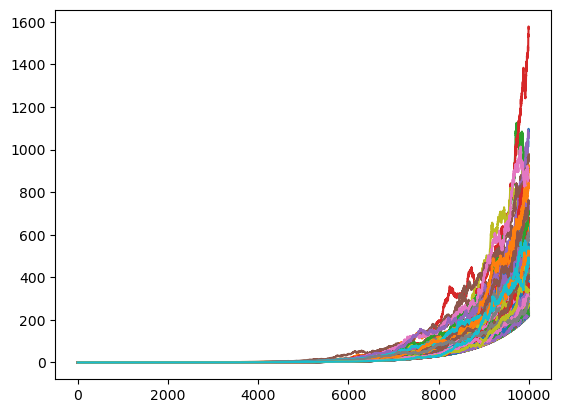

In [ ]:
df_money.plot(legend=False,logy=False)

In [ ]:
new_loans_vol

0.01

In [ ]:
pd.Series(ar_shock).hist().plot()

[]

In [ ]:
sr_min.plot()

<AxesSubplot: >

Text(0.5, 0, 'time')

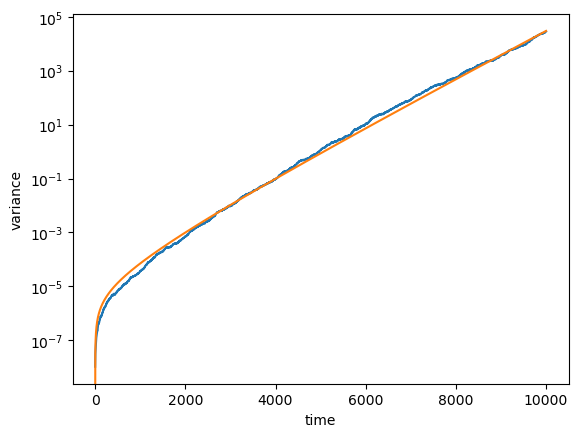

In [ ]:
cut = T
sr_var.iloc[:cut].plot()
# plt.plot(range(cut),[(np.exp(new_loans_vol**2*t)-1)/nb_banks**2 for t in range(cut)]) # log
# plt.plot(range(cut),[(1-np.exp(-new_loans_vol**2*t))/nb_banks**2 for t in range(cut)]) # gabaix
plt.plot(range(cut),[np.exp(2*g*t)*(1-np.exp(-new_loans_vol**2*t))*init_money_min**2 for t in range(cut)]) # vlc
plt.yscale("log")
plt.ylabel("variance")
plt.xlabel("time")

In [ ]:
(sr_var/np.array([np.exp(2*g*t) for t in range(T)])).plot()

<AxesSubplot: >

Text(0.5, 0, 'time')

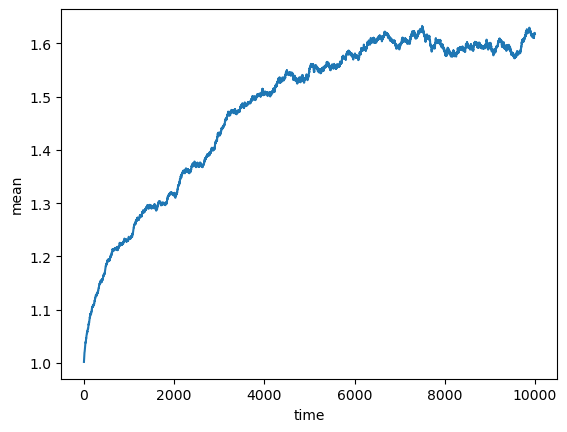

In [ ]:
(sr_mean/sr_money_min).plot()
# sr_loan_min.plot()
# plt.yscale("log")
plt.ylabel("mean")
plt.xlabel("time")
# plt.ylim(9e-6,2e-5)

<AxesSubplot: >

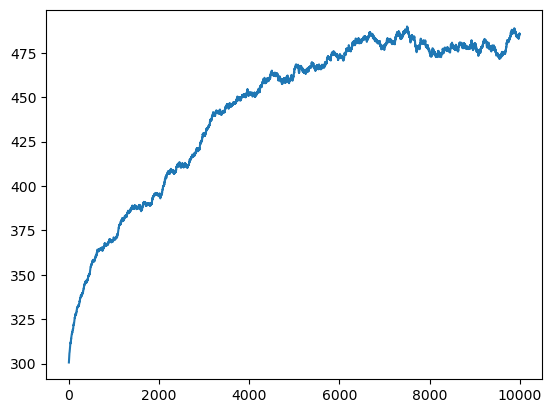

In [ ]:
(sr_sum/sr_money_min).plot()
# plt.ylim(0.9,1.1)

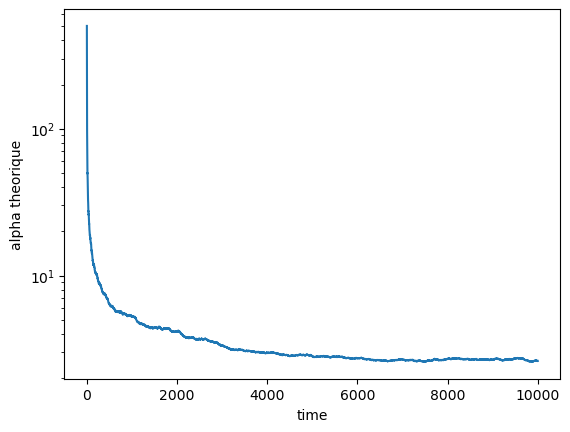

In [ ]:
sr_alpha = 1/(1-sr_money_min/sr_mean)
sr_alpha.plot()
plt.ylabel("alpha theorique")
plt.xlabel("time")
plt.yscale("log")

In [ ]:
df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money)})
df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)
sr_alpha.iloc[-1]

2.618128148442756

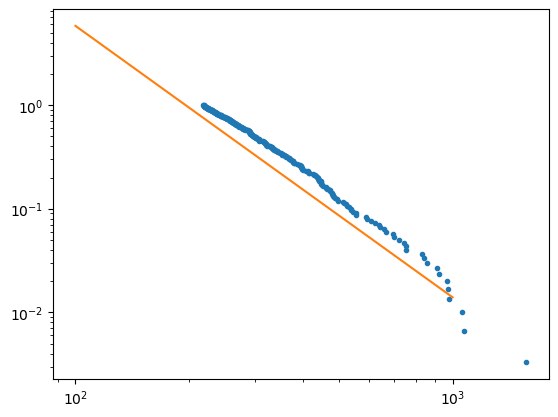

In [ ]:
plt.plot(df_ccdf["data"],df_ccdf["rank"],".")
plt.yscale("log")
plt.xscale("log")
plt.plot(np.logspace(2,3), [1e6/x**sr_alpha.iloc[-1] for x in np.logspace(2,3)], "-")

In [ ]:
sr_powerlaw = pd.Series(
        index=["powerlaw fit", "powerlaw alpha"]
        + [
            f"{ind} {benchmark_law}"
            for ind in ["powerlaw direction", "powerlaw p-value"]
            for benchmark_law in par.benchmark_laws
        ],
        dtype='float64',
    )

# fit the data with the powerlaw librairy
powerlaw_fit = powerlaw.Fit(ar_current_money)
sr_powerlaw.loc[f"powerlaw fit"] = powerlaw_fit

Assuming nested distributions


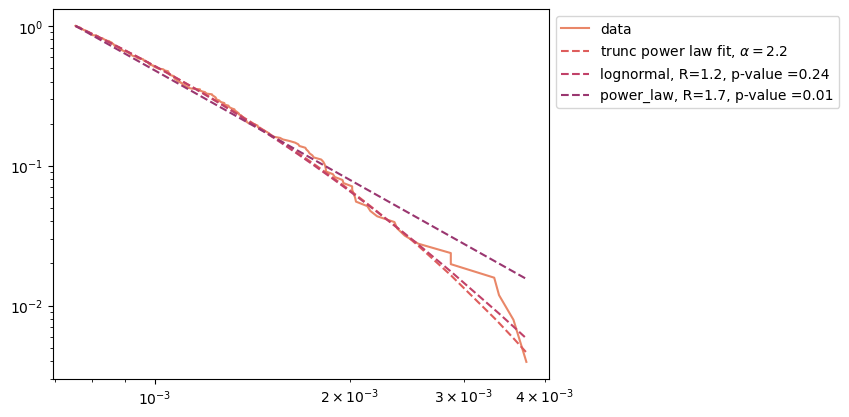

In [ ]:
# retrieve the alpha and p-value
sr_powerlaw.loc[
    f"powerlaw alpha"
] = powerlaw_fit.truncated_power_law.alpha

for benchmark_law in par.benchmark_laws:
    R, p = powerlaw_fit.distribution_compare(
        "truncated_power_law", benchmark_law, normalized_ratio=True
    )
    sr_powerlaw.loc[f"powerlaw direction {benchmark_law}"] = R
    sr_powerlaw.loc[f"powerlaw p-value {benchmark_law}"] = p


fig, ax2 = plt.subplots(1, 1)
colors = sns.color_palette("flare", n_colors=5)

sr_powerlaw[0].plot_ccdf(color=colors[0], ax=ax2)
sr_powerlaw[0].truncated_power_law.plot_ccdf(
    color=colors[1], linestyle="--", ax=ax2
)

# sr_powerlaw[0].exponential.plot_ccdf(
#     color=colors[2], linestyle="--", ax=ax2
# )
sr_powerlaw[0].lognormal.plot_ccdf(color=colors[2], linestyle="--", ax=ax2)
sr_powerlaw[0].power_law.plot_ccdf(color=colors[3], linestyle="--", ax=ax2)

powerlaw_alpha_fm = "{:.1f}".format(sr_powerlaw[1])
labels = [
    "data",
    r"trunc power law fit, $\alpha =$" + f"{powerlaw_alpha_fm}",
]
for benchmark_law in ["lognormal", "power_law"]:
    R_fm = "{:.1f}".format(
        sr_powerlaw.loc[f"powerlaw direction {benchmark_law}"]
    )
    p_fm = "{:.2f}".format(
        sr_powerlaw.loc[f"powerlaw p-value {benchmark_law}"]
    )
    labels.append(f"{benchmark_law}, R={R_fm}, p-value ={p_fm}")

ax2.legend(
    labels,
    loc="upper left",
    bbox_to_anchor=(1.0, 1.0),
)

In [ ]:
26/18.5*52.49

73.76972972972973

## Gabaix log normal 

In [7]:

import os
import numpy as np
import cpnet
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import functions as fct
import parameters as par
import emp_metrics as em
from tqdm import tqdm
import numpy as np
import powerlaw
import os

In [63]:
np.log(nb_banks)/std_control

6.378282033036908

In [26]:
nb_banks = int(1e5)
g = 1e-3
new_loans_vol = 10
std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
ar_shock = (g*np.random.lognormal(mean=-0.5*std_control**2,sigma=std_control,size=nb_banks))
np.mean(ar_shock)
np.std(ar_shock)

0.00908699219351884

In [22]:
np.sqrt(np.log(1.0 + 10**2))

2.148283155648077

In [10]:
new_loans_vol = 10
std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
ar_shock = np.random.lognormal(mean=-0.5*std_control**2,sigma=std_control,size=int(1e7))

In [14]:
np.median(ar_shock)*0.1*100

0.9947300437334368

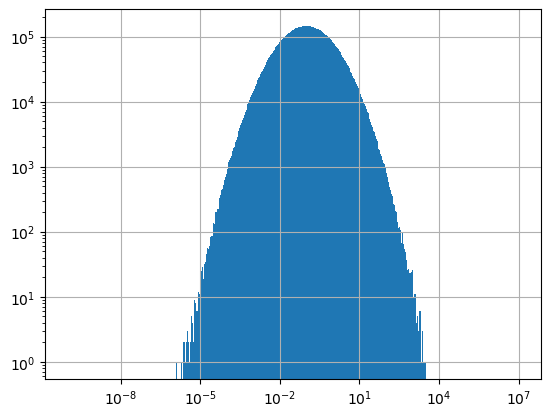

In [11]:
pd.Series(ar_shock).hist(bins=np.logspace(-10,7,500)).plot()
plt.yscale("log")
plt.xscale("log")

In [27]:
g*new_loans_vol

0.01

In [357]:
# theoretical vol
new_loans_vol**2*g**2

1.0000000000000002

In [11]:
std_control

2.148283155648077

In [4]:
0.02/250*10

0.0008

In [ ]:
new_loans_vol

In [6]:
std_control

2.148283155648077

In [20]:
sr_mean = pd.Series()
sr_var =pd.Series()
sr_sum = pd.Series()
sr_min = pd.Series()
df_current_money = pd.DataFrame()

# Teted conditions
T = 1000000
nb_banks = int(5e4)
init_money_min = 1e-2
ar_current_money = np.ones(nb_banks)*init_money_min
df_money = pd.DataFrame(columns=range(nb_banks))

g = 0.02/250
new_loans_vol = 100
sr_money_min = pd.Series([np.exp(g*t) for t in range(T)])*init_money_min
# mu = g -0.5*new_loans_vol**2

path = "test"

fct.delete_n_init_path(f"./results/power_law/{path}/")

for t in tqdm(range(T)):
    
    # generate lognormal shock
    std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
    mean_control = -0.5 * std_control**2
    ar_shock = (np.random.lognormal(mean=mean_control,sigma=std_control,size=nb_banks))*g
    
    ar_current_money = ar_current_money +  ar_shock*ar_current_money
    
    # # loans > min size
    # index_normal =  np.where(ar_current_money>=sr_money_min[t])[0]
    # ar_current_money[index_normal] = ar_current_money[index_normal] +  ar_shock[index_normal]*ar_current_money[index_normal]
    
    # # loans < min size
    # index_min =  np.where(ar_current_money<sr_money_min[t])[0]
    # ar_current_money[index_min] = ar_current_money[index_min] + np.maximum(ar_shock[index_min],g)*ar_current_money[index_min]
    
    sr_mean.loc[t] = np.mean(ar_current_money)
    sr_var.loc[t] = np.var(ar_current_money)
    sr_sum.loc[t] = np.sum(ar_current_money)
    sr_min.loc[t] = np.min(ar_current_money)
    # df_money.loc[t] = ar_current_money
    
    if t%5000 == 0:
        df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money/np.sum(ar_current_money))})
        df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)
        df_ccdf.to_csv(f"./results/power_law/{path}/{t}_df_ccdf.csv")
        
        plt.plot(df_ccdf["data"],df_ccdf["rank"],".")
        plt.yscale("log")
        plt.xscale("log")
        index = np.logspace(-7,0)
        plt.plot(index, [1e-2/x**0.5 for x in index], "-")
        plt.ylabel(r"$\mathbb{P}(Y > y)$")
        plt.xlabel(r"$y$")
        plt.savefig(f"./results/power_law/{path}/{t}_power_law.png")
        
        
        
        


/opt/tmp/tmp/ipykernel_74448/3274573607.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_mean = pd.Series()
/opt/tmp/tmp/ipykernel_74448/3274573607.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_var =pd.Series()
/opt/tmp/tmp/ipykernel_74448/3274573607.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_sum = pd.Series()
/opt/tmp/tmp/ipykernel_74448/3274573607.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_min = pd.Series()
100%|██████████| 1000000/1000000 [11:50:53<00:00, 23.44it/s]  


Text(0.5, 0, '$y$')

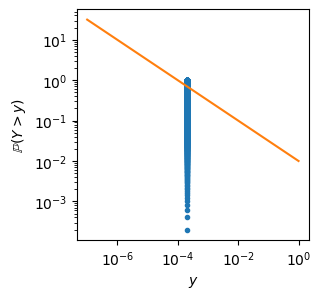

In [18]:
ar_current_money = np.ones(nb_banks)*init_money_min
df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money/np.sum(ar_current_money))})
df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)

fig, ax = plt.subplots(figsize=(3,3))
plt.plot(df_ccdf["data"],df_ccdf["rank"],".")
plt.yscale("log")
plt.xscale("log")
index = np.logspace(-7,0)
plt.plot(index, [1e-2/x**0.5 for x in index], "-")
plt.ylabel(r"$\mathbb{P}(Y > y)$")
plt.xlabel(r"$y$")

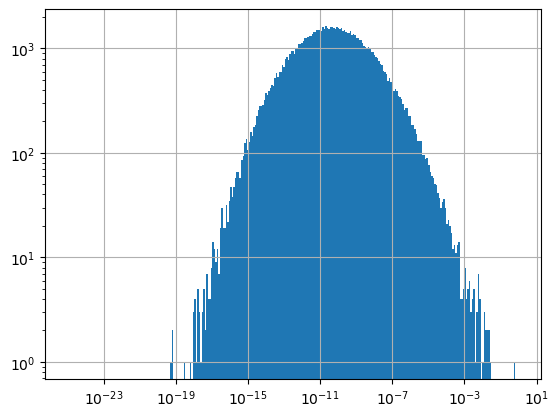

In [43]:
pd.Series(ar_current_money/np.sum(ar_current_money)).hist(bins=np.logspace(start=-25, stop=0, num=300)).plot()
plt.xscale("log")
plt.yscale("log")

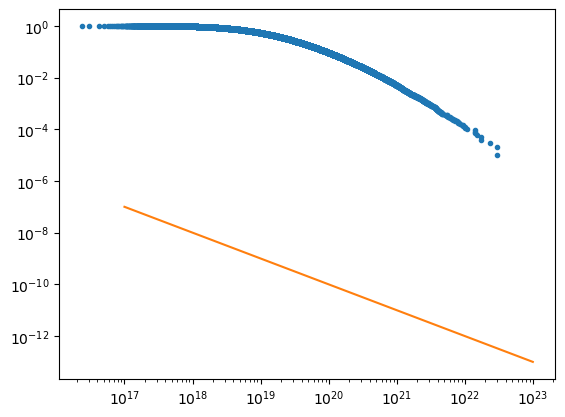

In [43]:
df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money)})
df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)

plt.plot(df_ccdf["data"],df_ccdf["rank"],".")
plt.yscale("log")
plt.xscale("log")
index = np.logspace(17,23)
plt.plot(index, [1e10/x for x in index], "-")
# plt.savefig(f"./results/power_law/test/{t}_power_law.png")

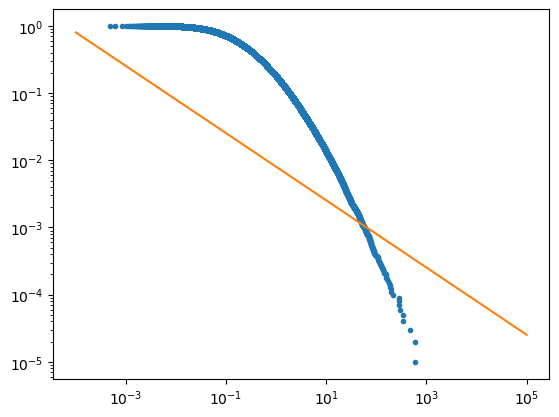

In [40]:
df_ccdf = pd.DataFrame({"data":np.sort(ar_current_money/np.mean(ar_current_money))})
df_ccdf["rank"] = df_ccdf[["data"]].apply(lambda row: 1-row.name/len(ar_current_money), axis=1)

plt.plot(df_ccdf["data"],df_ccdf["rank"],".")
plt.yscale("log")
plt.xscale("log")
index = np.logspace(-4,5)
plt.plot(index, [8e-3/x**0.5 for x in index], "-")
# plt.savefig(f"./results/power_law/test/{t}_power_law.png")

In [ ]:
g*100

0.05

In [ ]:
ar_current_money

array([1.19708268e+09, 1.15751879e+09, 1.38409977e+09, ...,
       7.22421658e+08, 7.19913941e+08, 7.33932636e+08])

In [ ]:
t*g**2*new_loans_vol**2

1

In [ ]:
sr

Text(0.5, 0, 'time')

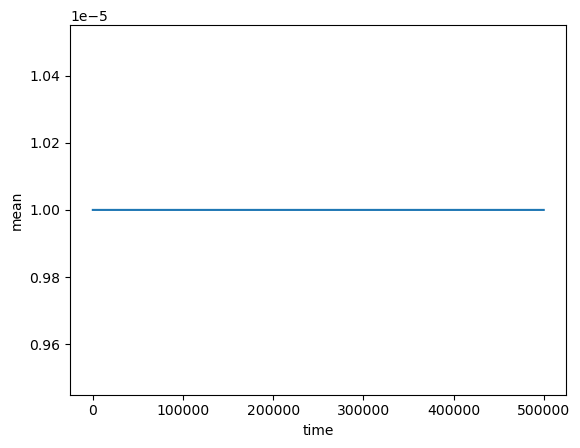

In [14]:
cut = T
(sr_mean/sr_sum).iloc[:cut].plot()
# plt.plot(range(cut),[init_money_min*(1+g)**t for t in range(cut)]) # log
# plt.plot(range(cut),[(1-np.exp(-new_loans_vol**2*t))/nb_banks**2 for t in range(cut)]) # gabaix
# plt.plot(range(cut),[np.exp(2*g*t)*(1-np.exp(-new_loans_vol**2*t))*init_money_min**2 for t in range(cut)]) # vlc
# plt.yscale("log")
plt.ylabel("mean")
plt.xlabel("time")

In [ ]:
np.exp(std_control**2)-1

99.99999999999993

In [23]:
std_control

2.148283155648077

In [25]:
# condition pour les calculs asymptotiques faciles 

np.exp(std_control**2)*g**2

0.00010099999999999992

In [ ]:
gamma = g**2*np.exp(std_control**2) + 2*g+1
gamma

1.00102525

In [ ]:
((g+1)**(2*10))

1.0100476428032965

In [19]:
gamma**10


Text(0.5, 0, 'time')

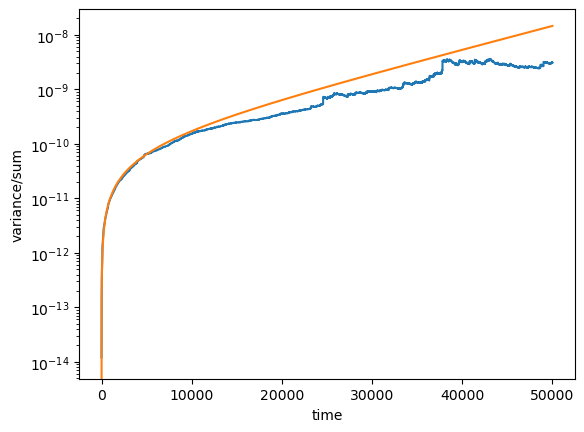

In [30]:
cut = T
gamma = g**2*np.exp(std_control**2) + 2*g+1
A = gamma/(g+1)**2
(sr_var/sr_sum**2).iloc[:cut].plot()
# plt.plot(range(cut),[init_money_min**2*(gamma**t - (g+1)**(2*t)) for t in range(cut)]) # variance
plt.plot(range(cut),[(1/nb_banks**2)*(A**t - 1) for t in range(cut)]) # variance/mean**2
# plt.plot(range(cut),[(1-np.exp(-new_loans_vol**2*t))/nb_banks**2 for t in range(cut)]) # gabaix
# plt.plot(range(cut),[np.exp(2*g*t)*(1-np.exp(-new_loans_vol**2*t))*init_money_min**2 for t in range(cut)]) # vlc
plt.yscale("log")
plt.ylabel("variance/sum")
plt.xlabel("time")

Text(0.5, 0, 'time')

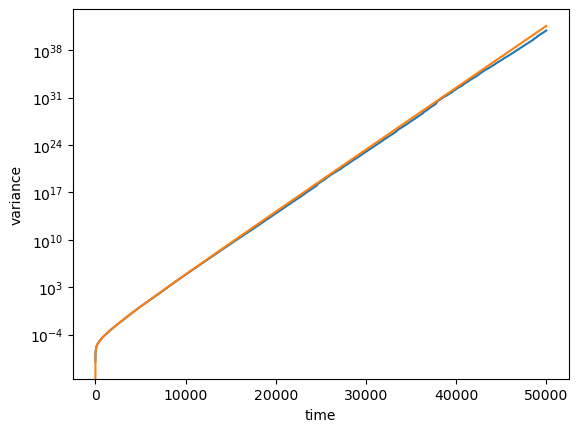

In [35]:
cut = T
std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
gamma = g**2*np.exp(std_control**2) + 2*g+1
sr_var.iloc[:cut].plot()
plt.plot(range(cut),[init_money_min**2*(gamma**t-(1+g)**(2*t)) for t in range(cut)]) # 
plt.yscale("log")
plt.ylabel("variance")
plt.xlabel("time")

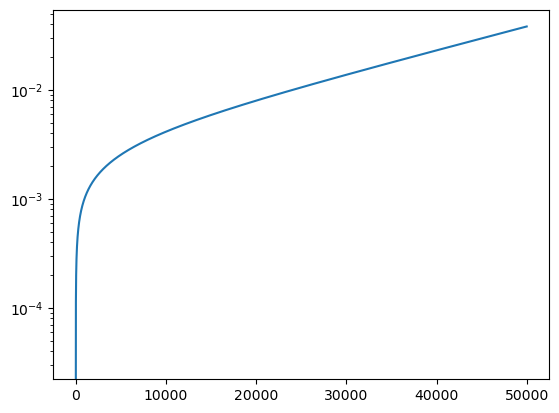

In [38]:
# validity of the proxy of the approximation of the sum by its mean
import numpy as np
from matplotlib import pyplot as plt
T = 50000
std_control = np.sqrt(np.log(1.0 + new_loans_vol**2))
nb_banks= 1e5
gamma = g**2*np.exp(std_control**2) + 2*g+1
A = gamma/(g+1)**2
plt.plot(range(T),[np.sqrt((A**t - 1)/nb_banks) for t in range(T)])
plt.yscale("log")


Text(0.5, 0, 'time')

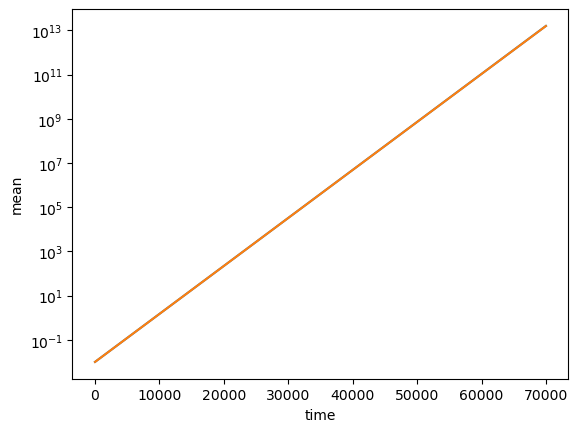

In [ ]:
cut = 70000-1
(sr_mean).iloc[:cut].plot()
plt.plot(range(cut),[np.exp(g*t)*init_money_min for t in range(cut)]) # log
# plt.plot(range(cut),[(1-np.exp(-new_loans_vol**2*t))/nb_banks**2 for t in range(cut)]) # gabaix
# plt.plot(range(cut),[np.exp(2*g*t)*(1-np.exp(-new_loans_vol**2*t))*init_money_min**2 for t in range(cut)]) # vlc
plt.yscale("log")
plt.ylabel("mean")
plt.xlabel("time")

In [ ]:
ar_current_money

array([3.65549195e+08, 3.64638988e+08, 3.60195641e+08, ...,
       3.03178175e+08, 1.59017587e+08, 6.80750567e+09])

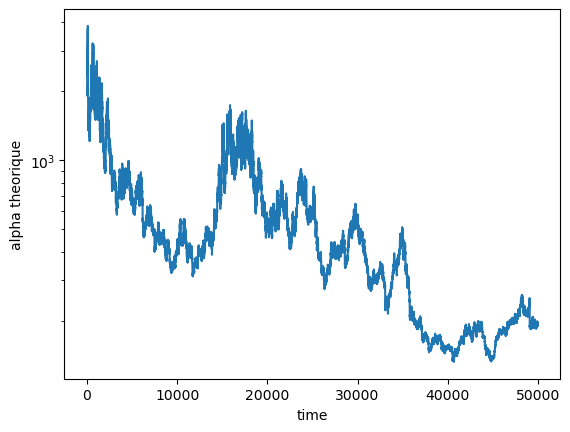

In [ ]:
sr_alpha = 1/(1-sr_money_min/sr_mean)
sr_alpha.plot()
plt.ylabel("alpha theorique")
plt.xlabel("time")
plt.yscale("log")

In [2]:
a = {1:0.1,2:0.6}
a

{1: 0.1, 2: 0.6}

In [3]:
a = {1:0.1,2:0.6}
a = dict.fromkeys(a, 0)
a

{1: 0, 2: 0}

In [16]:
trust = {0:0.0, 1:0.0,2:0.0,3:0.0,4:0.0}

bank_list = [0,1,2,3,4]

bank_list = list(np.random.permutation(bank_list))

trusts = {}
for b in bank_list:
    trusts[b] = trust[b]
    
max(trusts, key=trusts.get)

4

In [19]:
if all(value == 0 for value in trust.values()):
    keys = list(np.random.permutation(range(4)))
    trust = dict.fromkeys(keys, 0.0)
    
trust

{2: 0.0, 1: 0.0, 0: 0.0, 3: 0.0}

In [20]:
sorted(trust.items(), key=lambda item: item[1], reverse=False)

[(2, 0.0), (1, 0.0), (0, 0.0), (3, 0.0)]

In [5]:
import numpy as np
index = np.arange(5)
index = 
bank_list[index]

TypeError: only integer scalar arrays can be converted to a scalar index

In [23]:
days = [1,2,3,4,5]
for a, b in enumerate((days[1:]), 0):
    print(a,b)

0 2
1 3
2 4
3 5


# shocks 

In [4]:
import numpy as np
shocks_vol = 0.05
mean_reversion = shocks_vol
epsilon = np.random.normal(
    loc=0,
    scale=shocks_vol,
    size=100,
)
ar_deposits  = np.ones(100)
shocks = (
    mean_reversion
    * (
        ar_deposits
        - ar_deposits
    )
    + epsilon * ar_deposits
)

# center the shocks
shocks = shocks - np.mean(shocks)

# clip the negative shocks to the deposits size
ar_deposits + shocks

array([1.05821152, 0.97249866, 0.96921632, 1.04642879, 1.03948654,
       0.88818769, 1.02852287, 0.95379708, 0.95676211, 1.05726758,
       1.08679532, 0.95108425, 0.96778237, 1.04740429, 0.87437457,
       0.93384492, 1.16045114, 1.02787023, 1.04256367, 0.96621956,
       1.0868841 , 0.9989036 , 0.99606489, 0.89733111, 0.98486757,
       1.03333399, 0.96616688, 0.99334506, 0.96888668, 1.04743941,
       0.96980975, 1.06887732, 1.00218053, 1.04234878, 1.06617177,
       0.97223962, 0.99708866, 0.99177801, 1.0813307 , 1.00681641,
       1.04824993, 0.9500333 , 0.96696592, 1.04983121, 0.97335304,
       1.09389134, 1.01270356, 0.96368441, 1.03904967, 1.04097054,
       1.0339403 , 0.90890001, 1.04411316, 0.96745837, 1.02490863,
       1.00263657, 0.98589937, 0.99150226, 1.04927519, 1.04376156,
       0.99468997, 0.9832259 , 1.02538311, 0.97961285, 0.92902266,
       0.93138979, 0.97784376, 0.97227704, 0.96241081, 0.9517139 ,
       0.98855743, 1.09097767, 0.99017877, 0.96767935, 1.11086